In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pygrib # Will likely need to pip install when running on a fresh server instance
import cfgrib # Same as above
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import imageio

In [2]:
ds = xr.open_dataset('data_sfc.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:     (valid_time: 120, latitude: 10, longitude: 18)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2022-11-20 ... 2022-12-04T21:00:00
  * latitude    (latitude) float64 23.75 23.0 22.25 21.5 ... 18.5 17.75 17.0
  * longitude   (longitude) float64 -163.0 -162.2 -161.5 ... -151.0 -150.2
Data variables:
    u10         (valid_time, latitude, longitude) float32 ...
    v10         (valid_time, latitude, longitude) float32 ...
    d2m         (valid_time, latitude, longitude) float32 ...
    t2m         (valid_time, latitude, longitude) float32 ...
    gtco3       (valid_time, latitude, longitude) float32 ...
    tcso2       (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-05T18:12 GRIB to CDM+CF via cfgrib-0.9.1...

In [21]:
lon = ds['longitude']
lat = ds['latitude']
times = ds['valid_time']


In [22]:
print(lon.min(),lon.max())
print(lat.min(),lat.max())

<xarray.DataArray 'longitude' ()>
array(-163.) <xarray.DataArray 'longitude' ()>
array(-150.25)
<xarray.DataArray 'latitude' ()>
array(17.) <xarray.DataArray 'latitude' ()>
array(23.75)


In [23]:
lon_min = -163
lon_max = -150
lat_min = 17
lat_max = 24

In [24]:
transform = ccrs.PlateCarree()
projection = ccrs.PlateCarree()

In [37]:
toC = lambda x: x-273.15
toG = lambda x: x*1000
toBig = lambda x: x*1000000

In [39]:
print(tcsotest.min(),tcsotest.max())

<xarray.DataArray 'tcso2' ()>
array(0.28323336)
Coordinates:
    valid_time  datetime64[ns] 2022-12-04T21:00:00 <xarray.DataArray 'tcso2' ()>
array(50.99945702)
Coordinates:
    valid_time  datetime64[ns] 2022-12-04T21:00:00


In [51]:
filenames = []
def plotimage(time):
    fig, ax = plt.subplots(figsize=(16,10),subplot_kw={'projection':projection})
    
    ax.add_feature(cfeature.BORDERS, edgecolor='gray')
    ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
    ax.add_feature(cfeature.STATES, edgecolor='gray')
    ax.set_extent((lon_min,lon_max,lat_min,lat_max), crs=transform)

    timeS = np.array(time.dt.strftime('%y-%m-%dT%Hz'))
    
    u10 = ds.sel(valid_time=time)['u10']
    v10 = ds.sel(valid_time=time)['v10']
    d2m = toC(ds.sel(valid_time=time)['d2m'])
    t2m = toC(ds.sel(valid_time=time)['t2m'])
    gtco3 = toG(ds.sel(valid_time=time)['gtco3'])
    tcso2 = toBig(ds.sel(valid_time=time)['tcso2'])
    #print(gtco3.min(),gtco3.max())
    #gtco3_levels = [x / 100.0 for x in range(500, 620, 5)]
    #gtco3_contours = ax.contourf(lon,lat,gtco3,levels=gtco3_levels,cmap='YlOrRd',transform=transform)
    #cbar = fig.colorbar(gtco3_contours,location='bottom',pad=0.01)
    #cbar.set_label('Total Column Ozone (g/m^2)')
    #ax.set_title('Total Column Ozone, ' + timeS)
    #filename = './RS/tco' + timeS + '.png'
    tcso2_levels = [x / 10.0 for x in range(0,1000,50)]
    tcso2_contours = ax.contourf(lon,lat,tcso2,levels=tcso2_levels,cmap='YlGnBu',transform=transform)
    cbar = fig.colorbar(tcso2_contours,location='bottom',pad=0.01)
    cbar.set_label('Total Column SO2 (ppm)')
    ax.set_title('Total Column SO2, ' + timeS)
    filename = './RS/so2' + timeS + '.png'
    
    plt.show()
    fig.savefig(filename)
    filenames.append(filename)
    plt.close(fig)

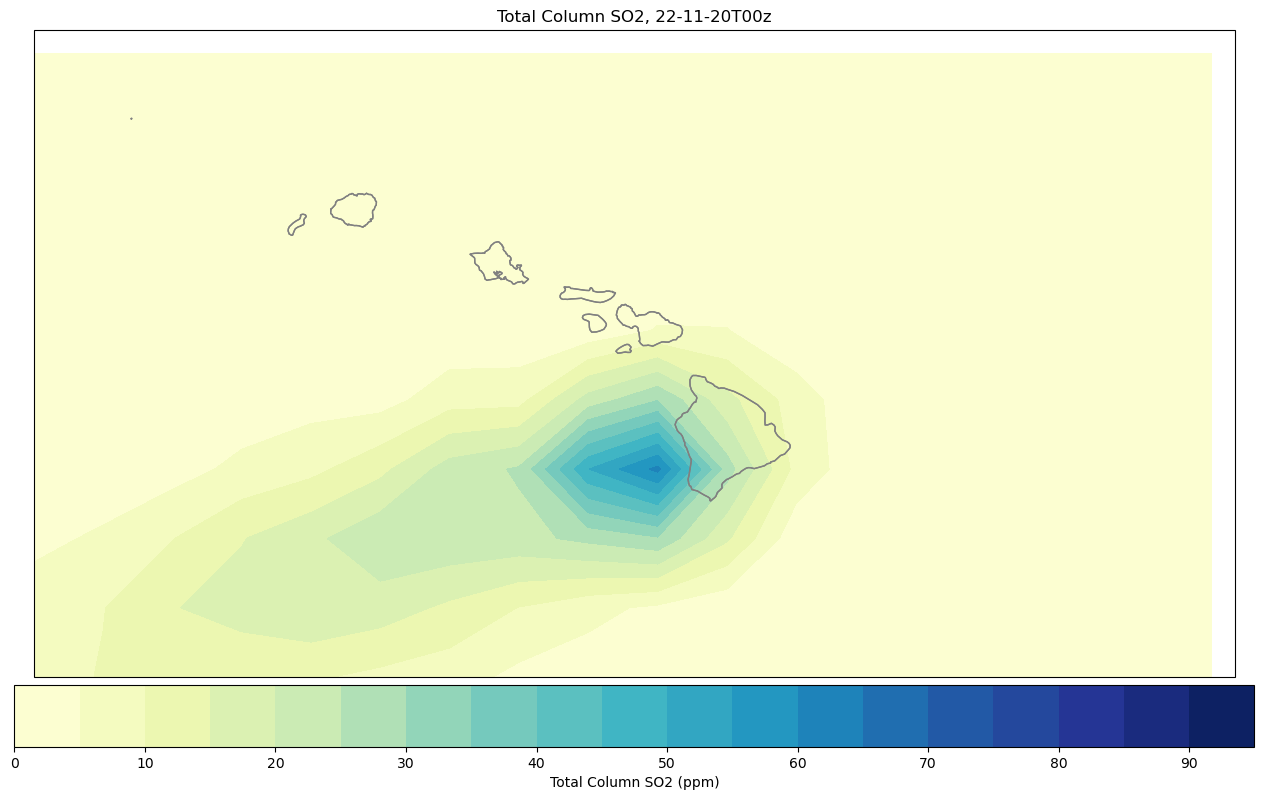

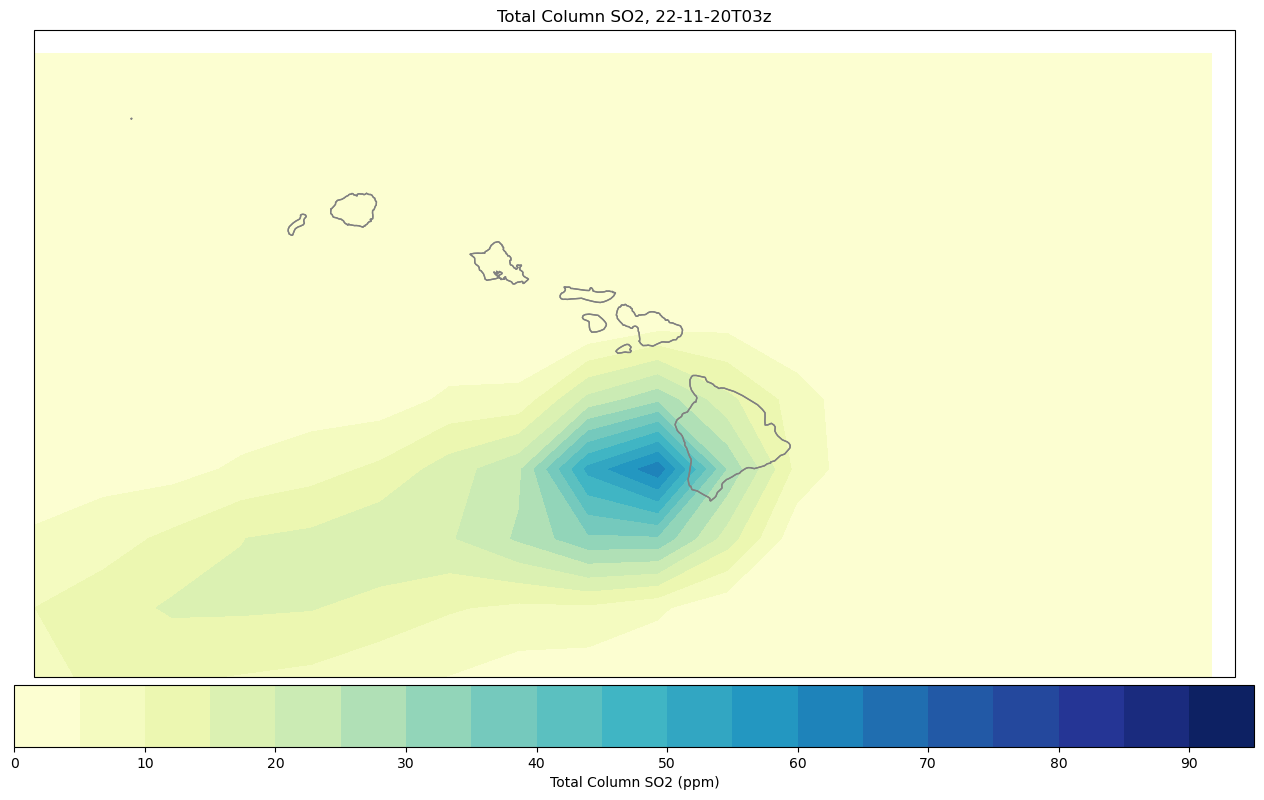

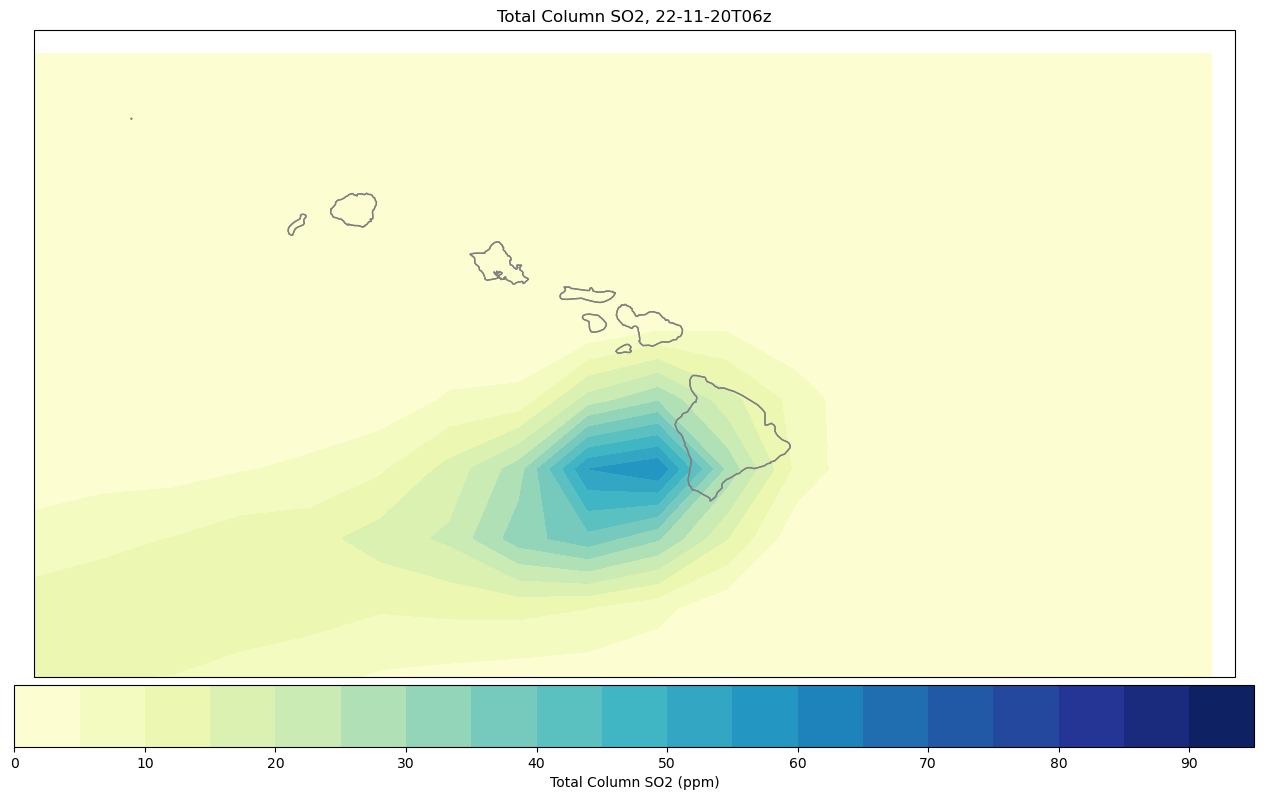

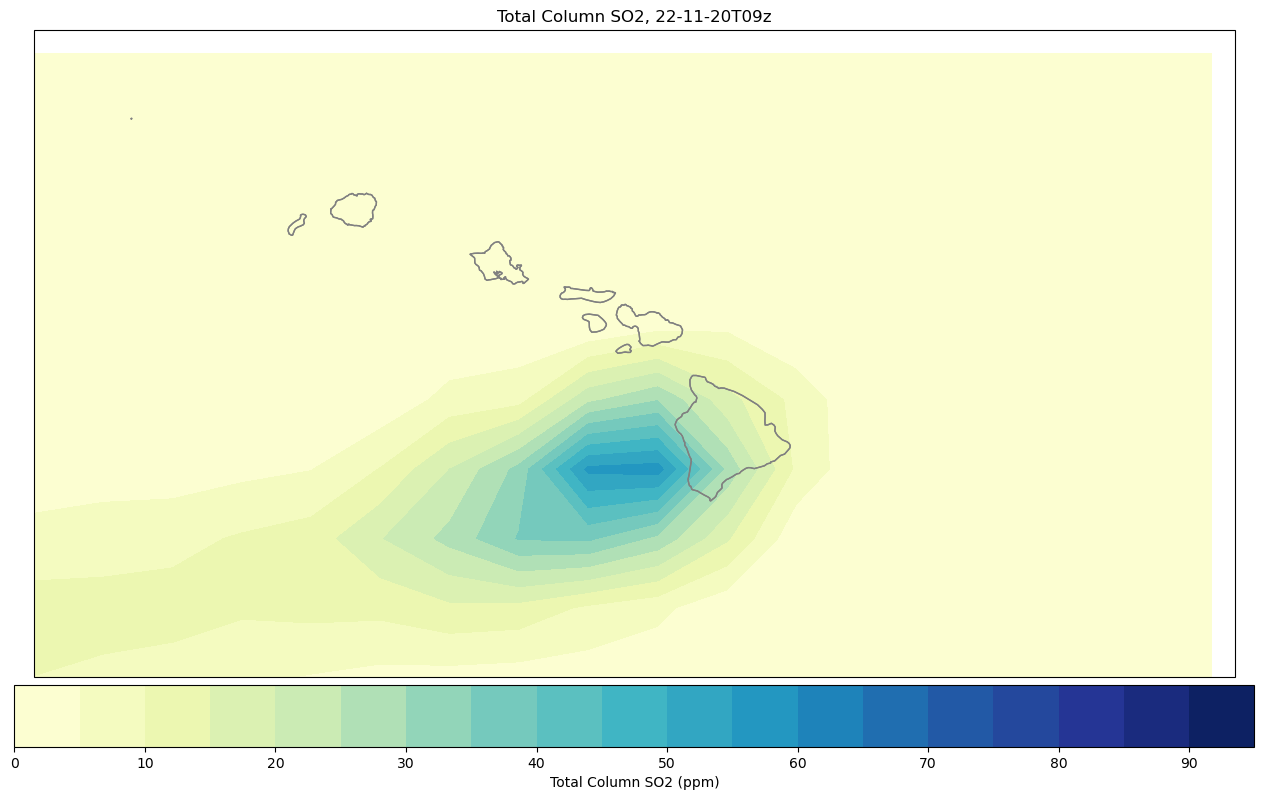

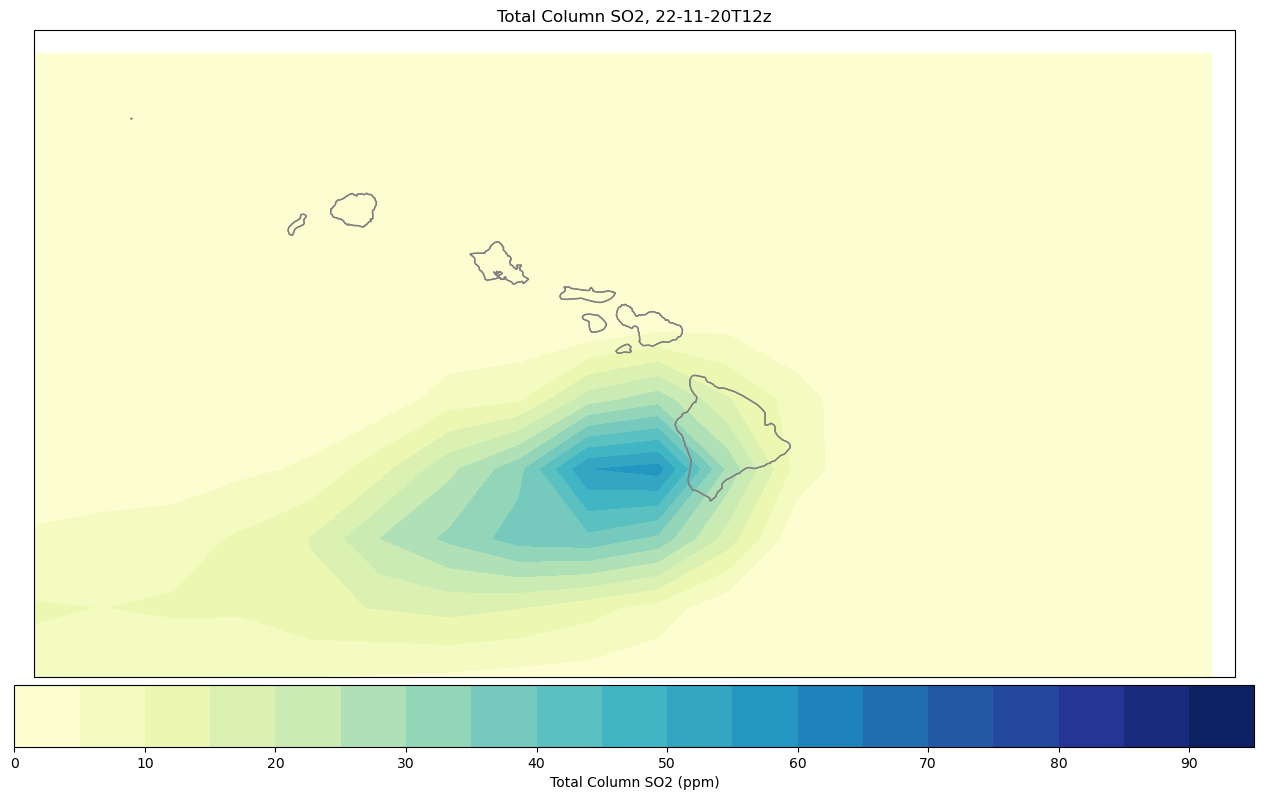

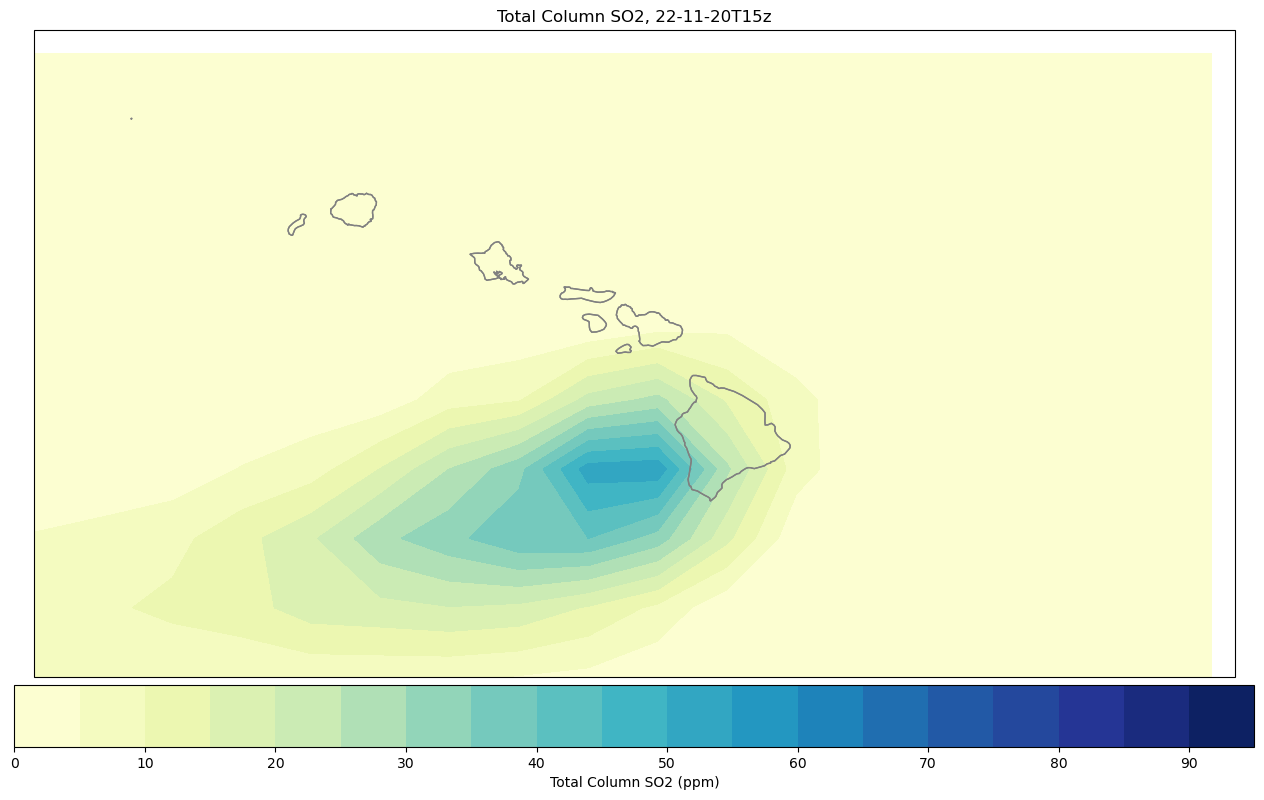

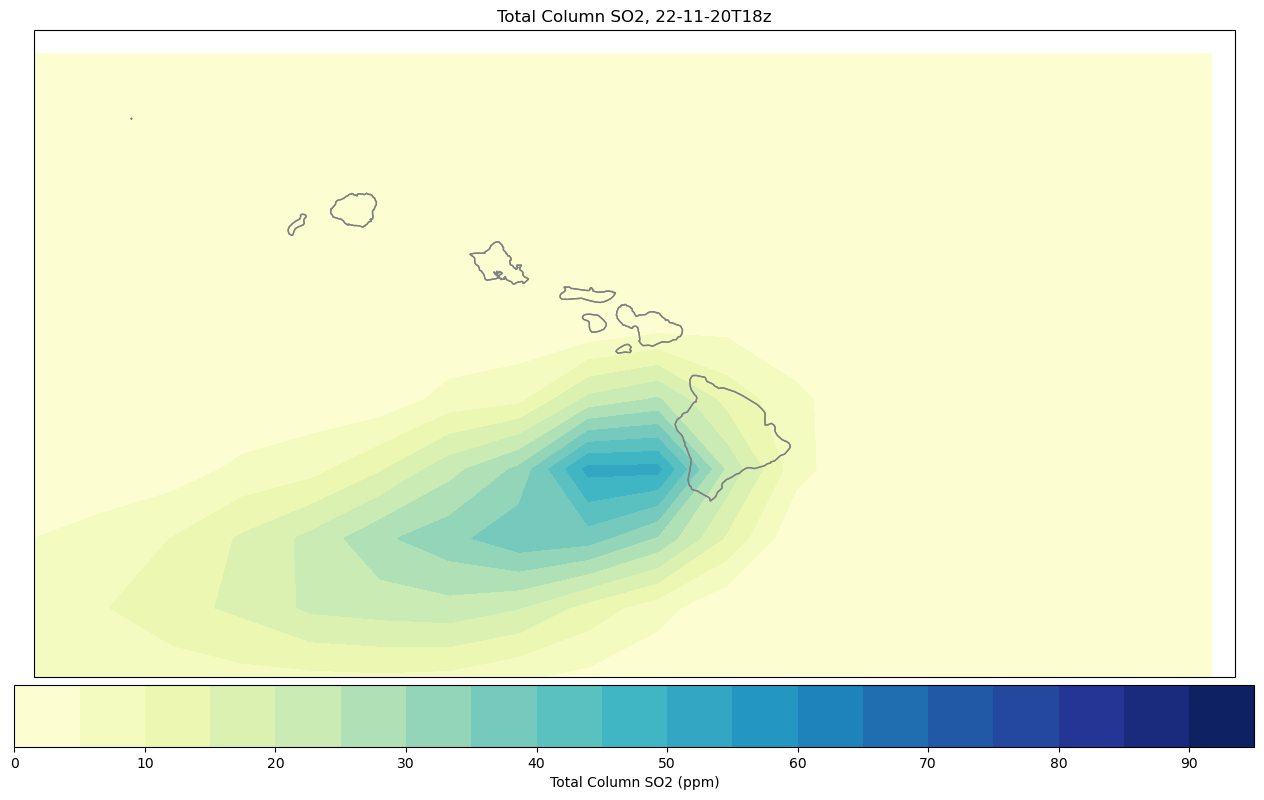

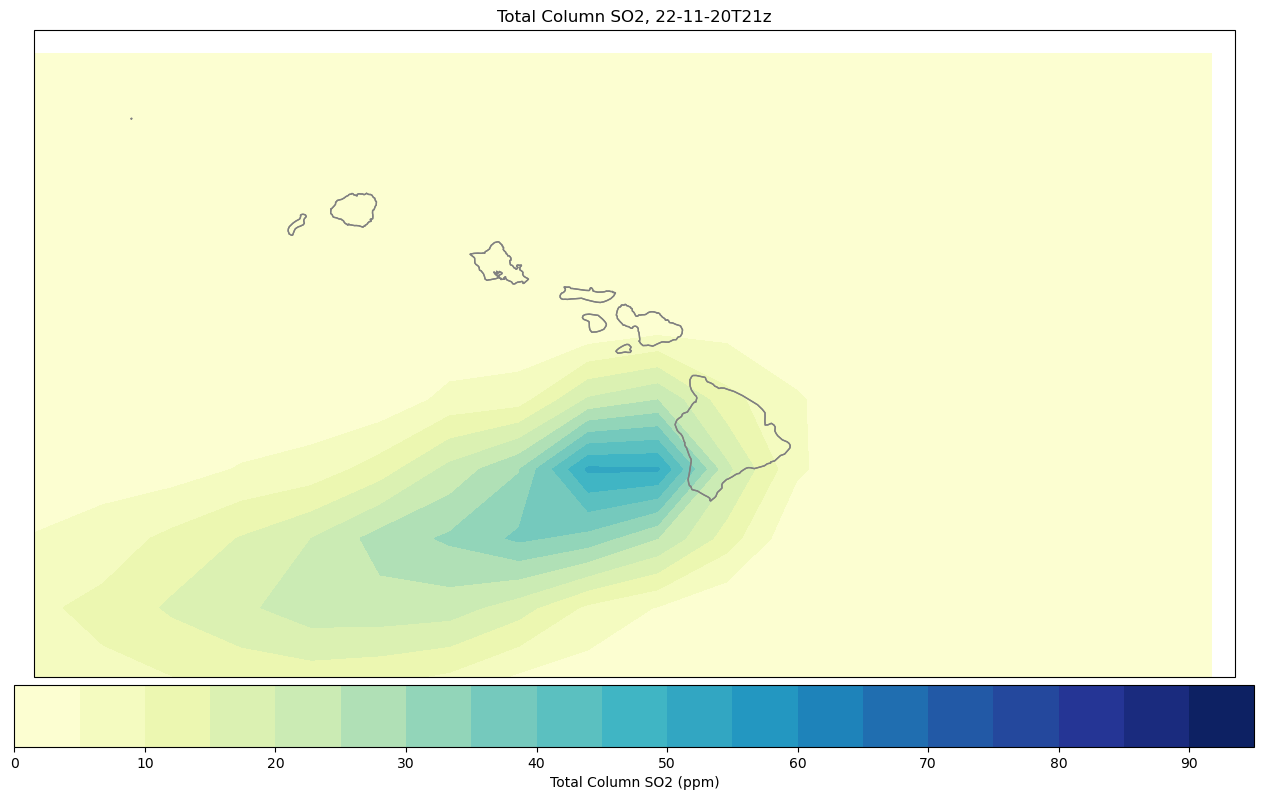

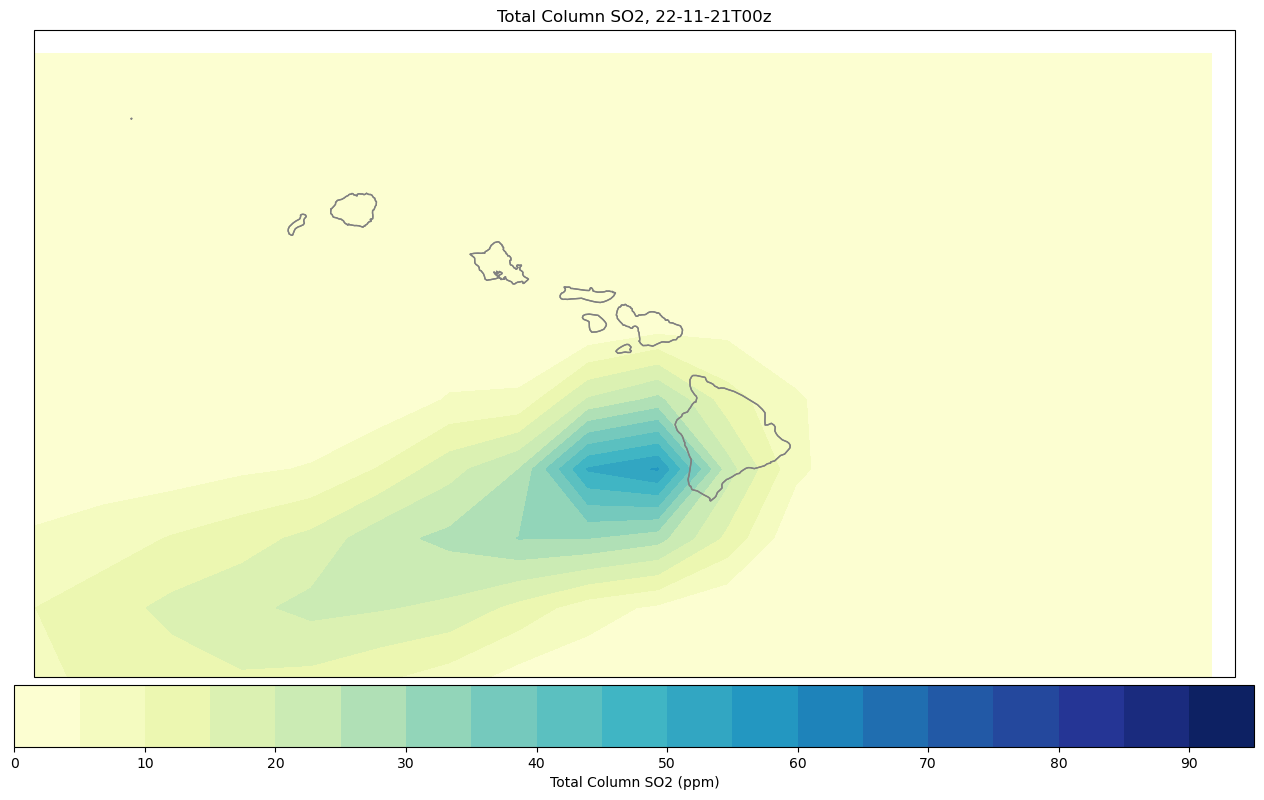

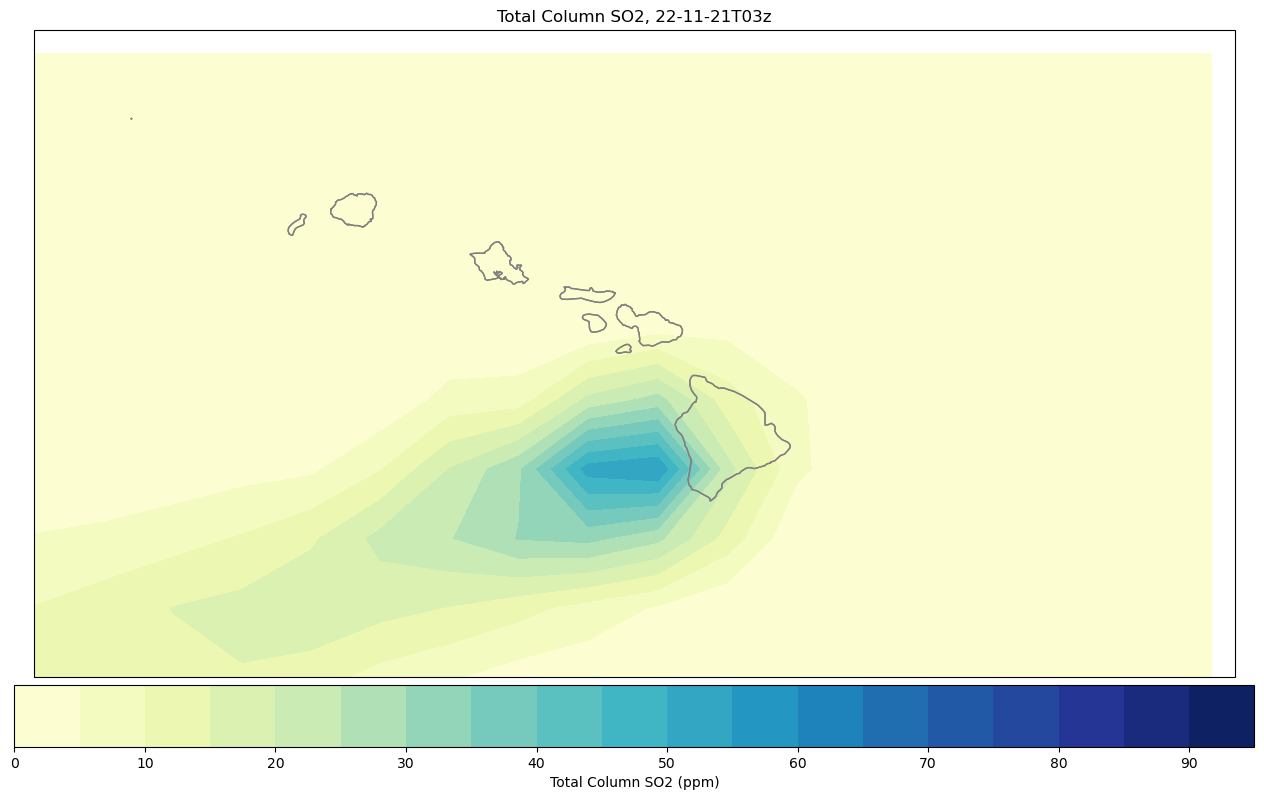

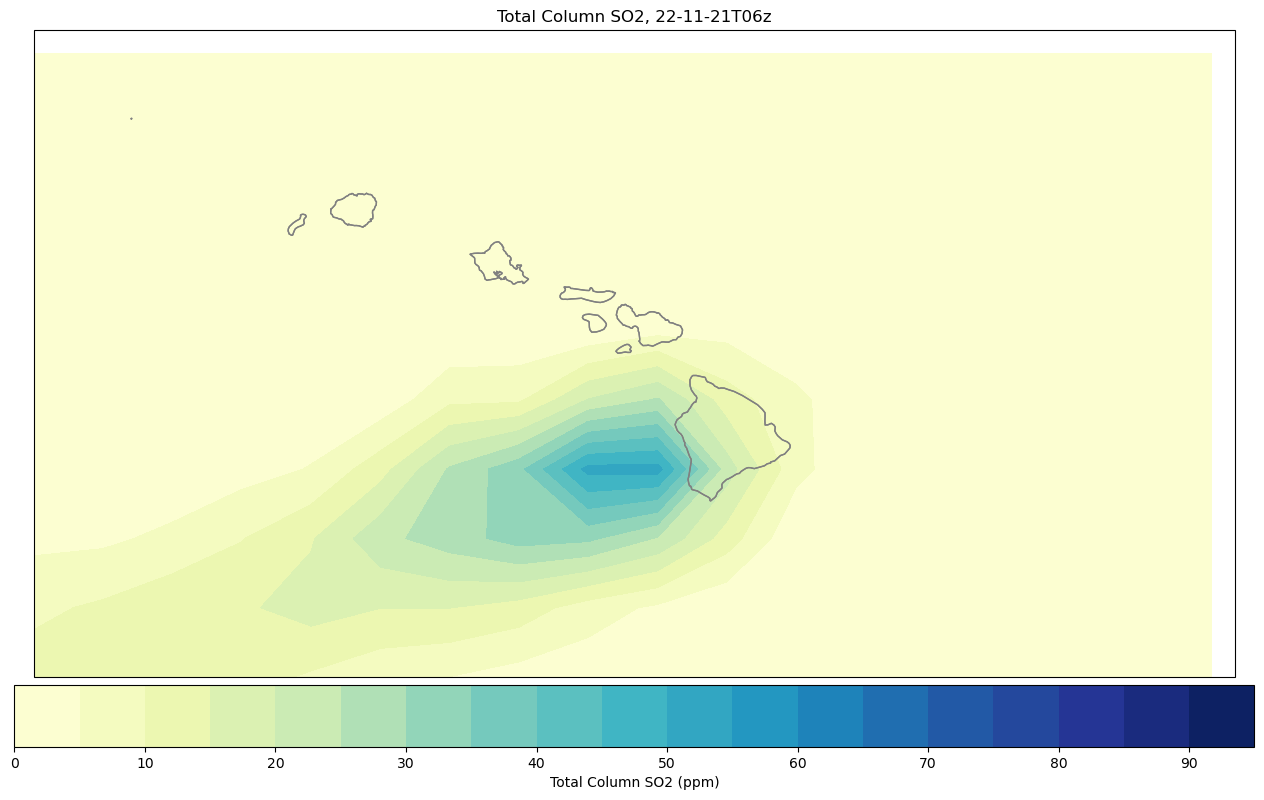

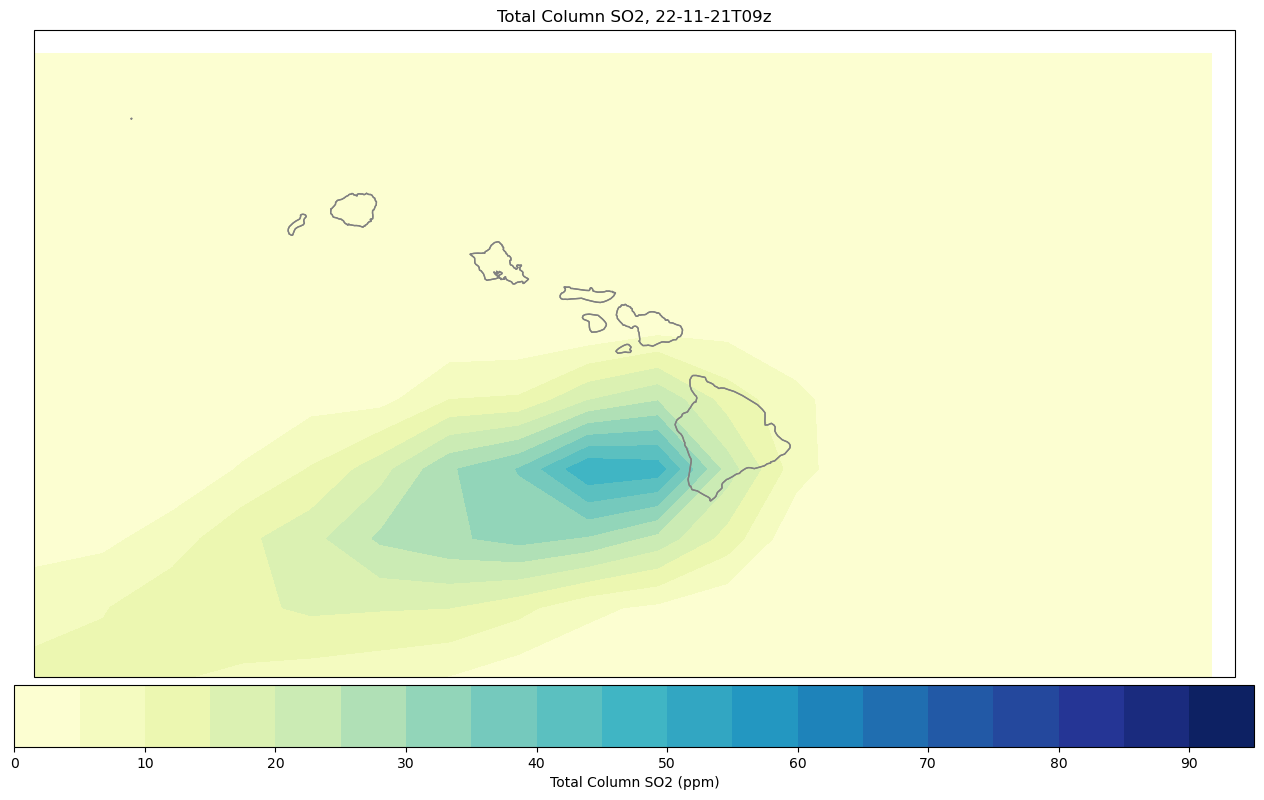

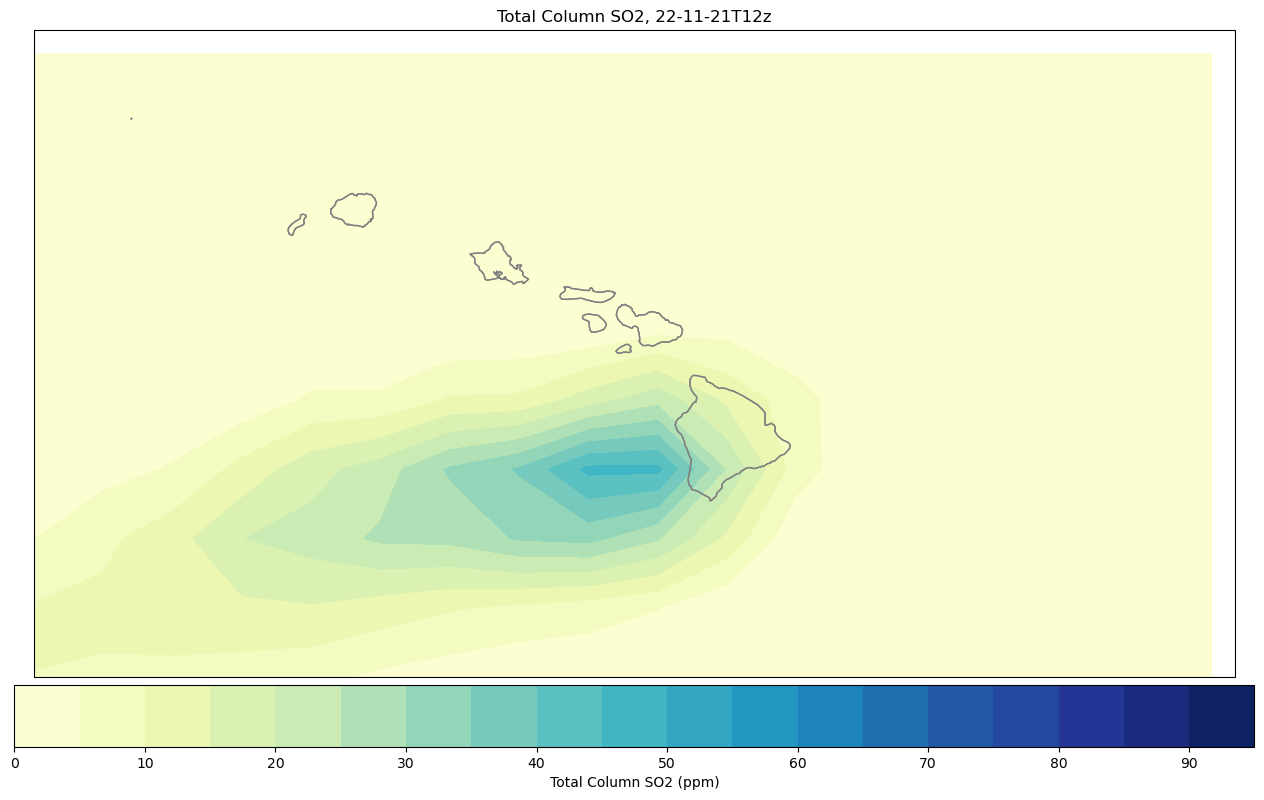

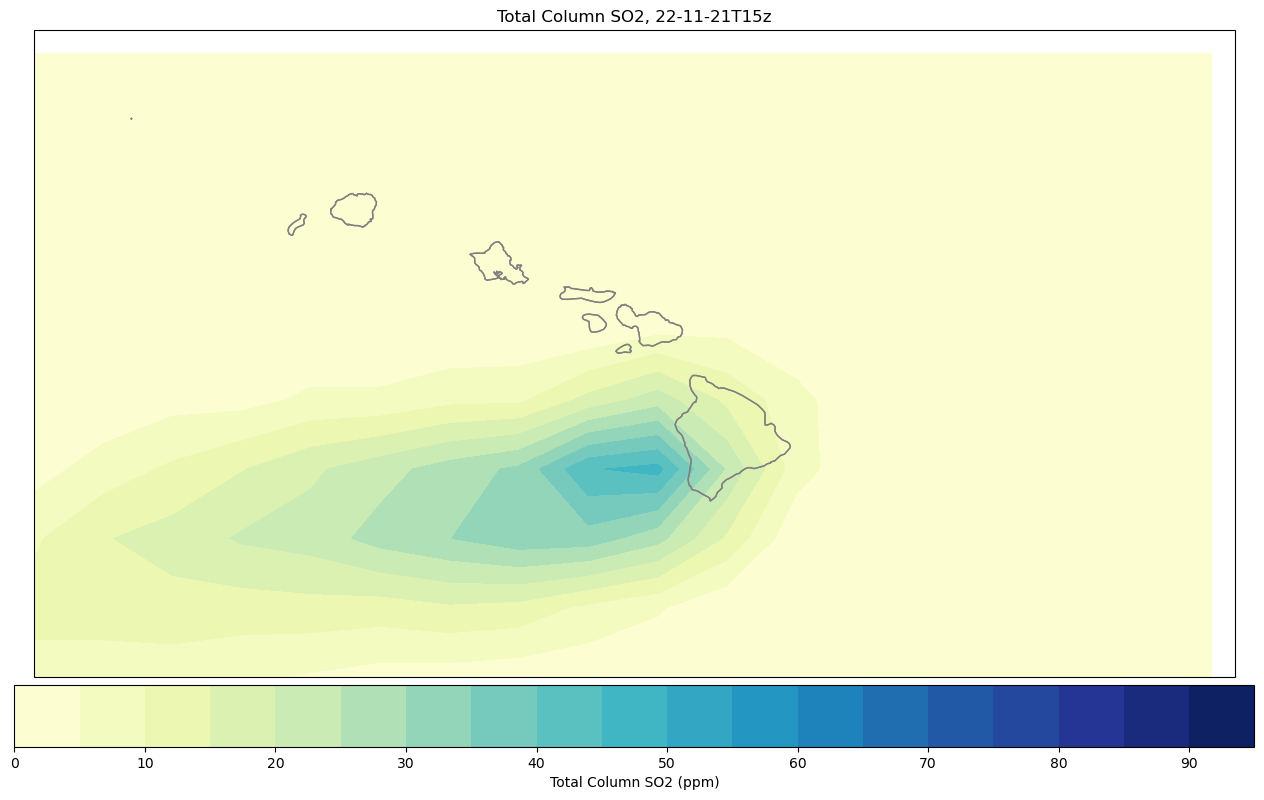

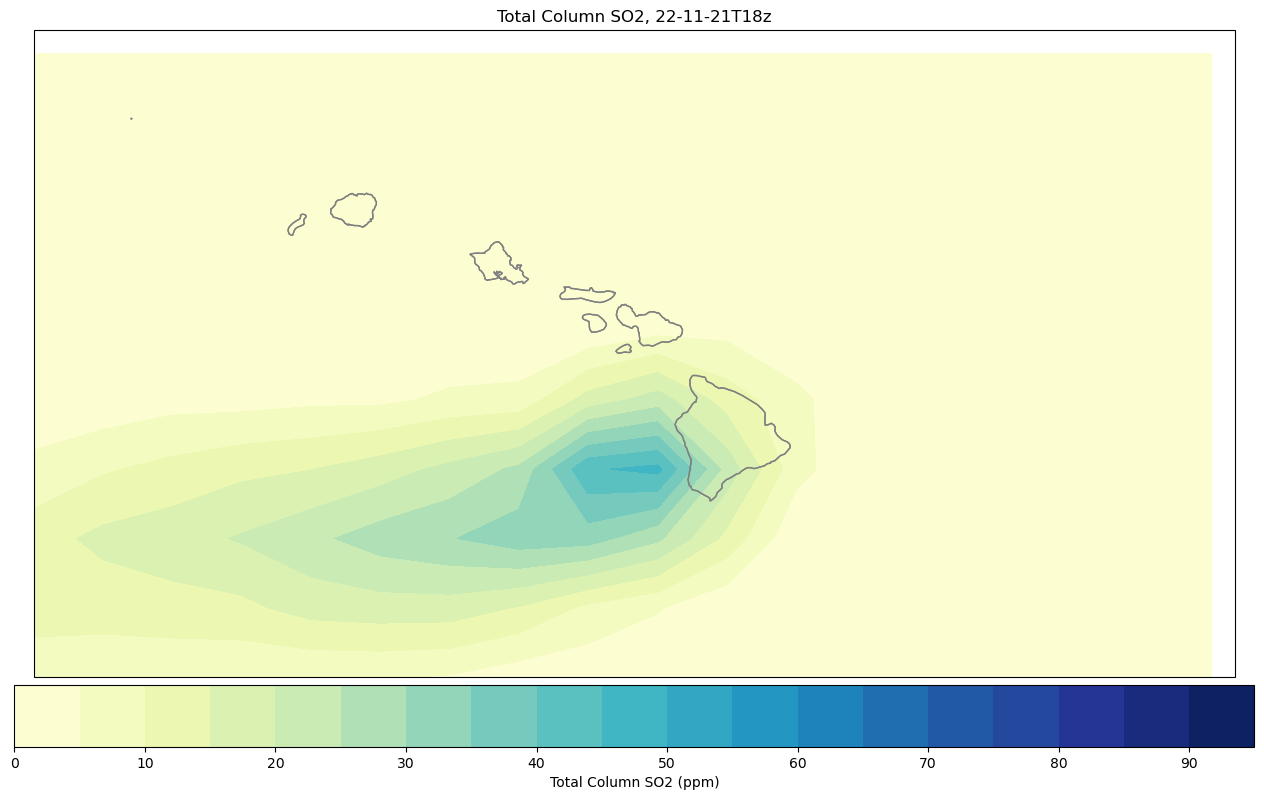

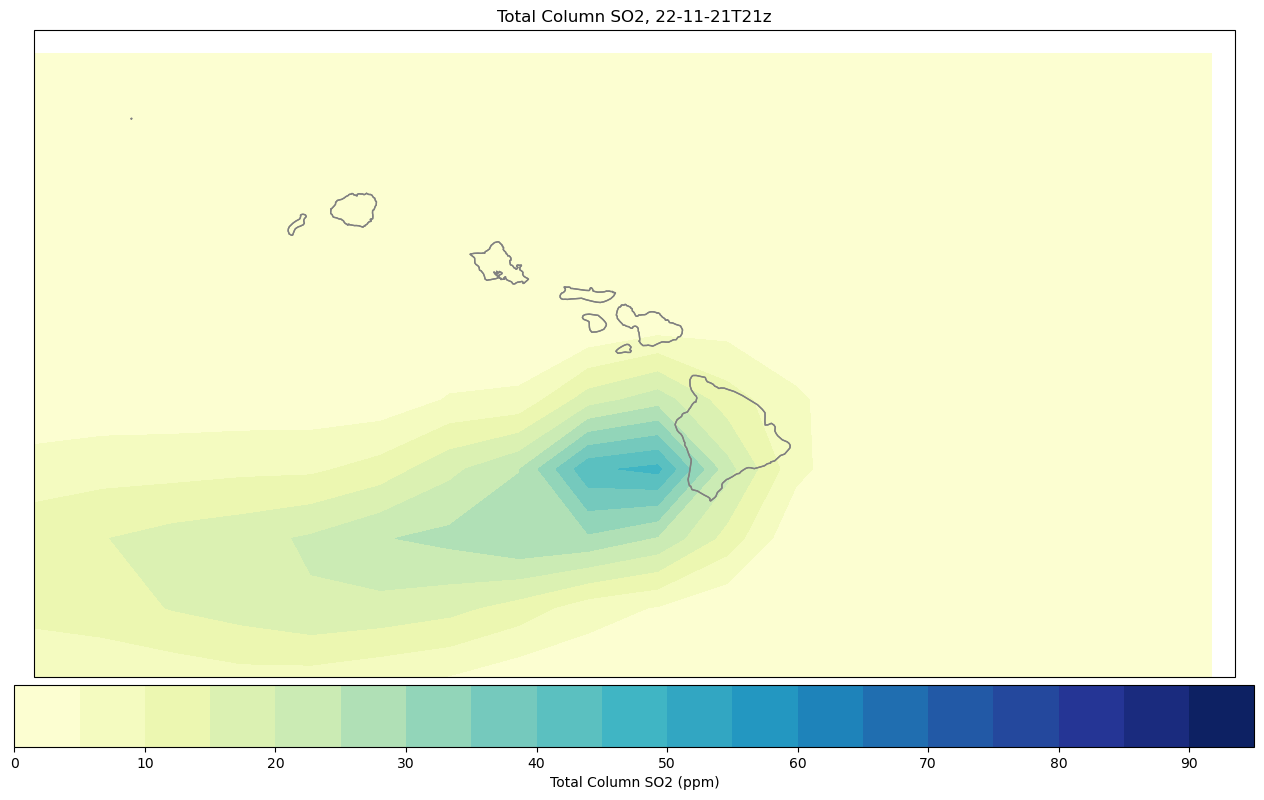

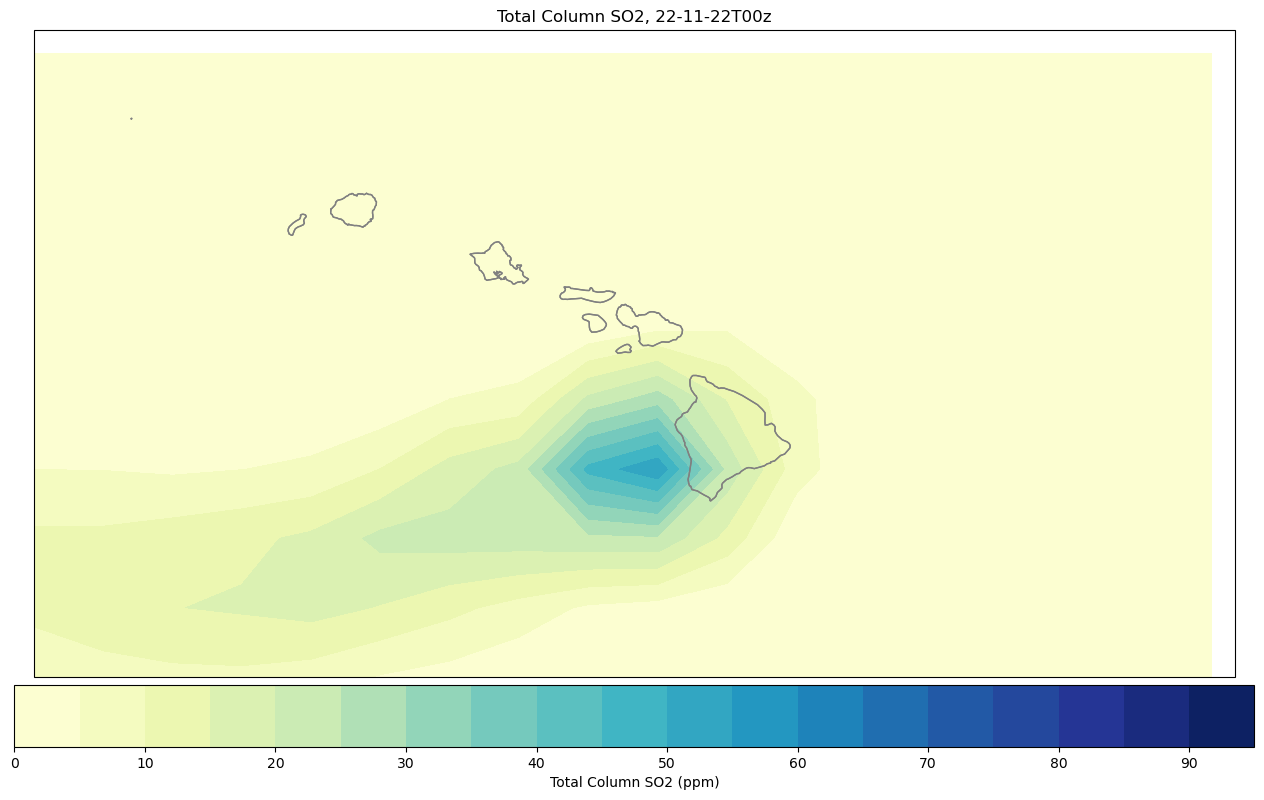

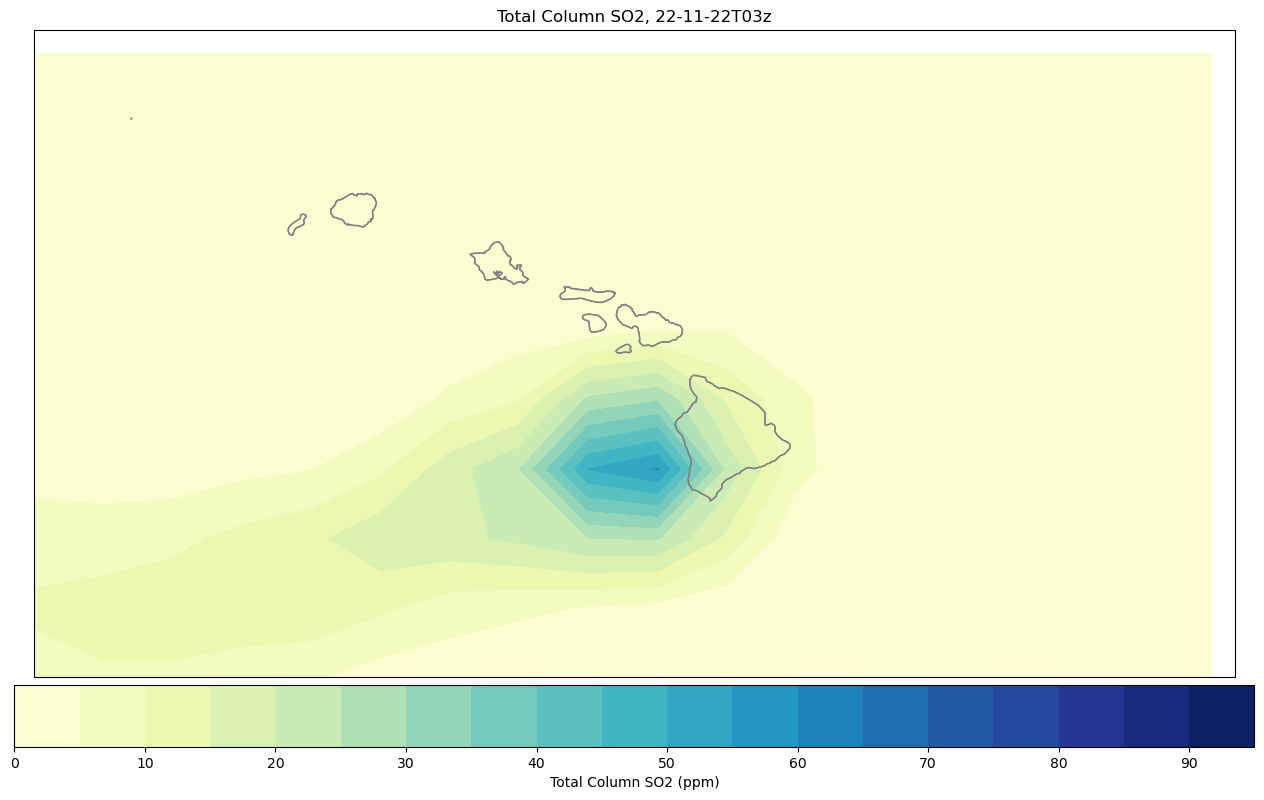

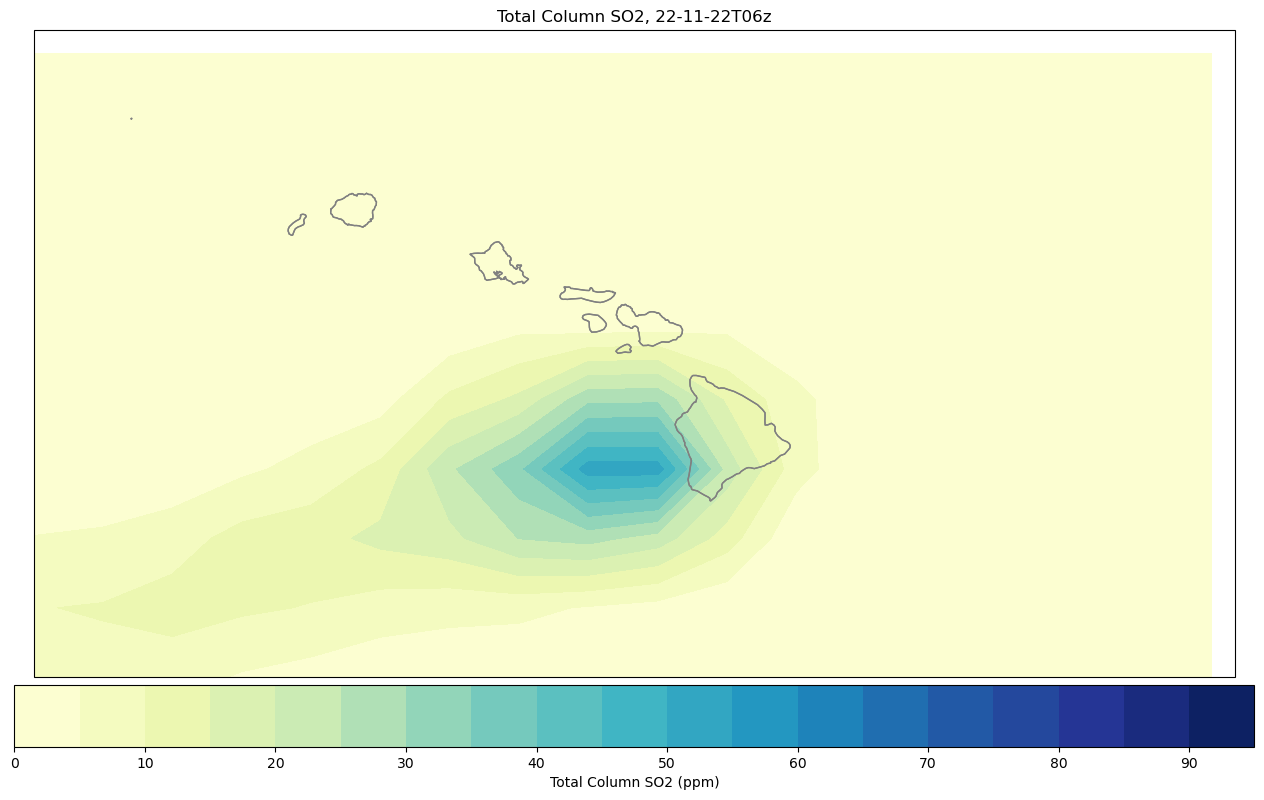

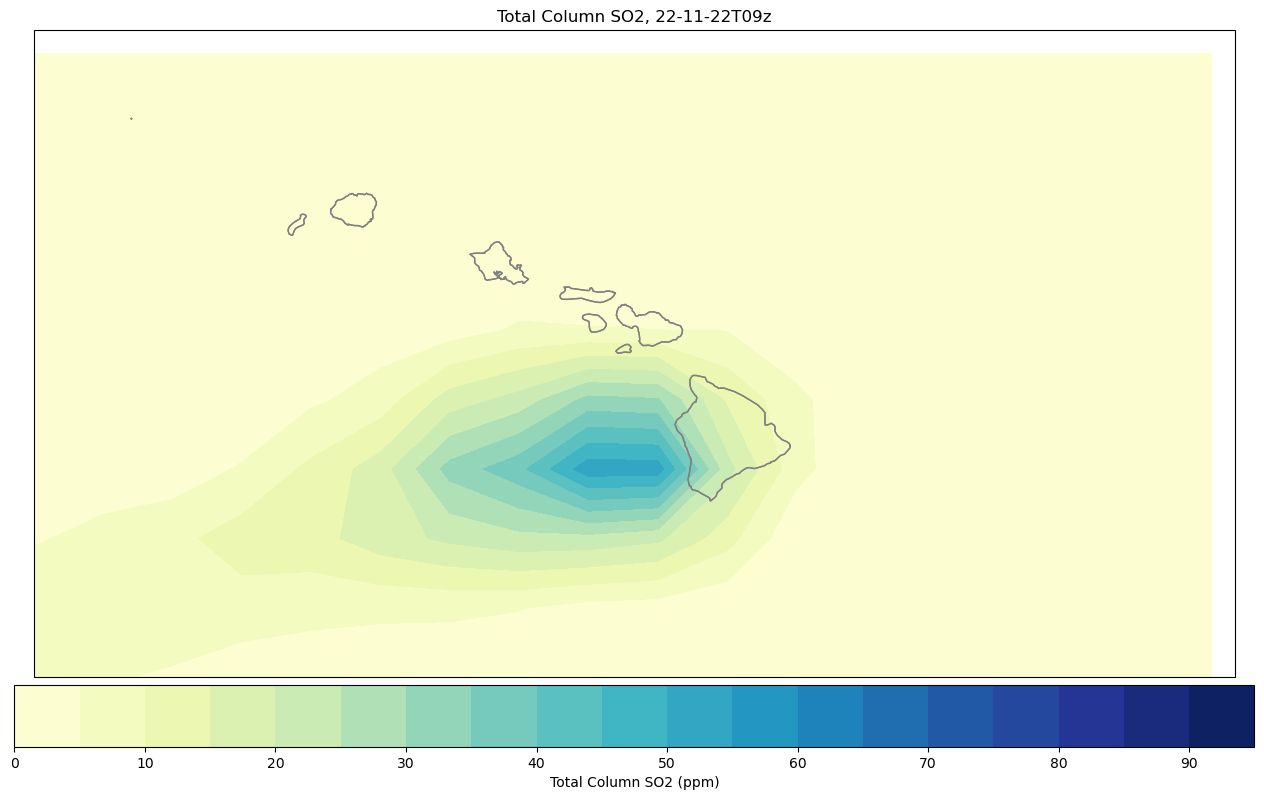

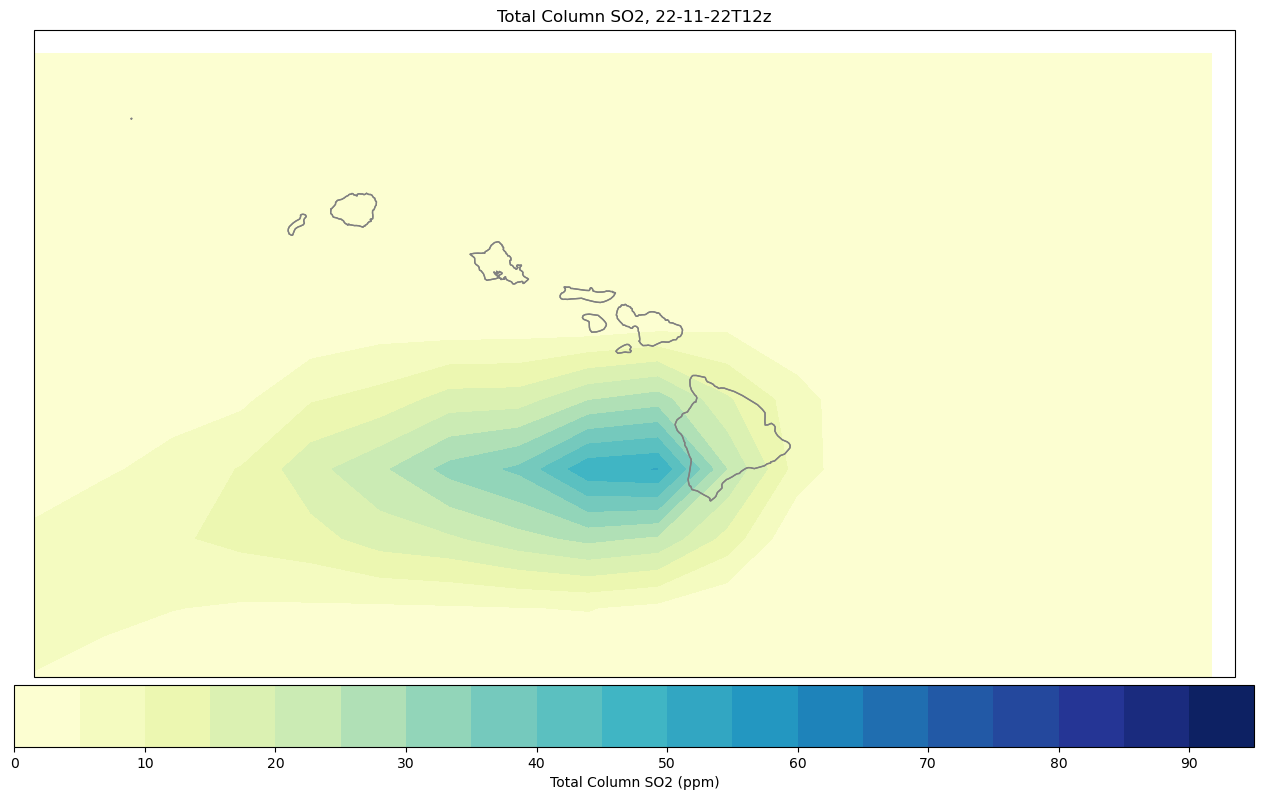

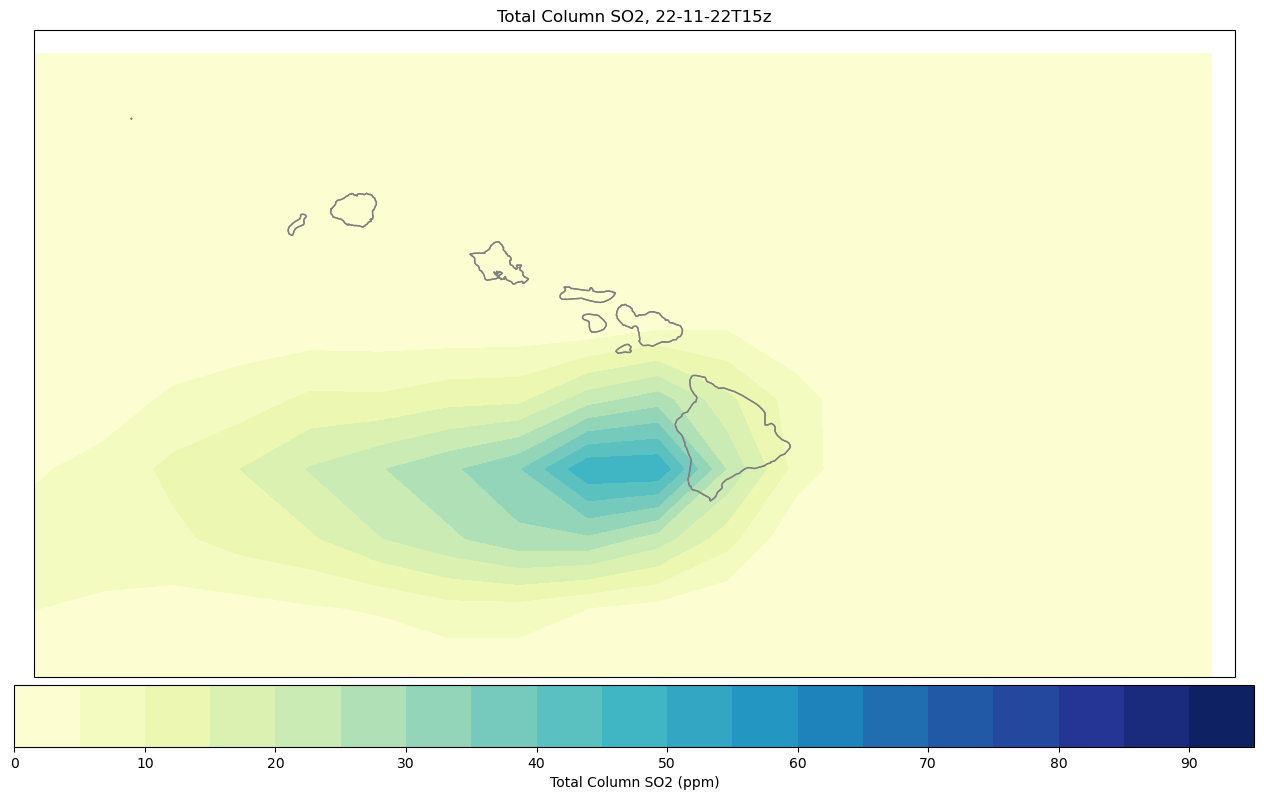

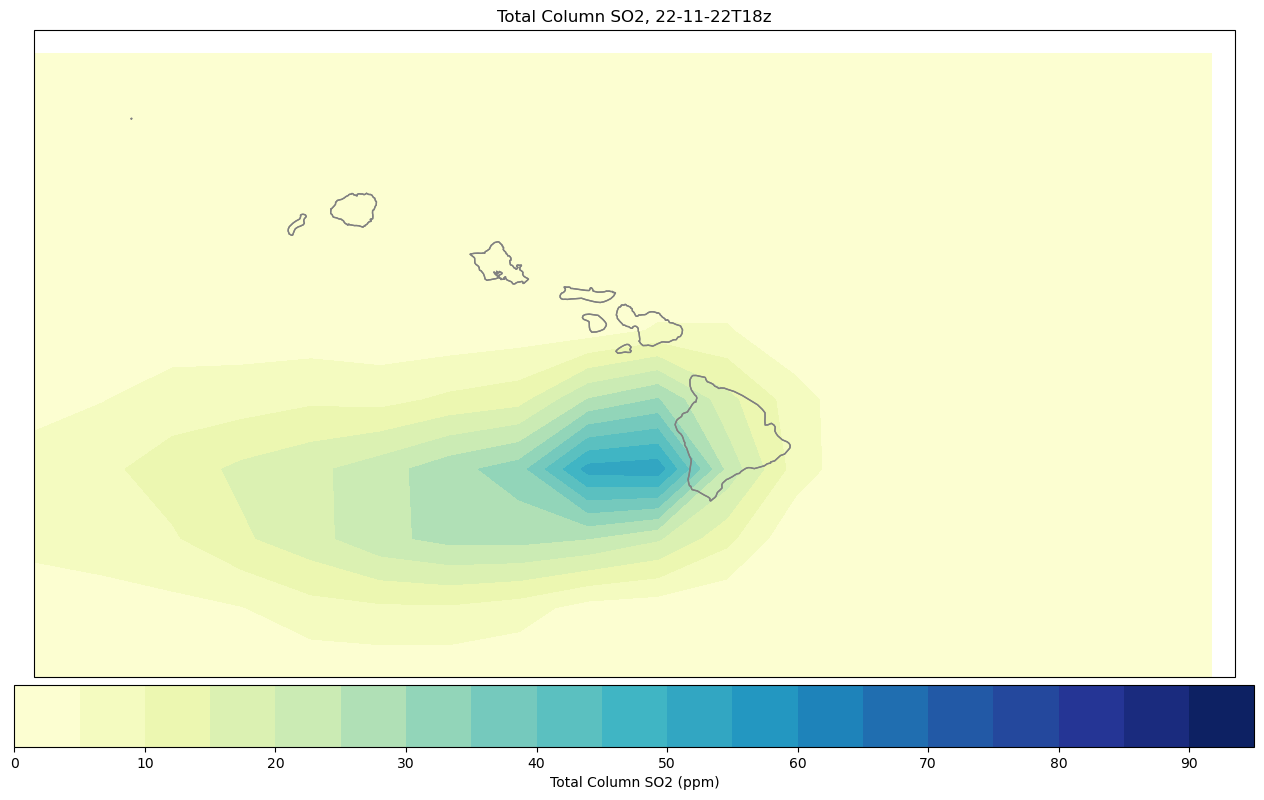

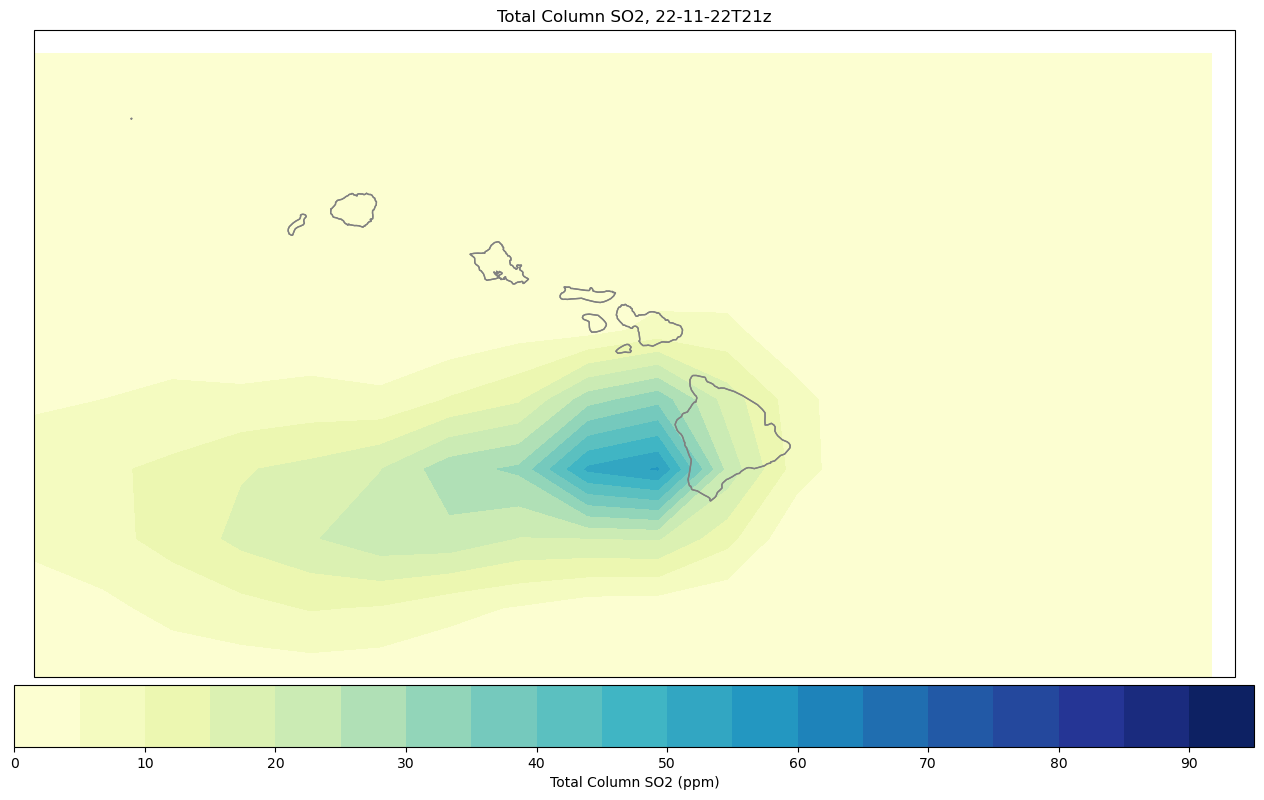

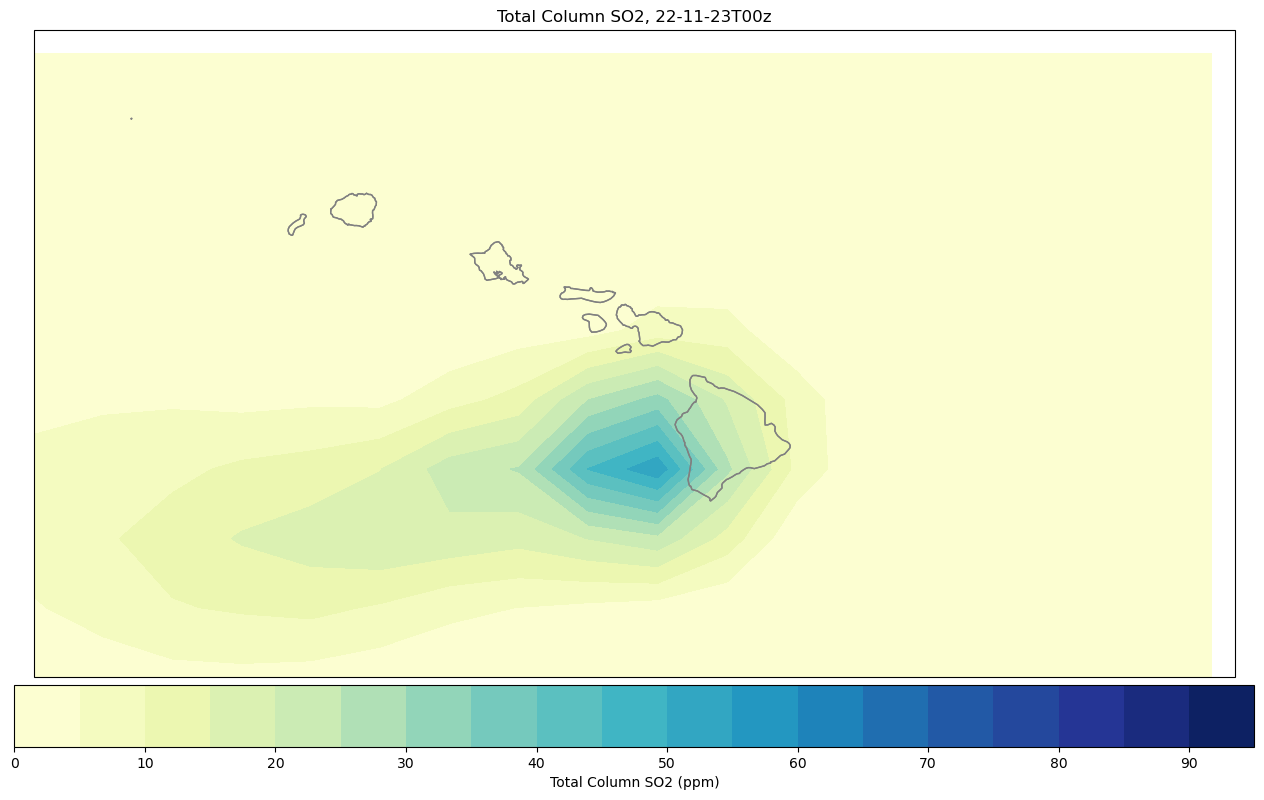

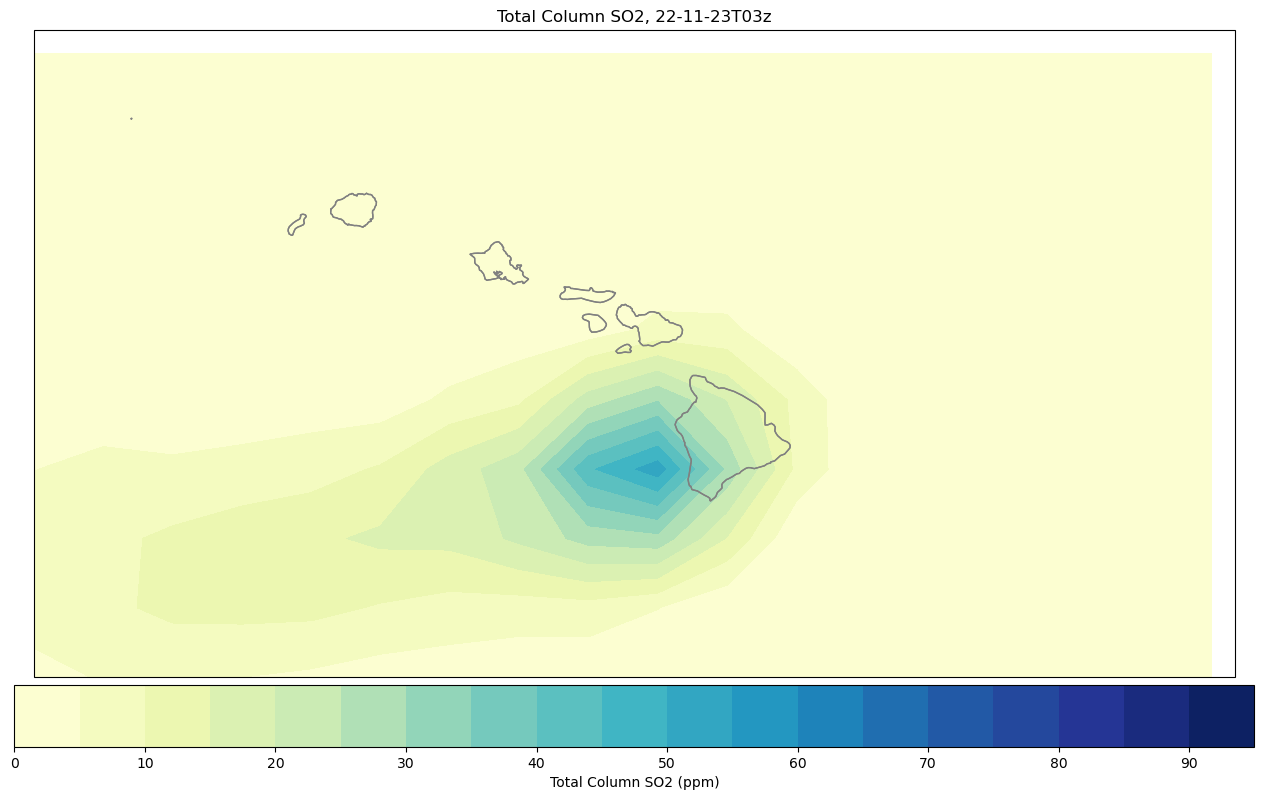

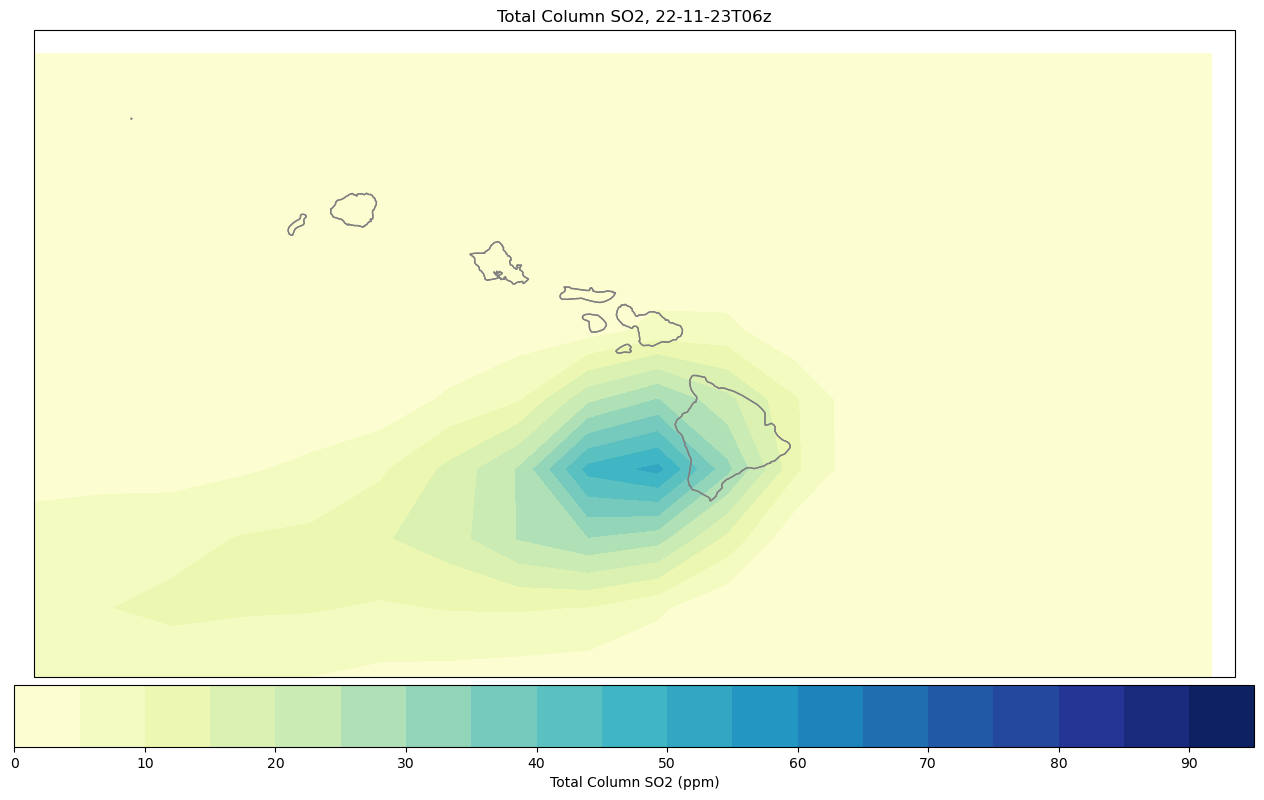

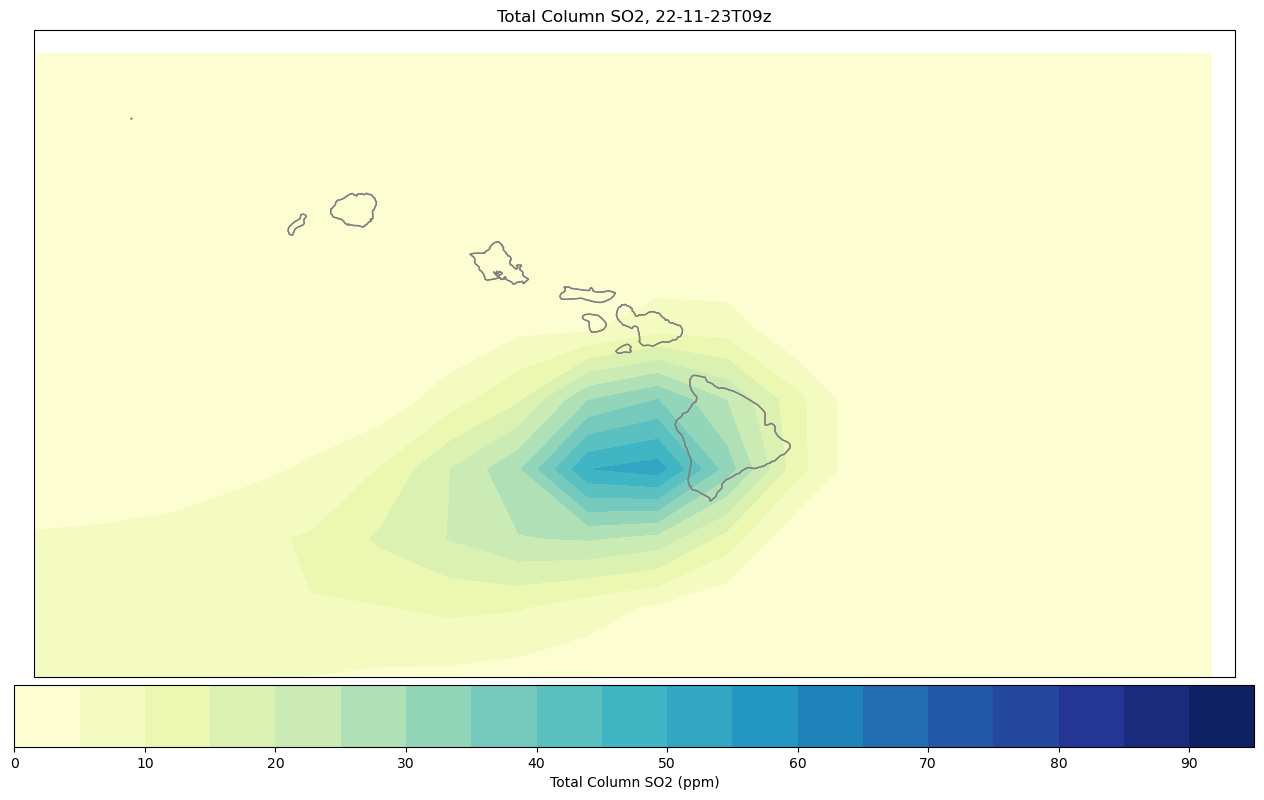

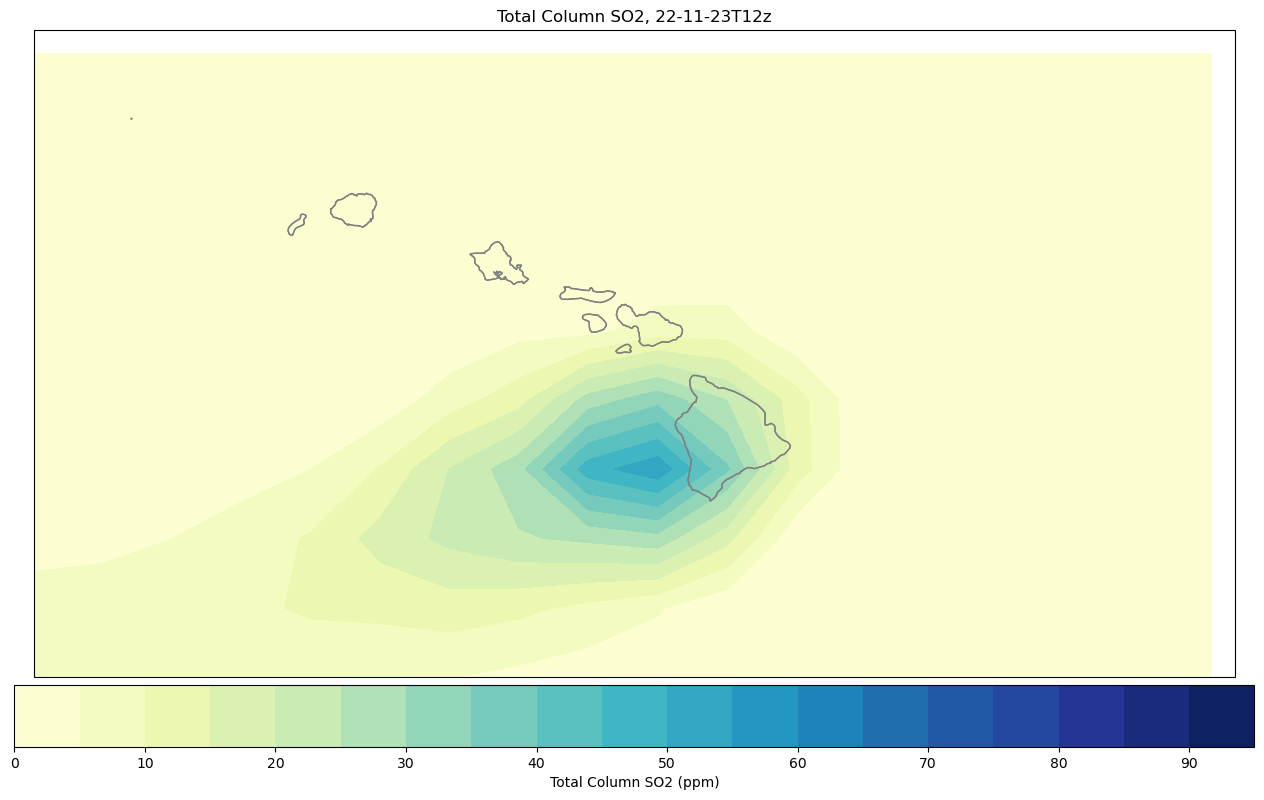

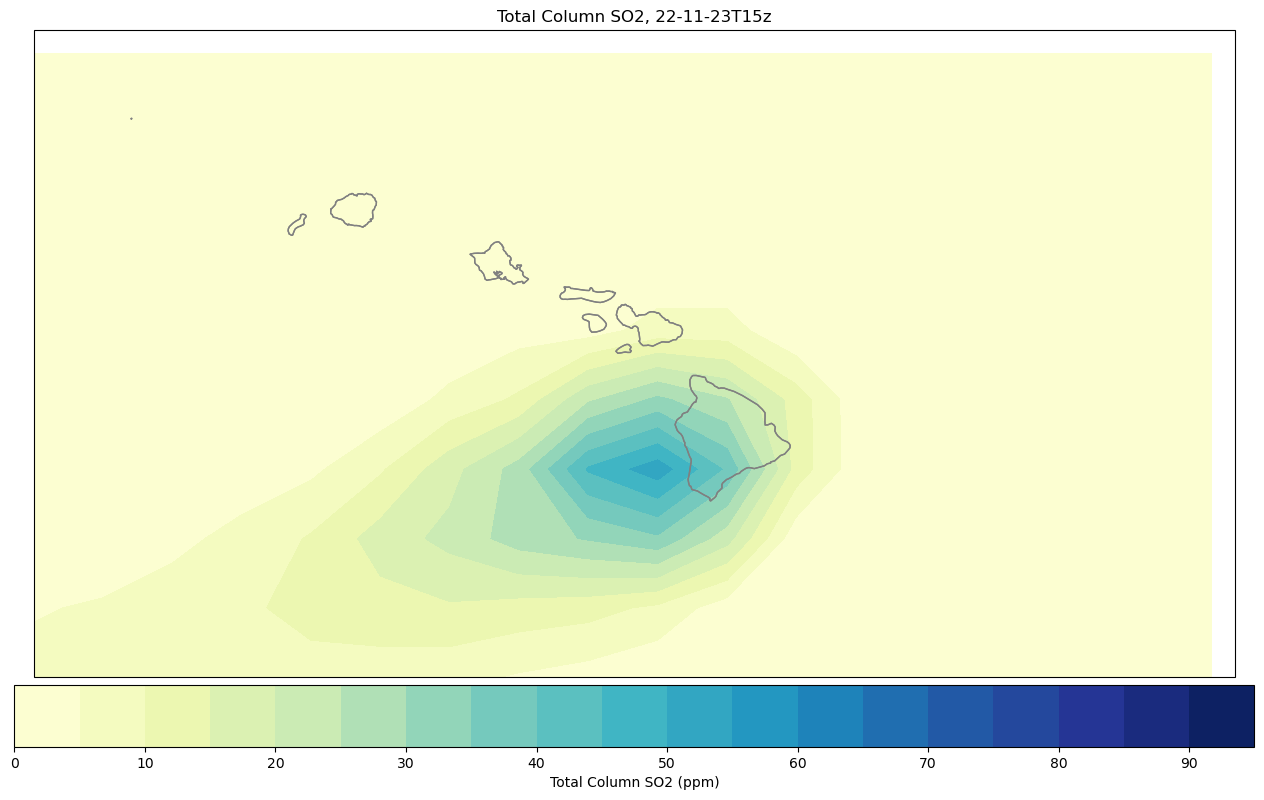

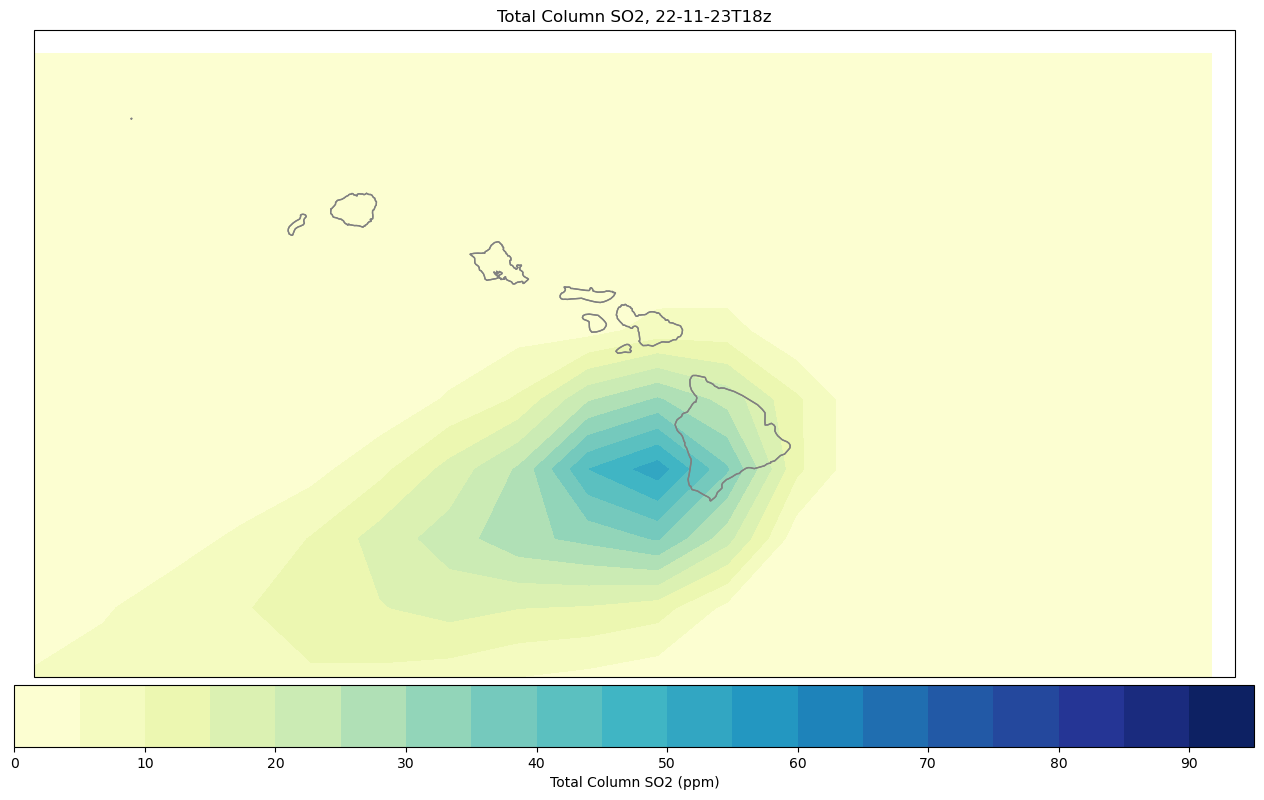

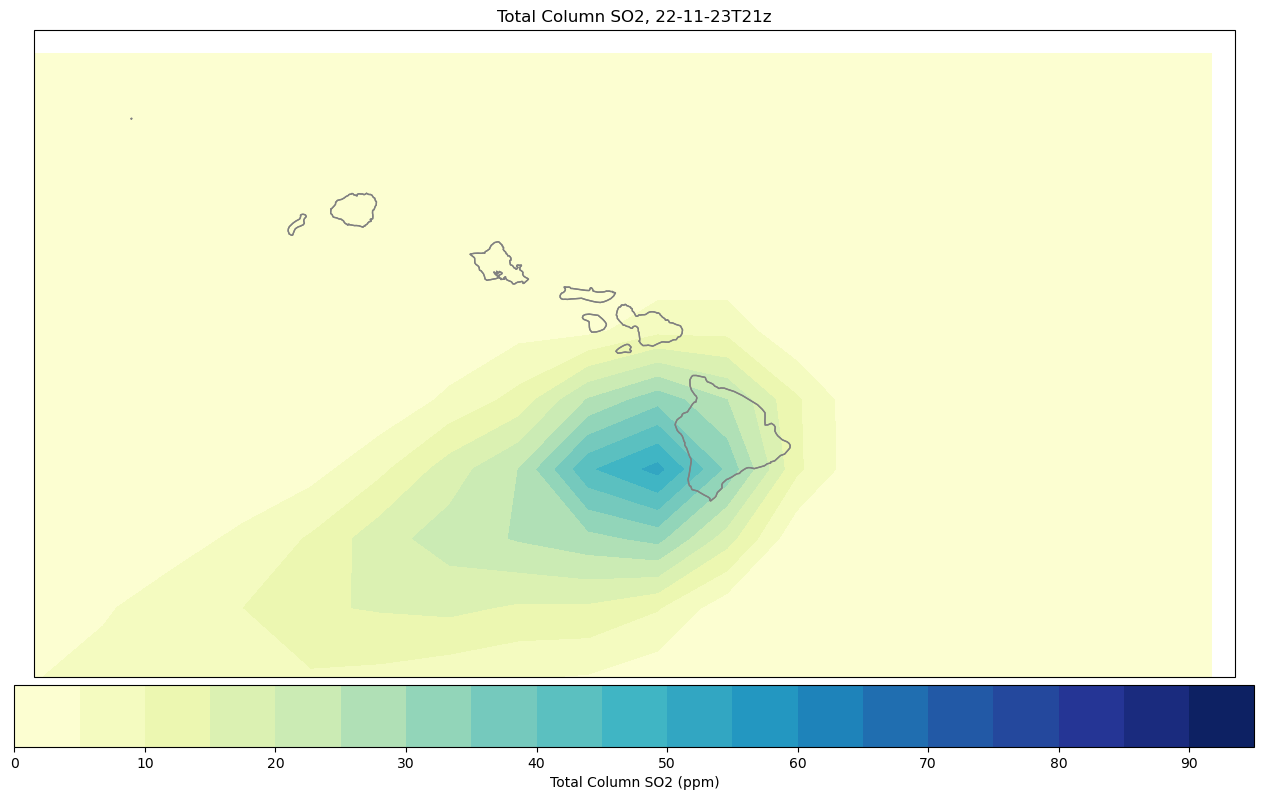

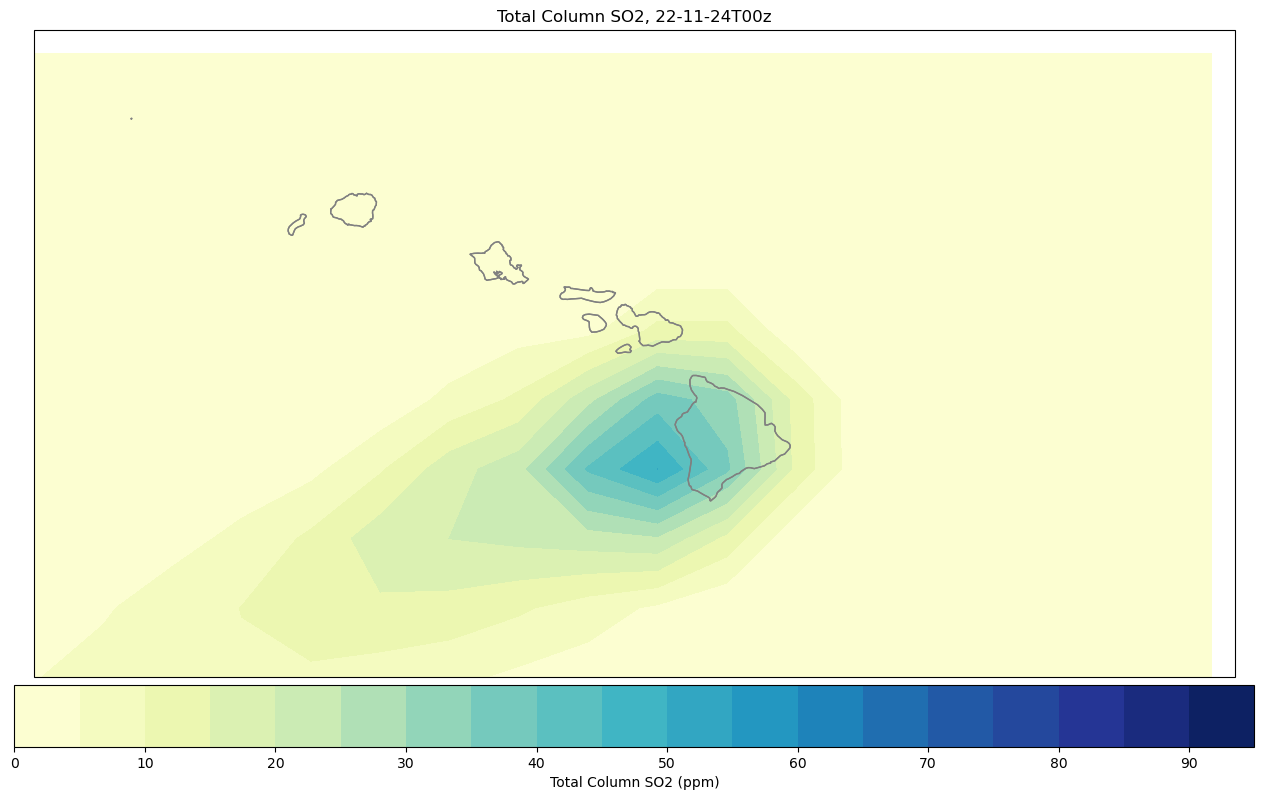

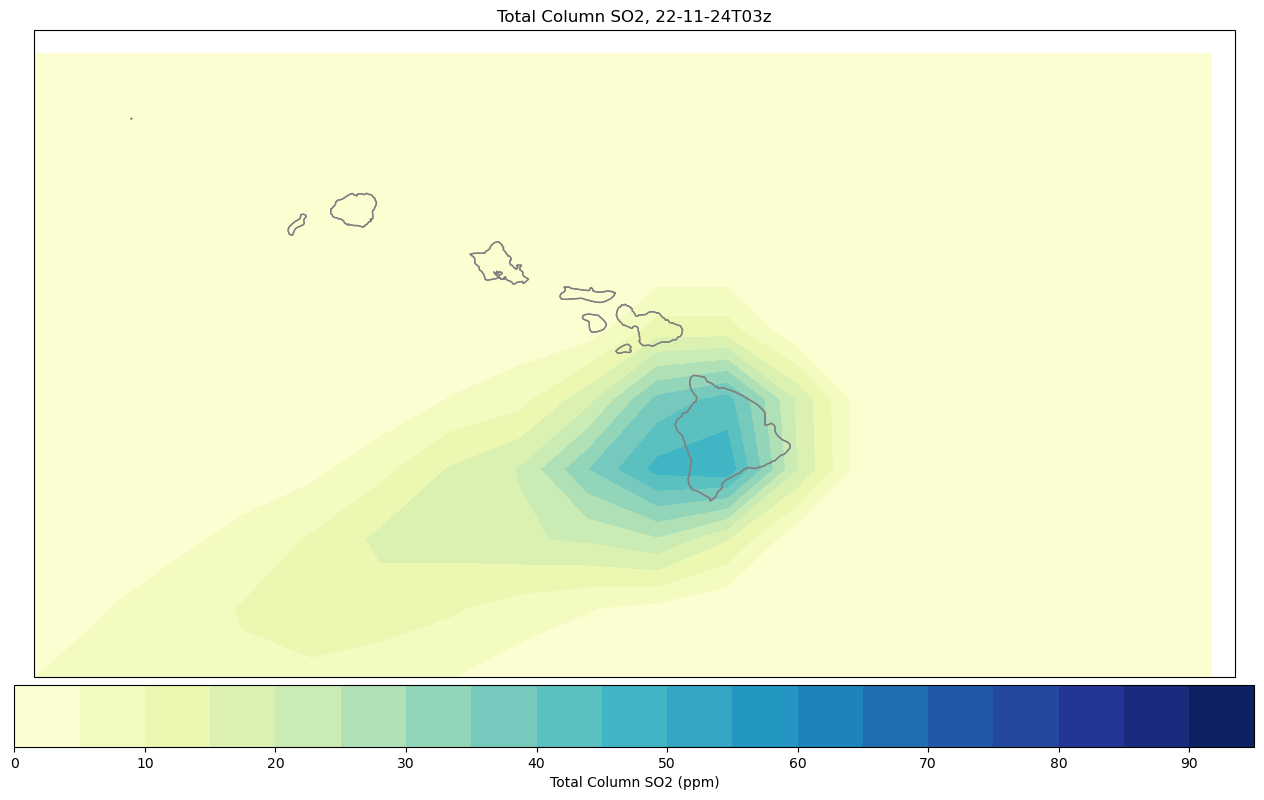

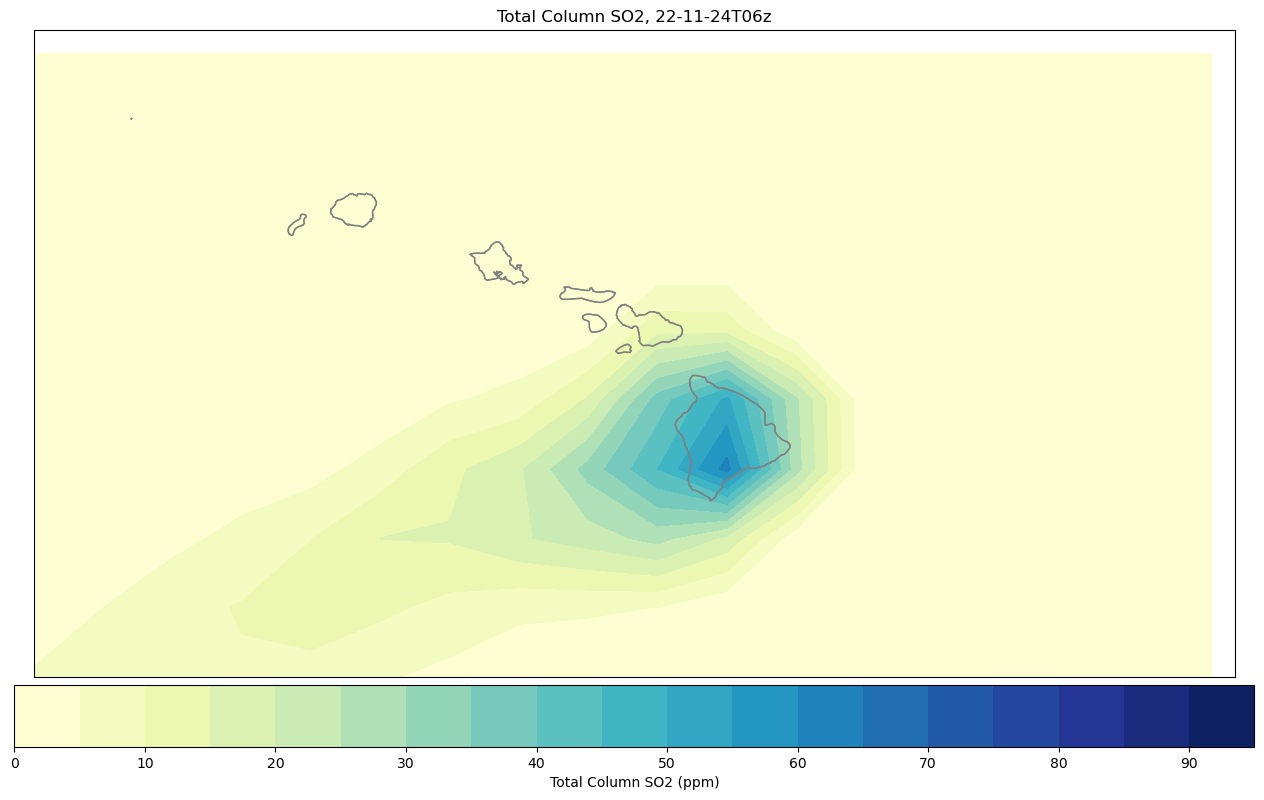

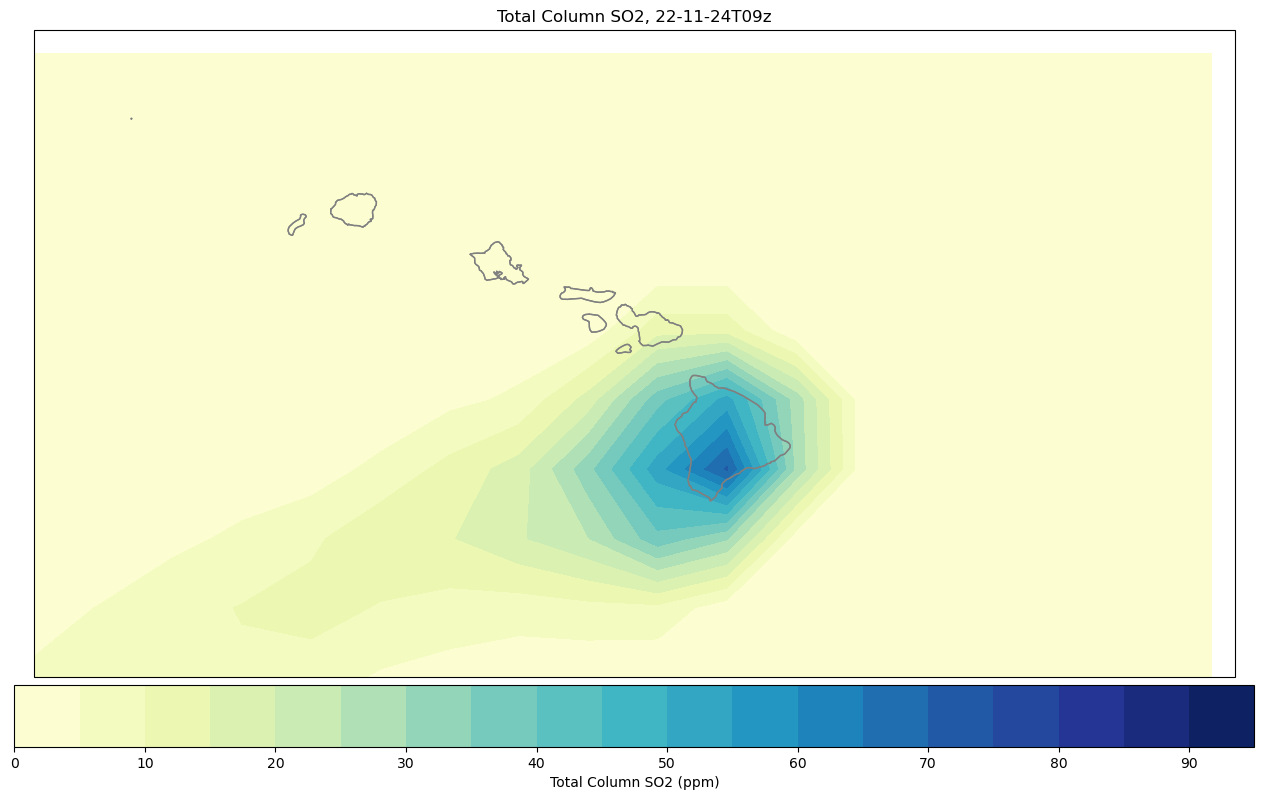

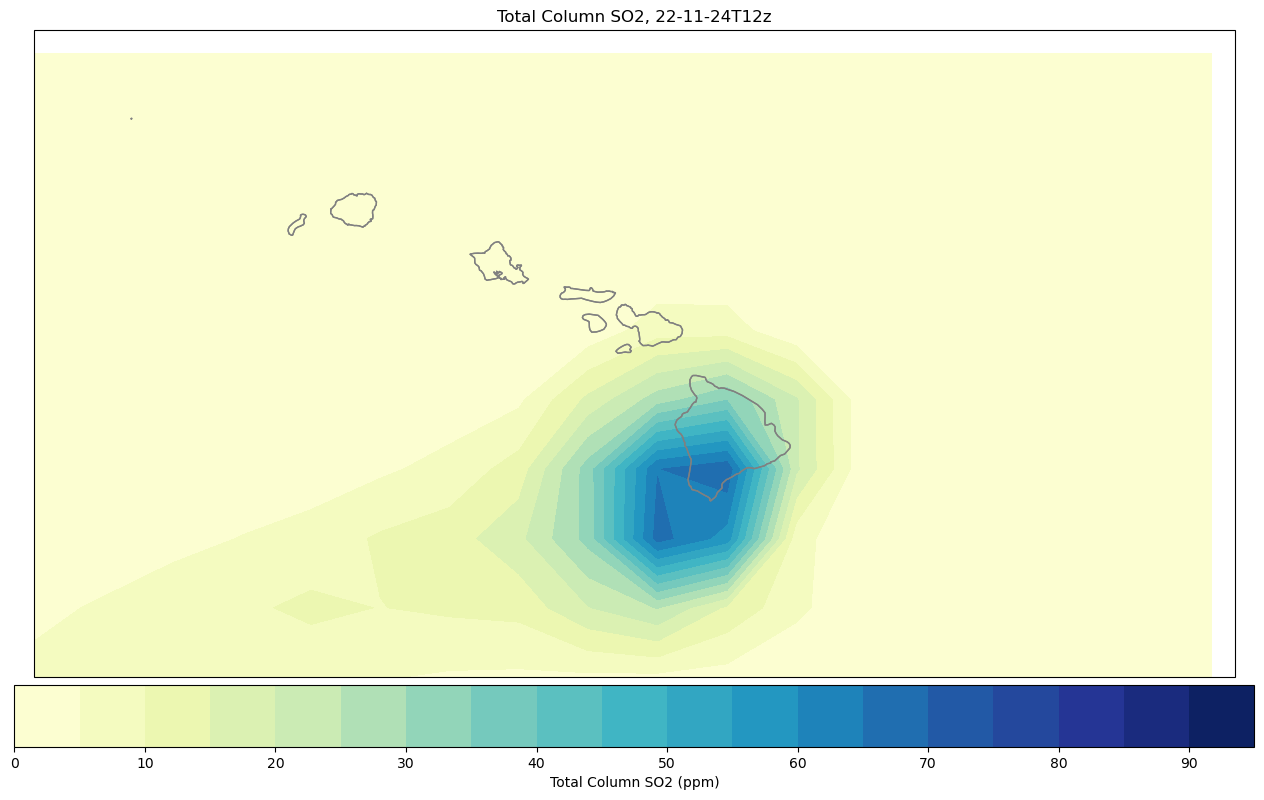

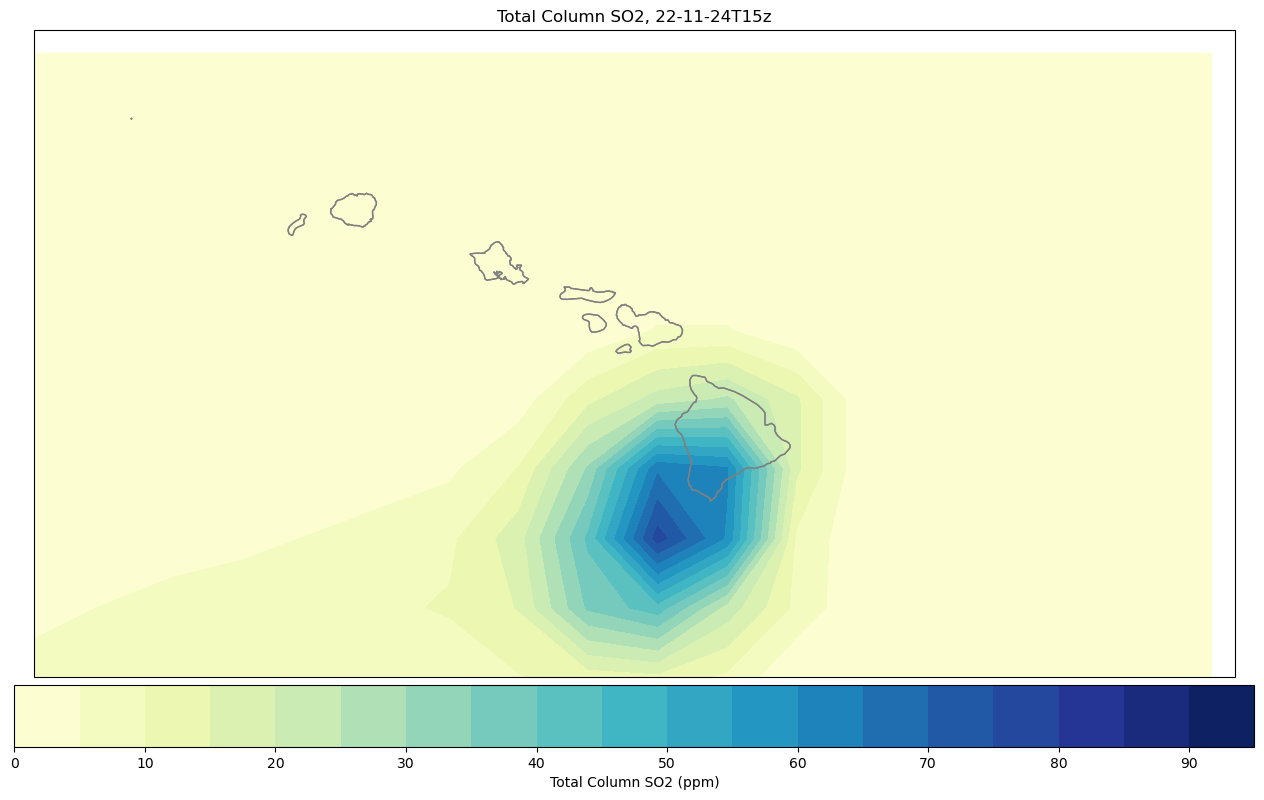

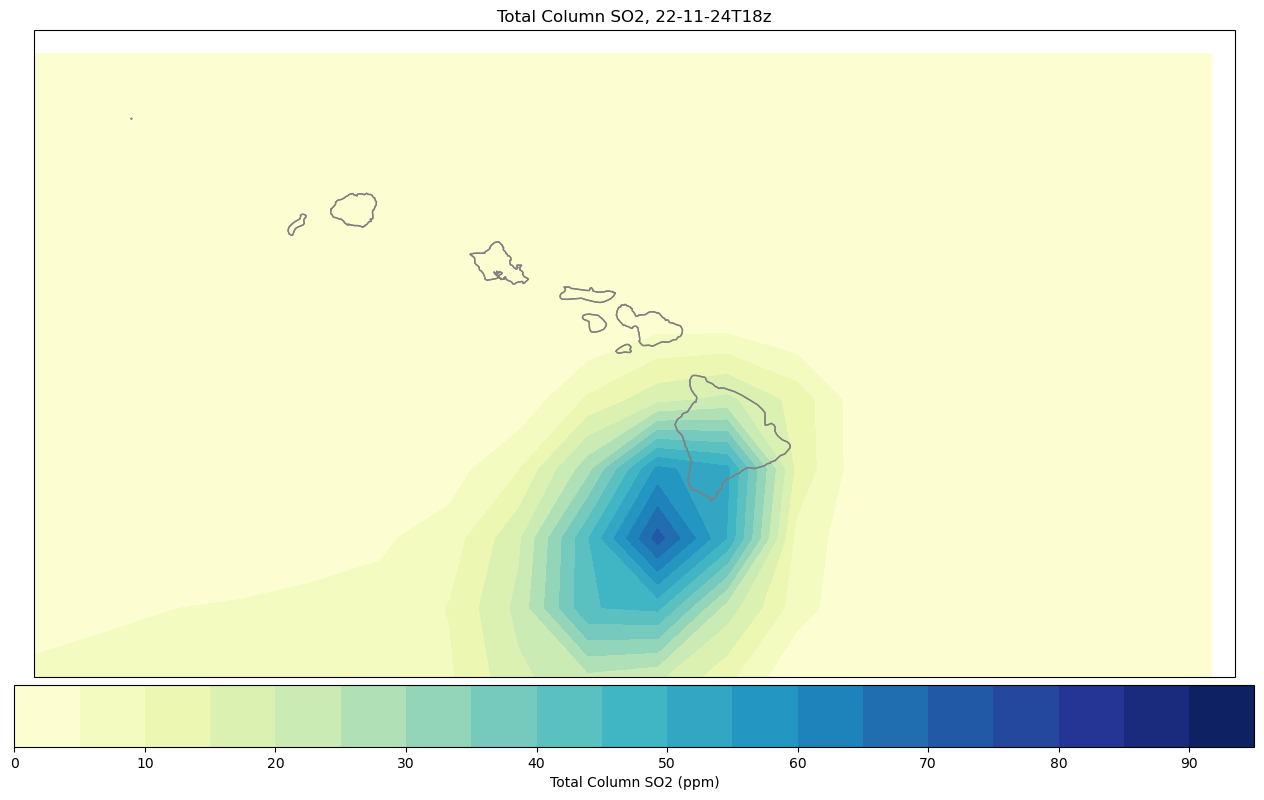

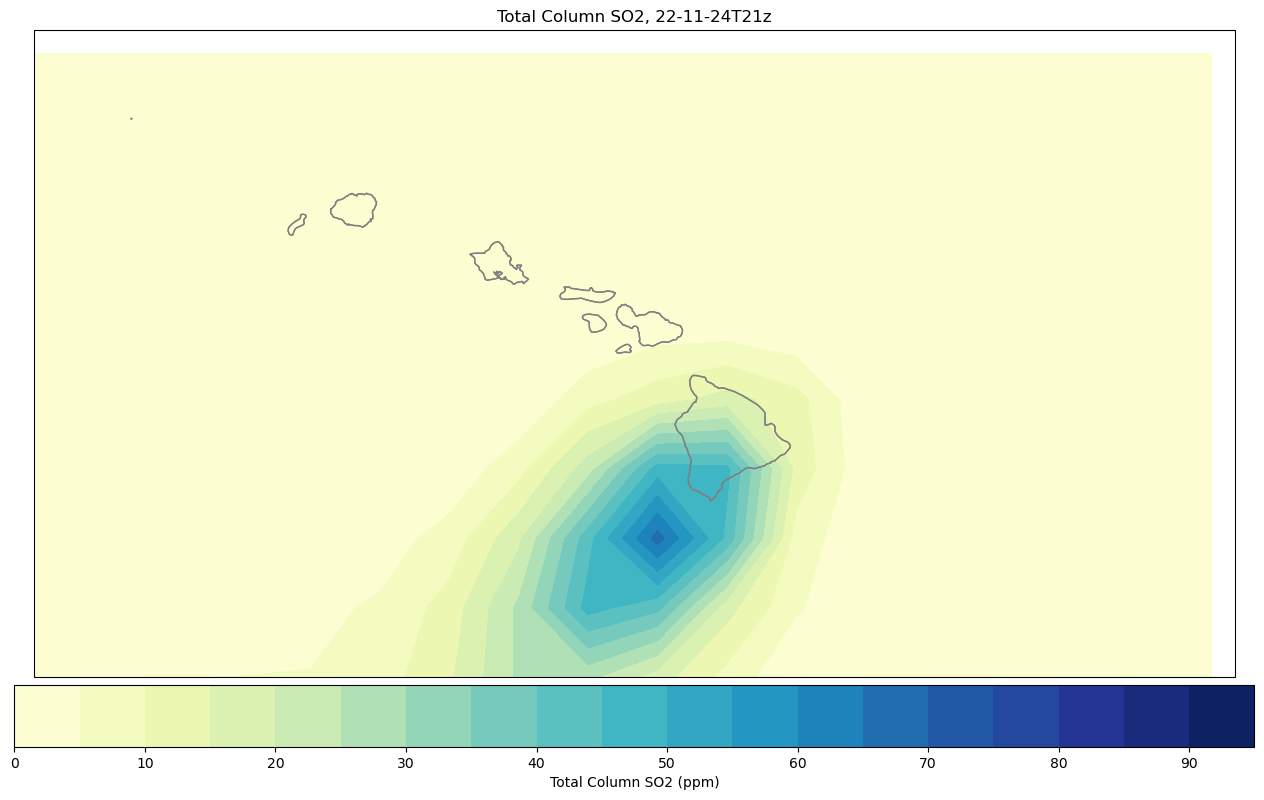

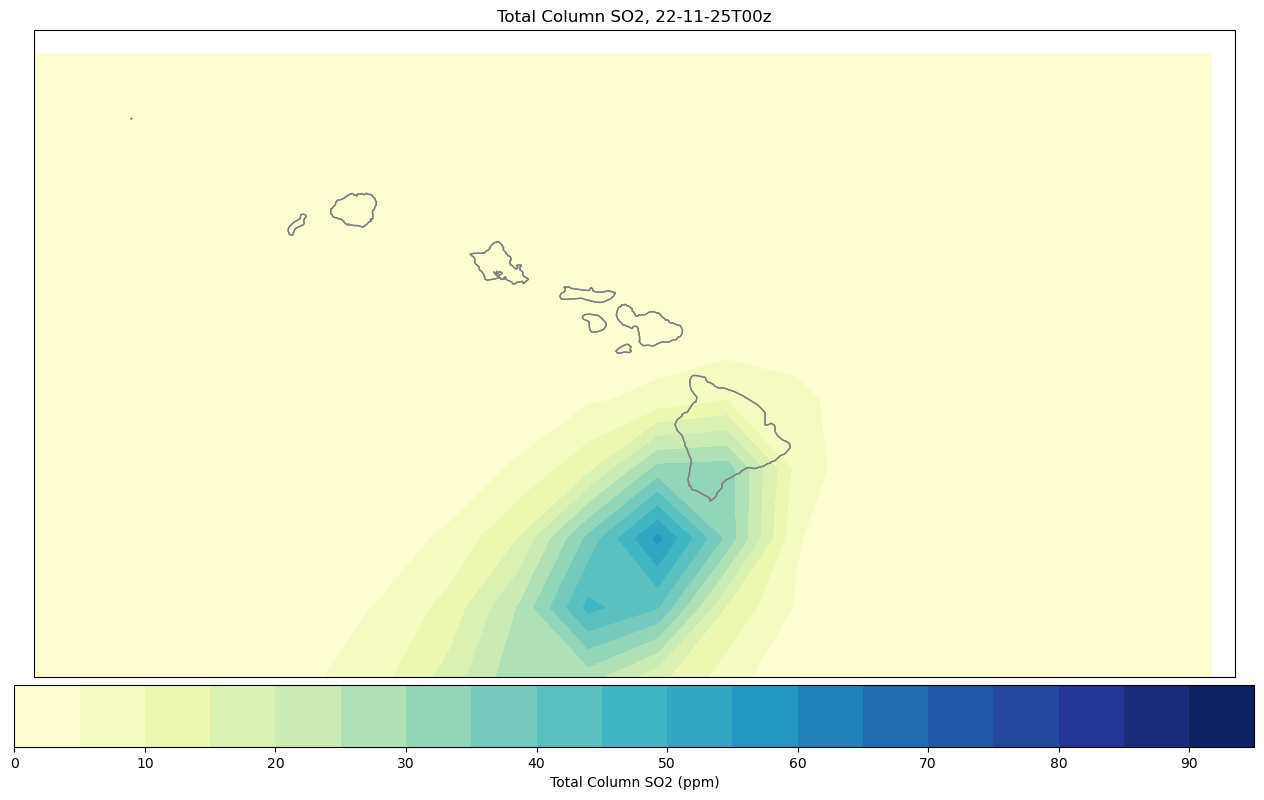

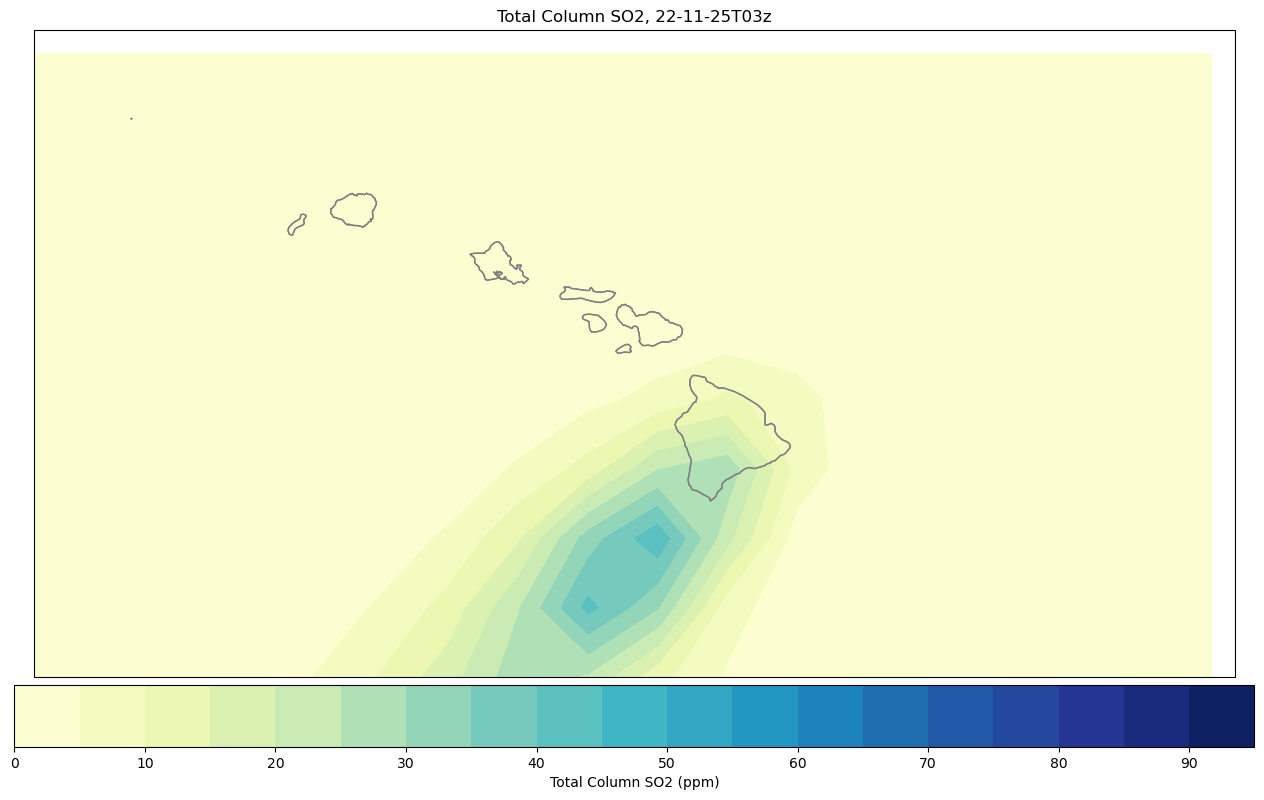

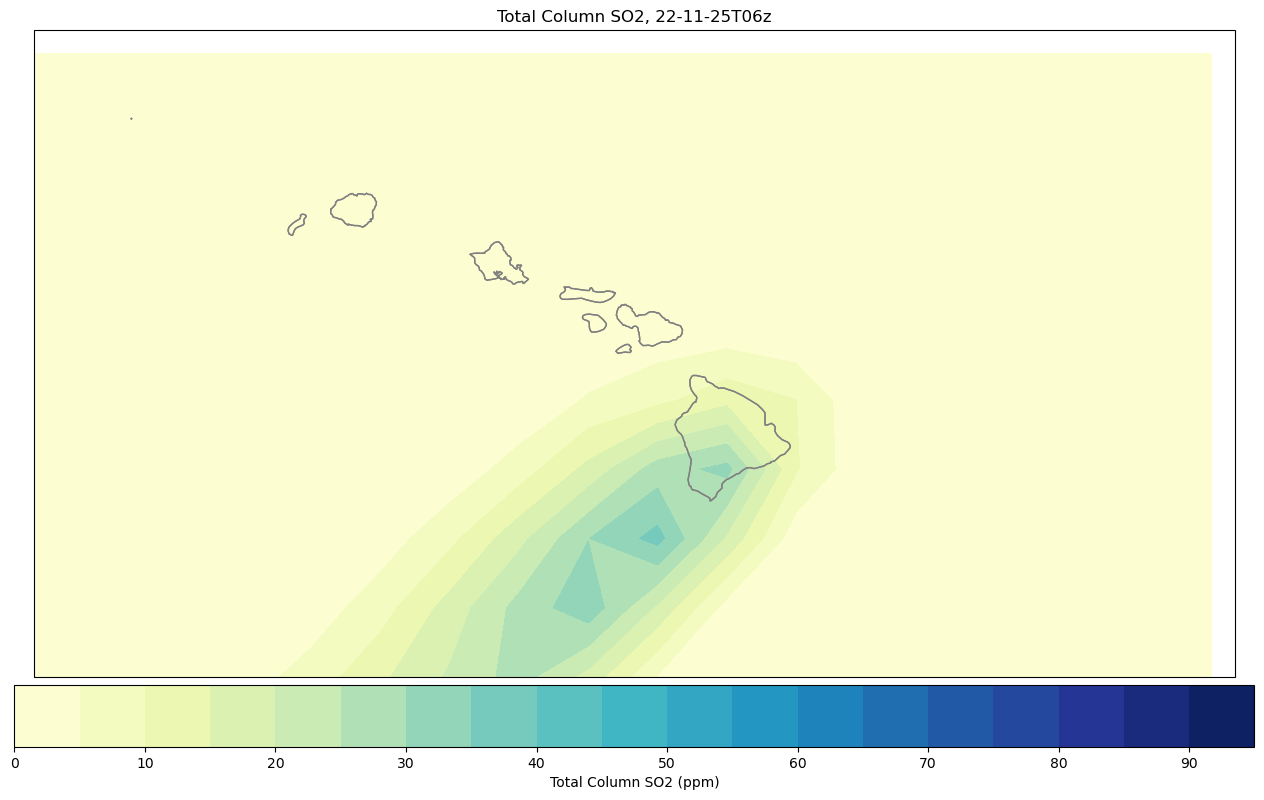

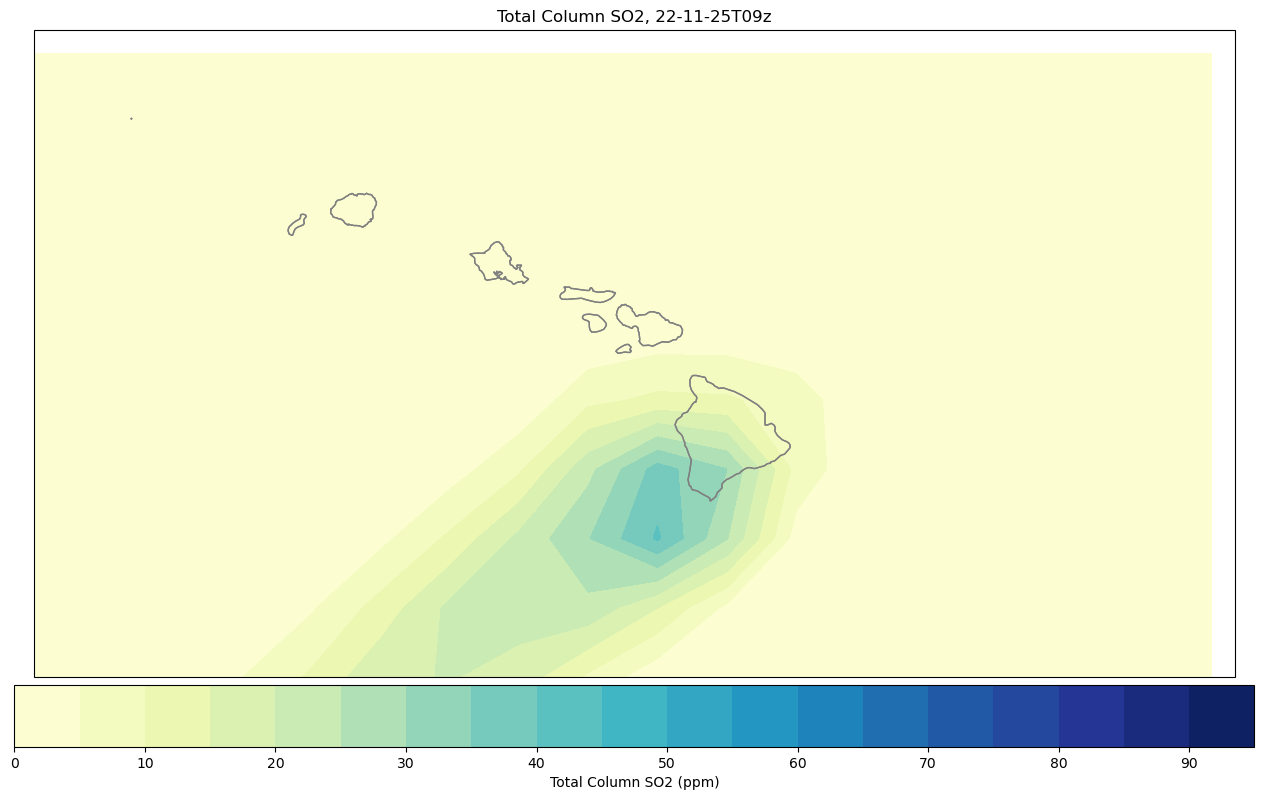

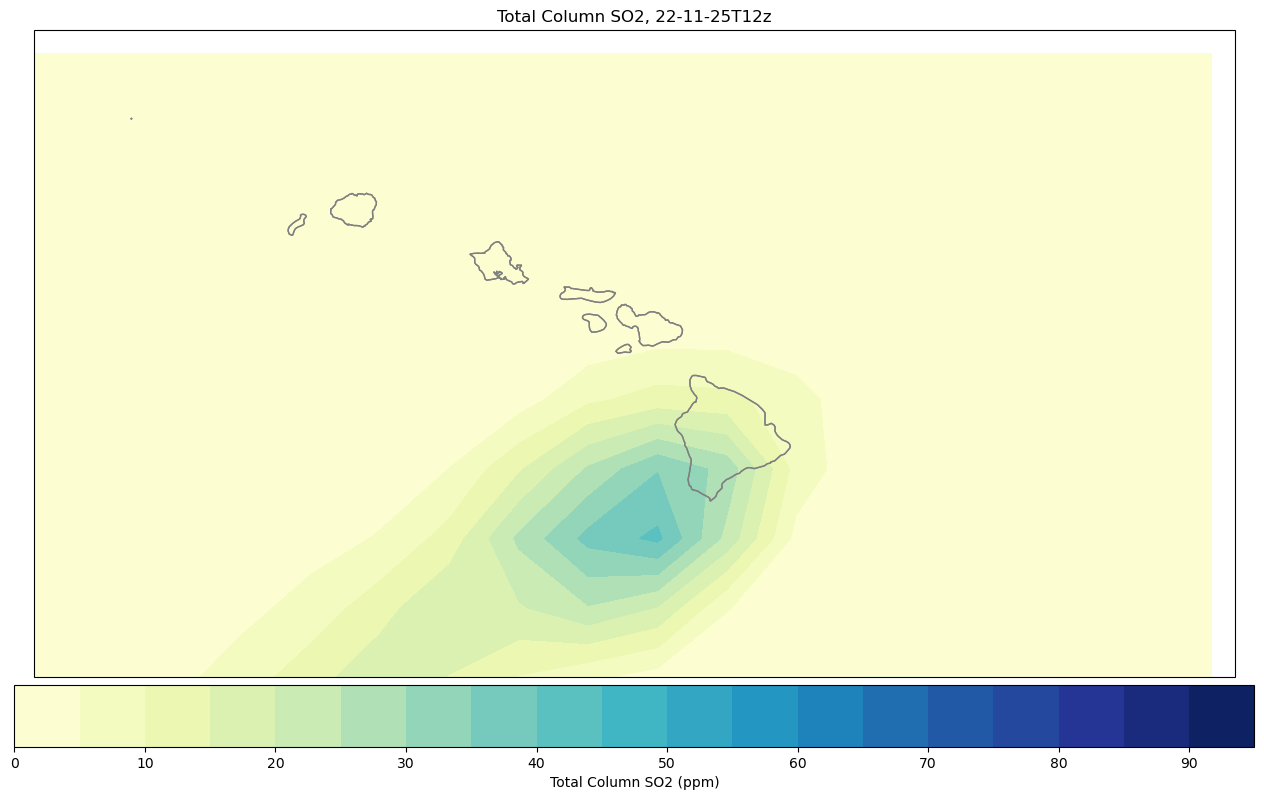

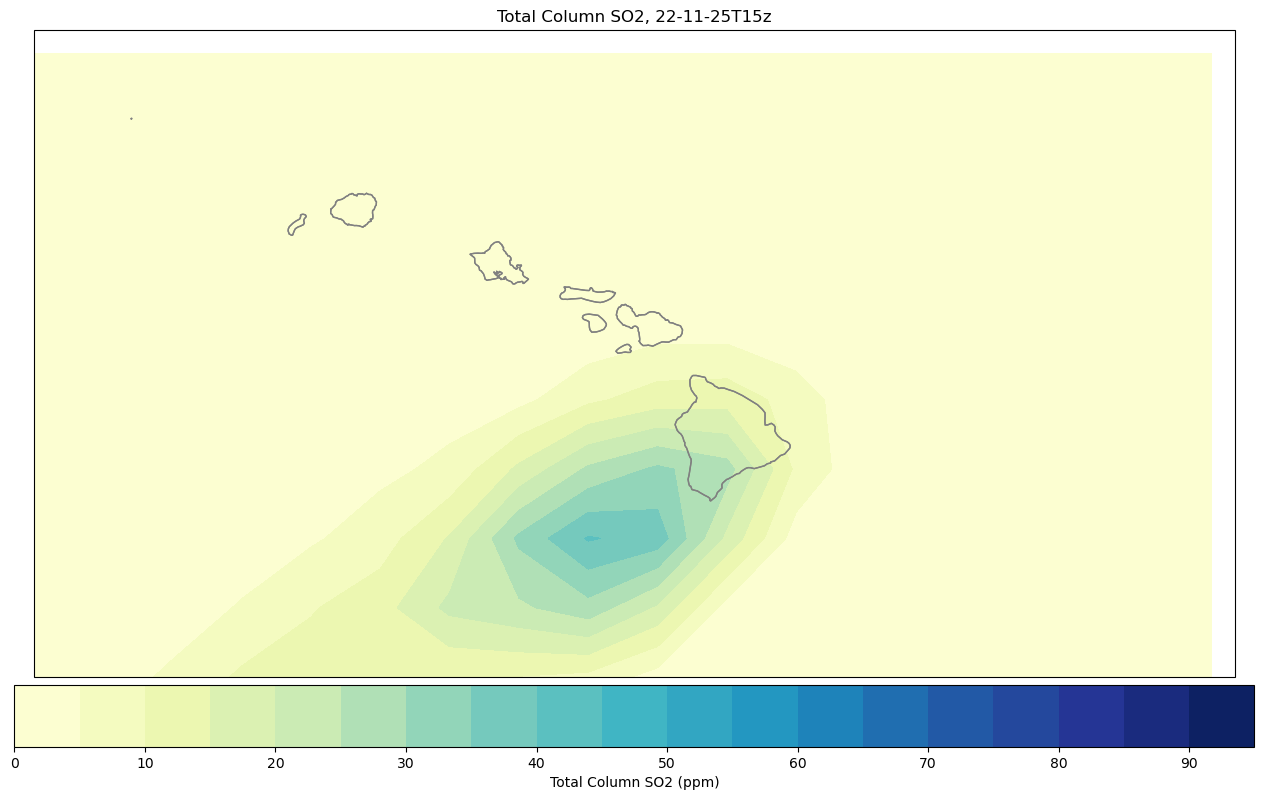

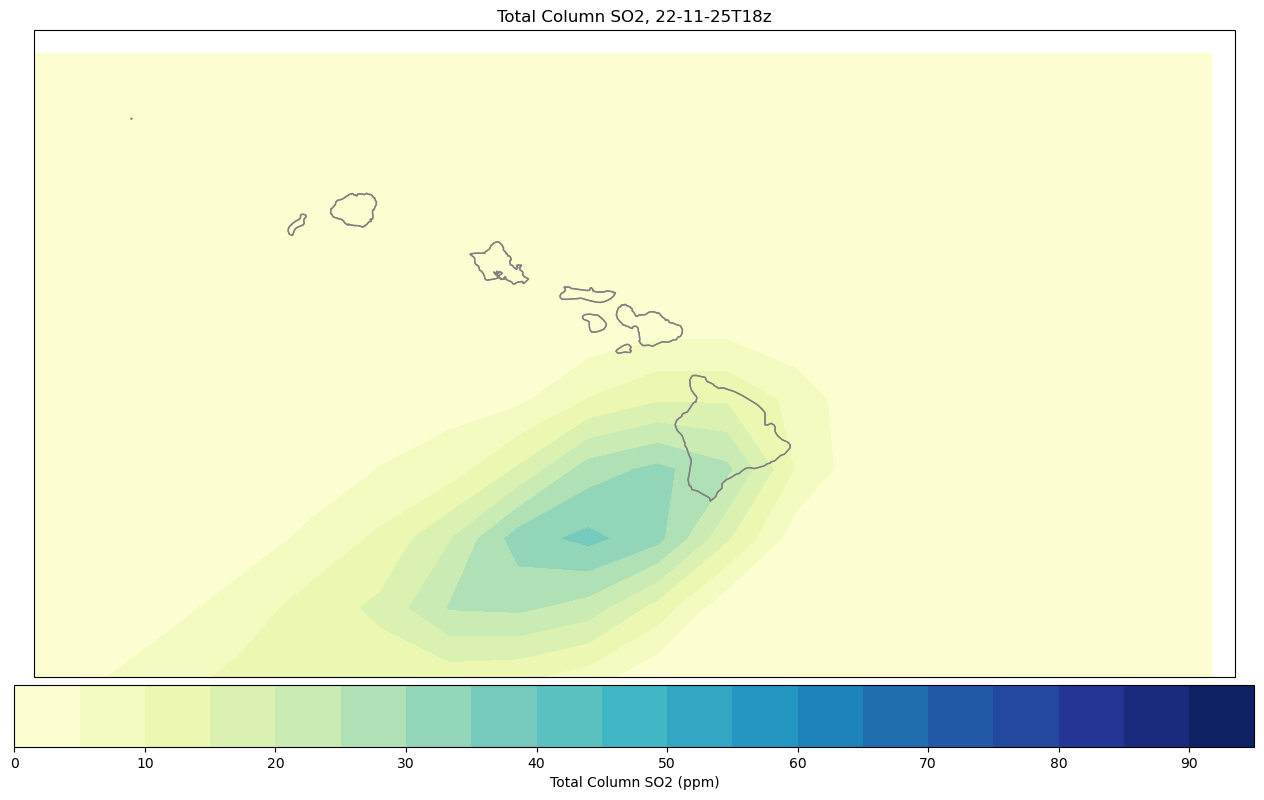

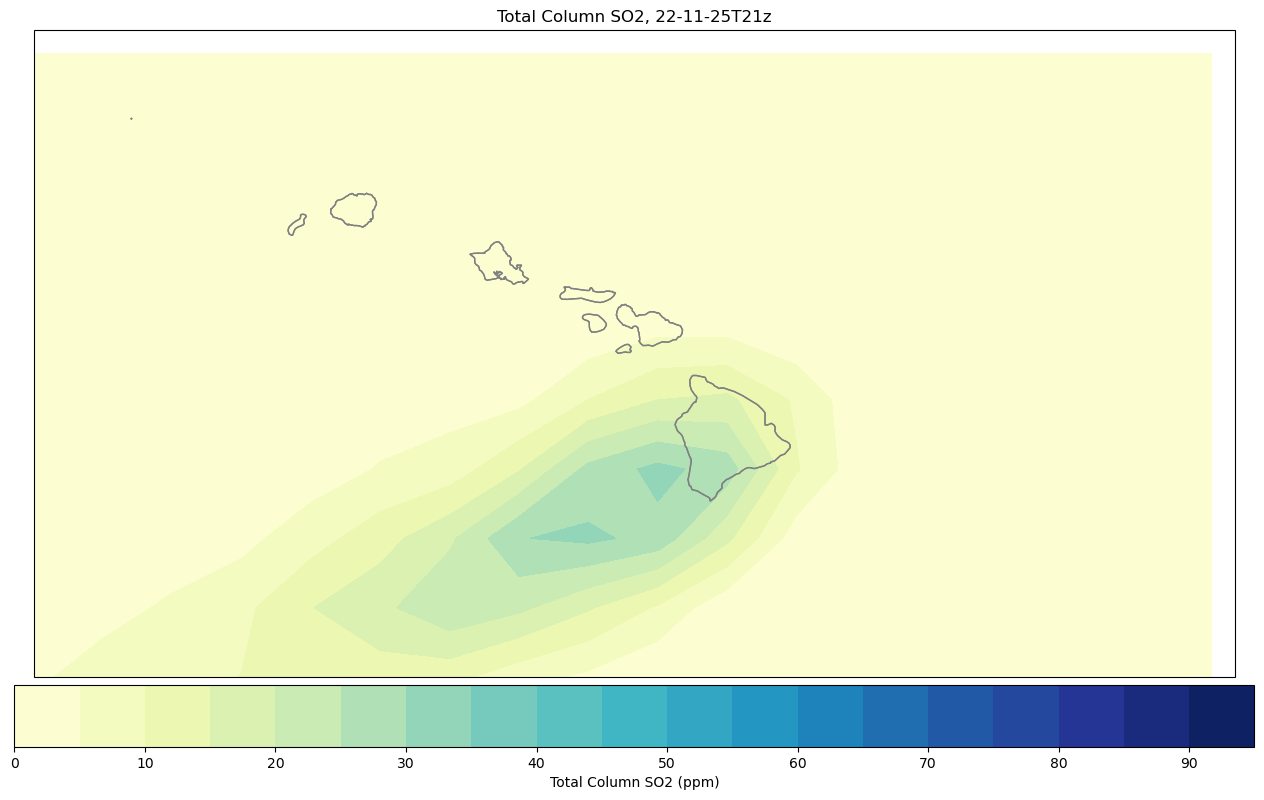

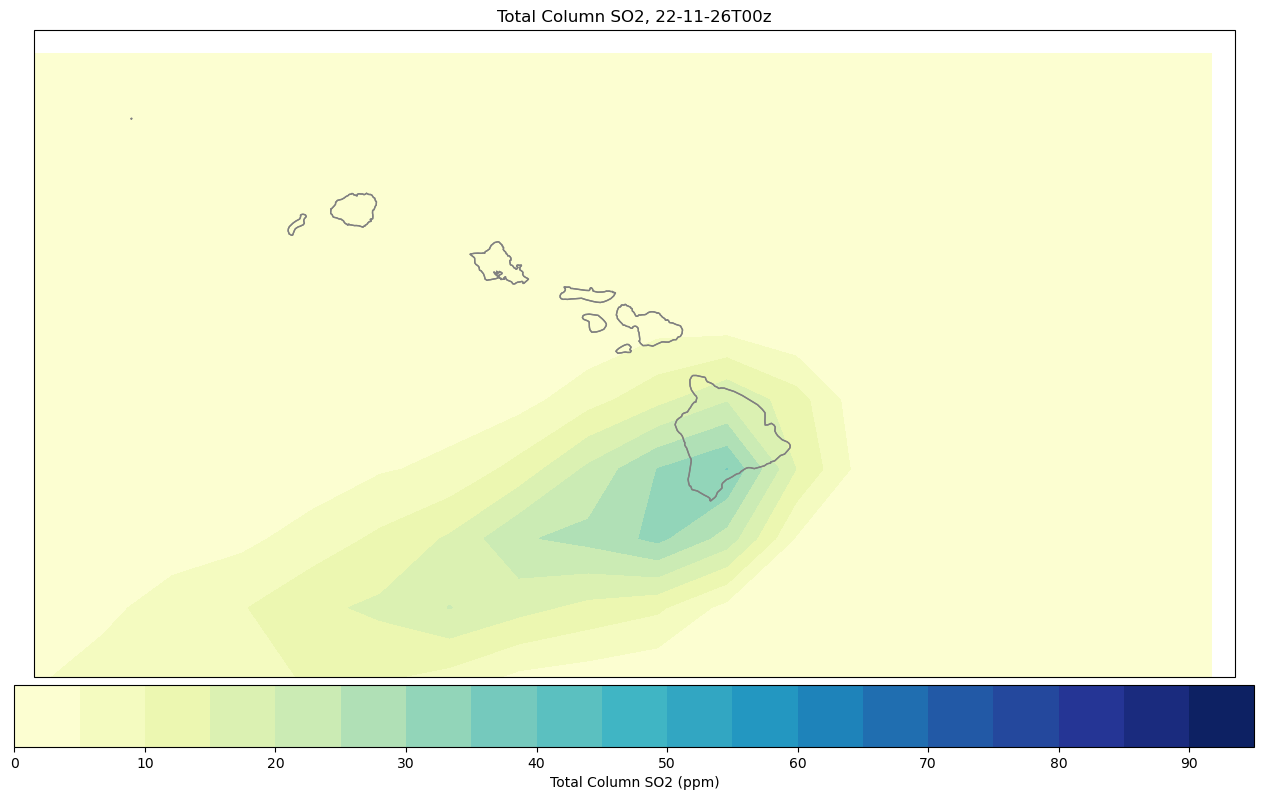

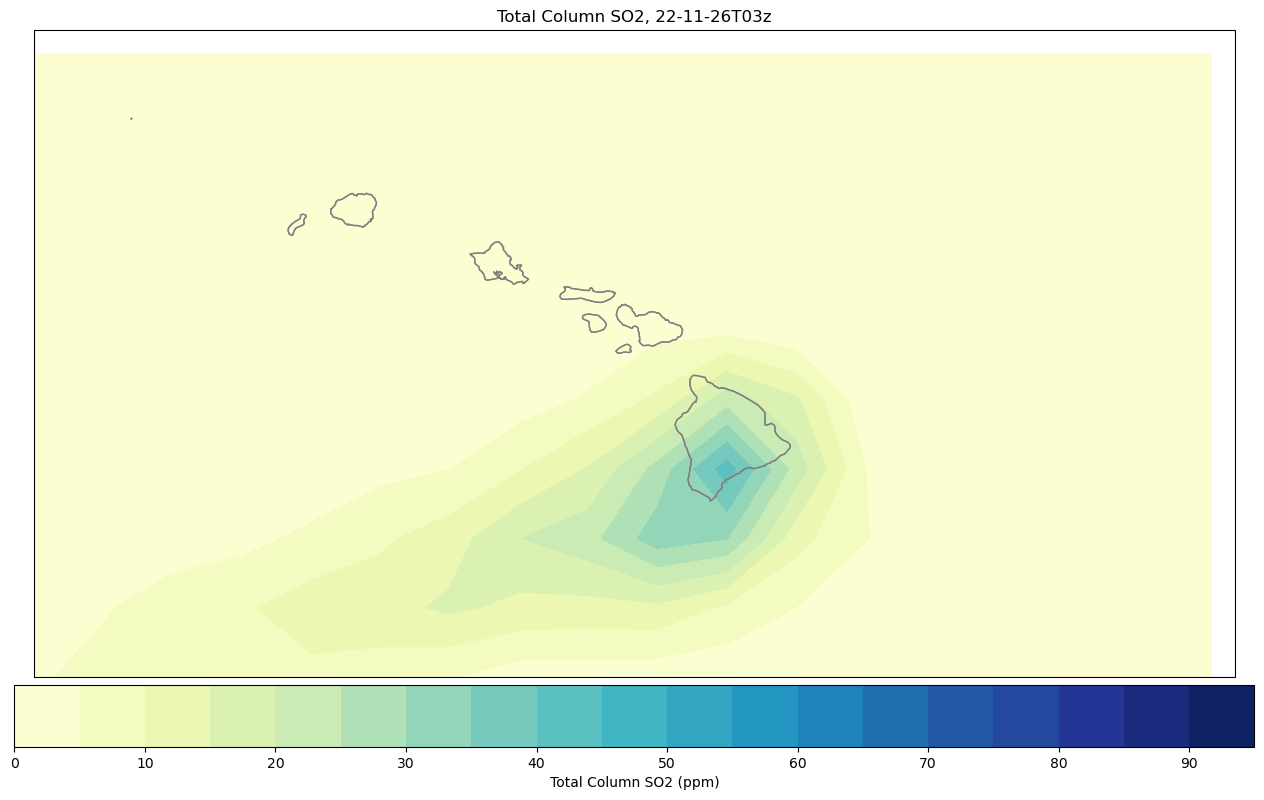

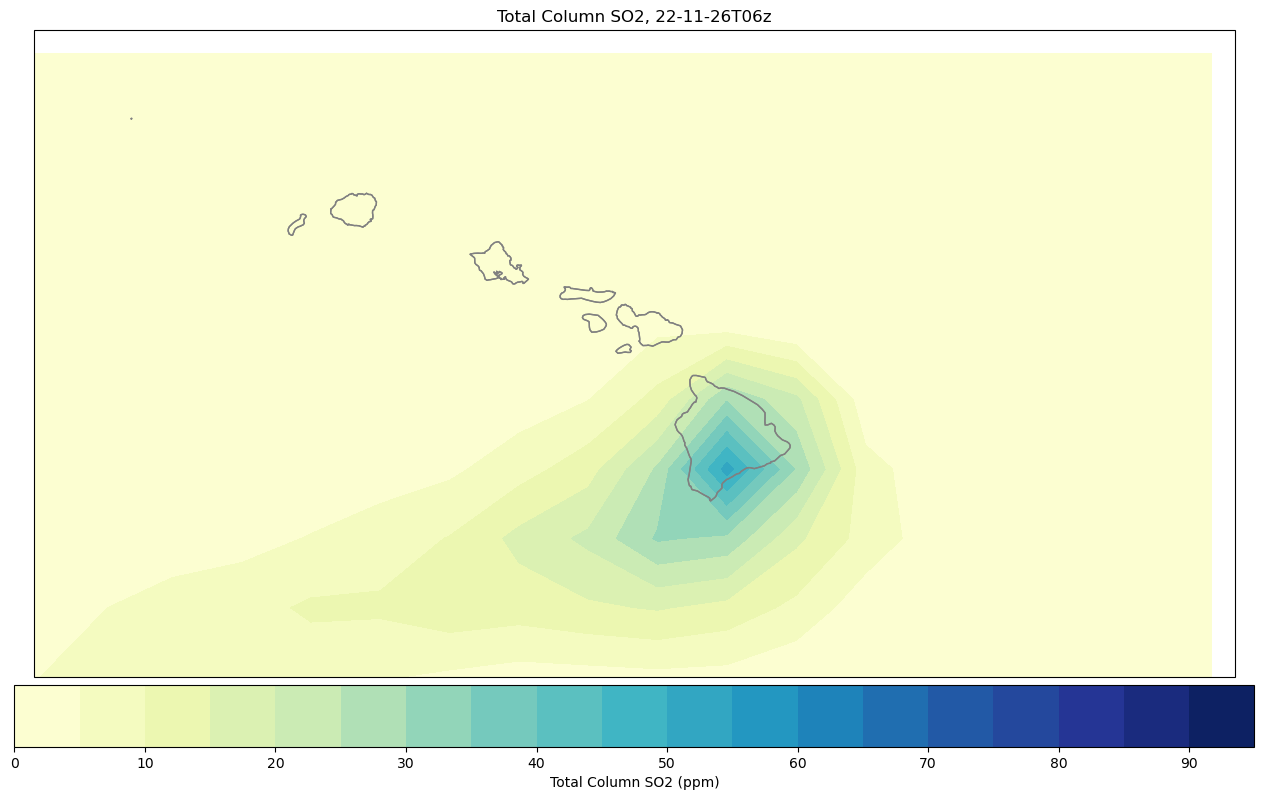

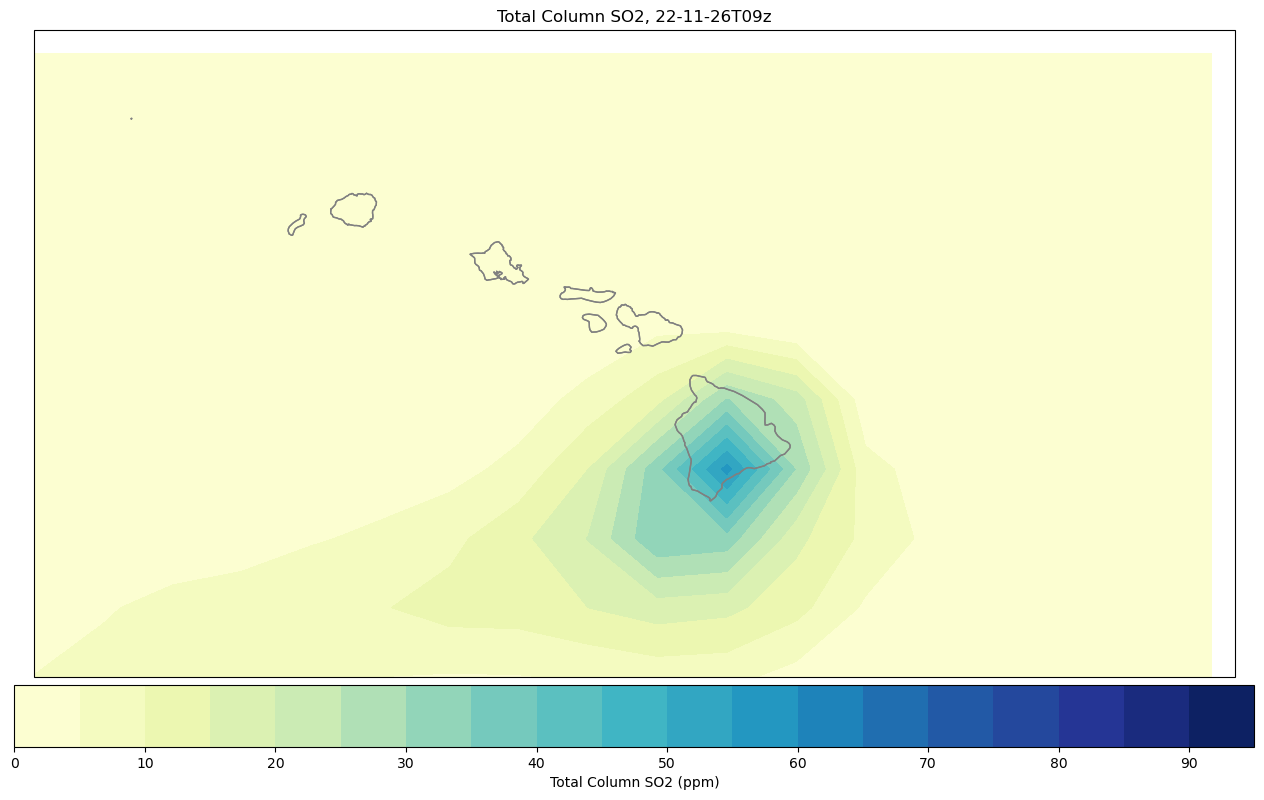

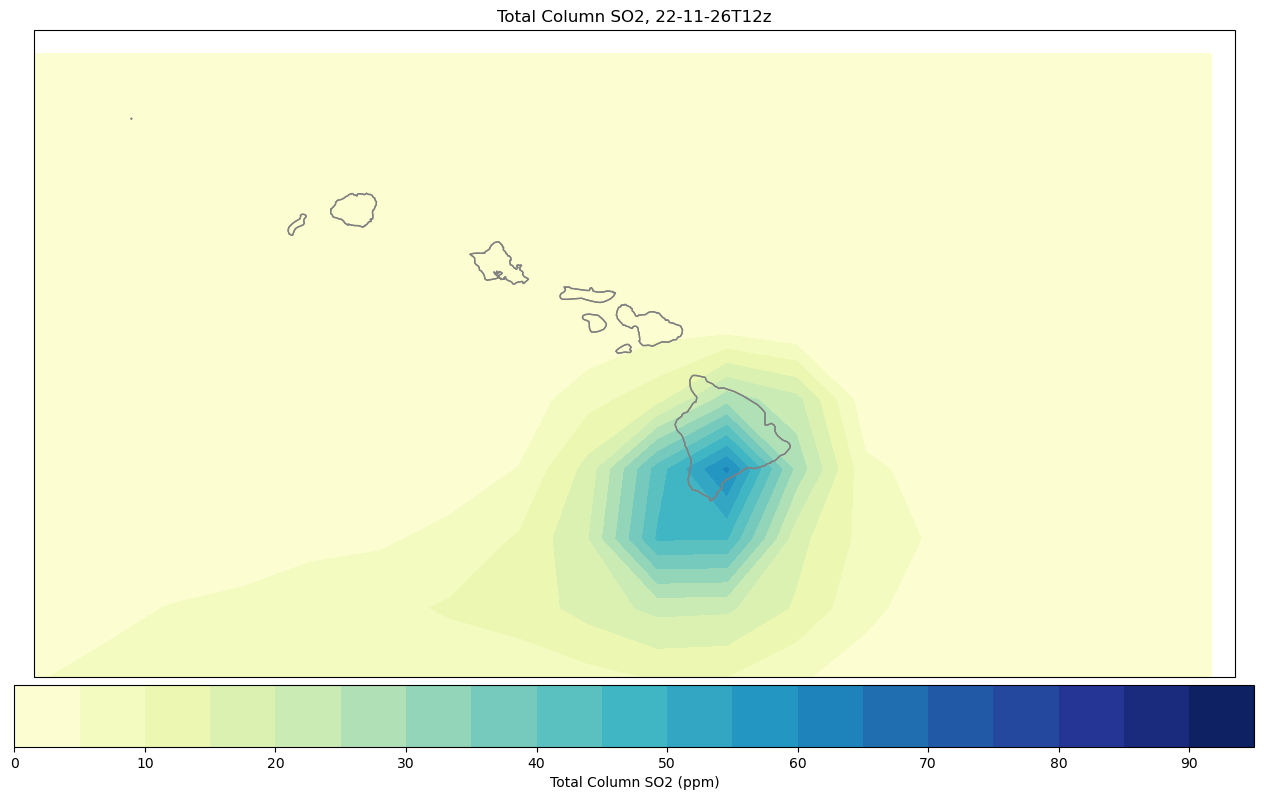

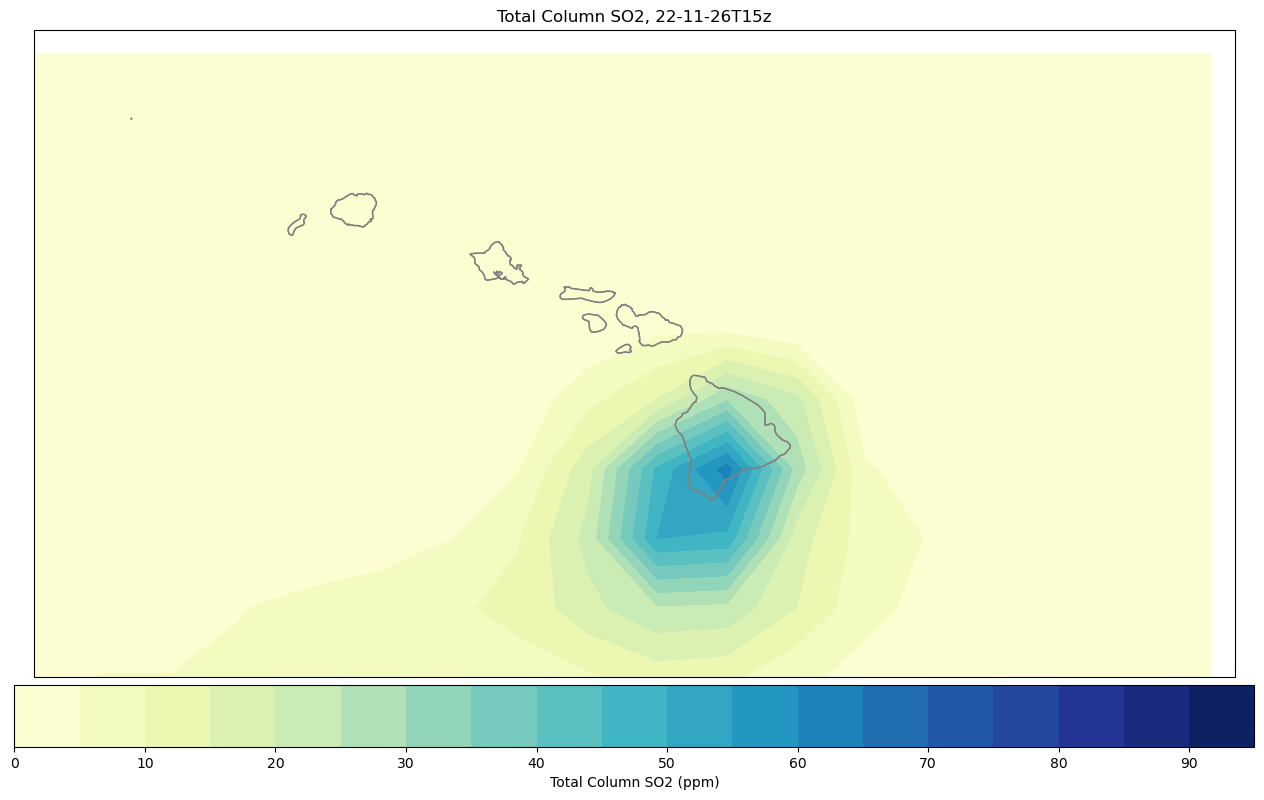

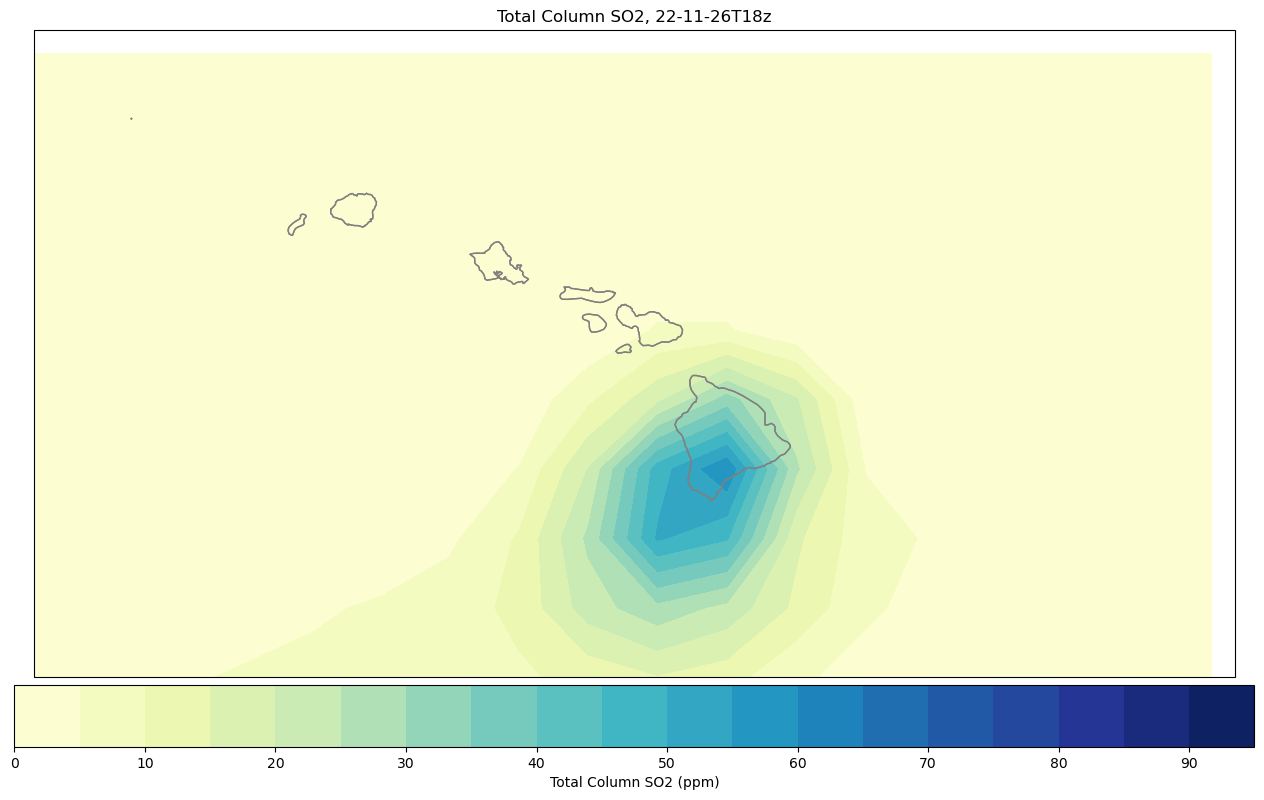

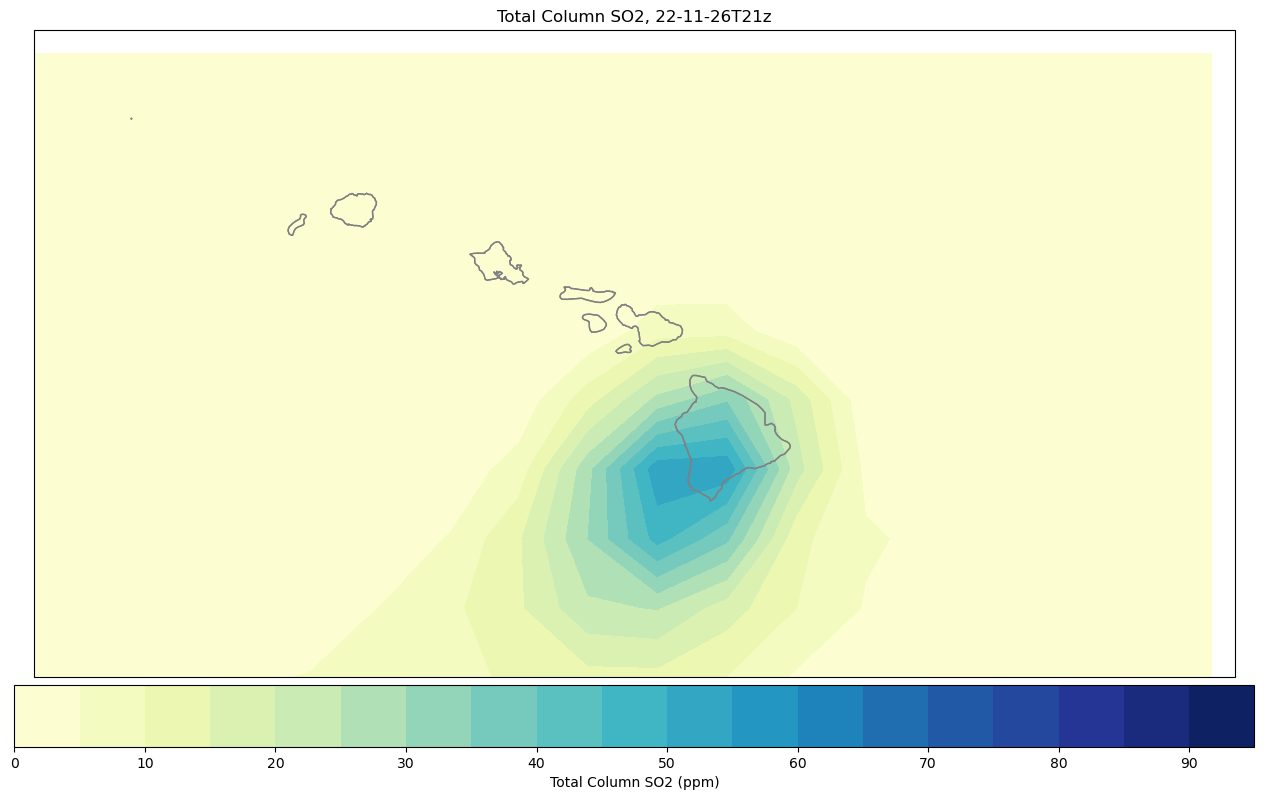

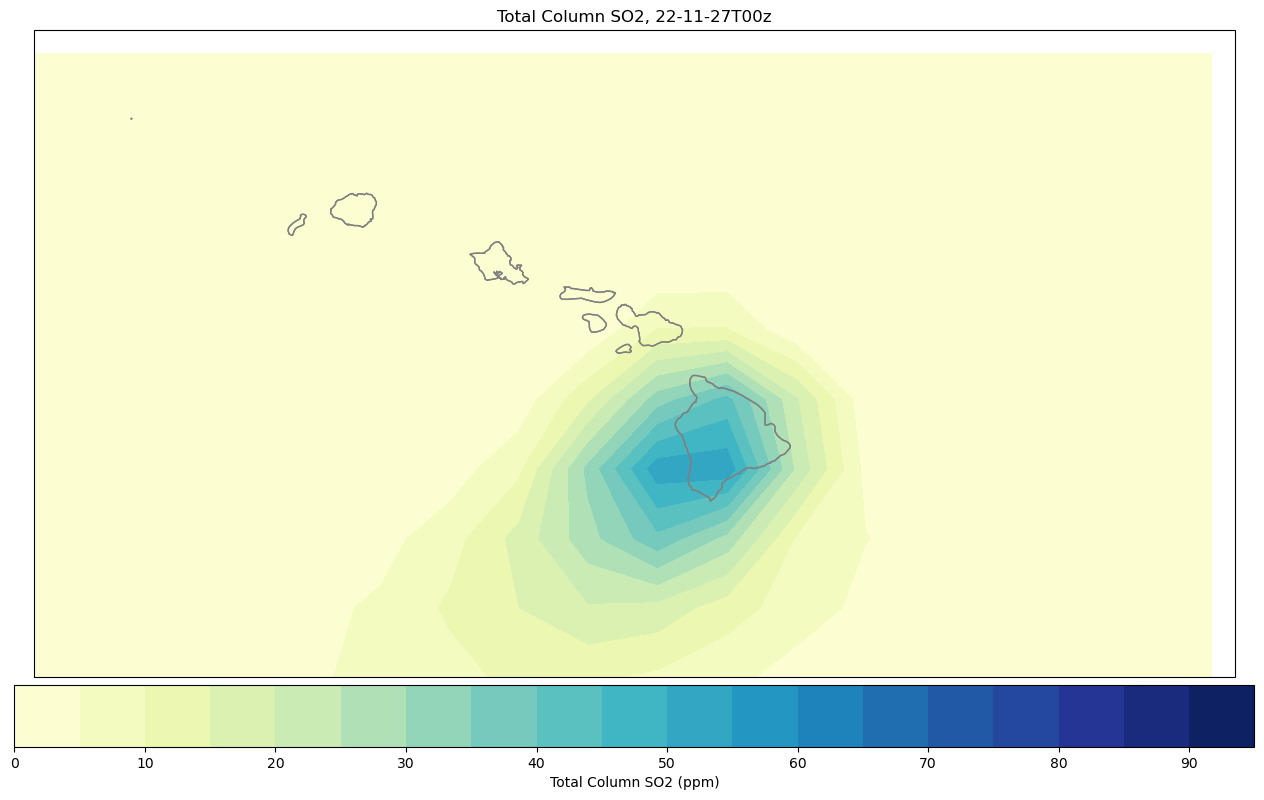

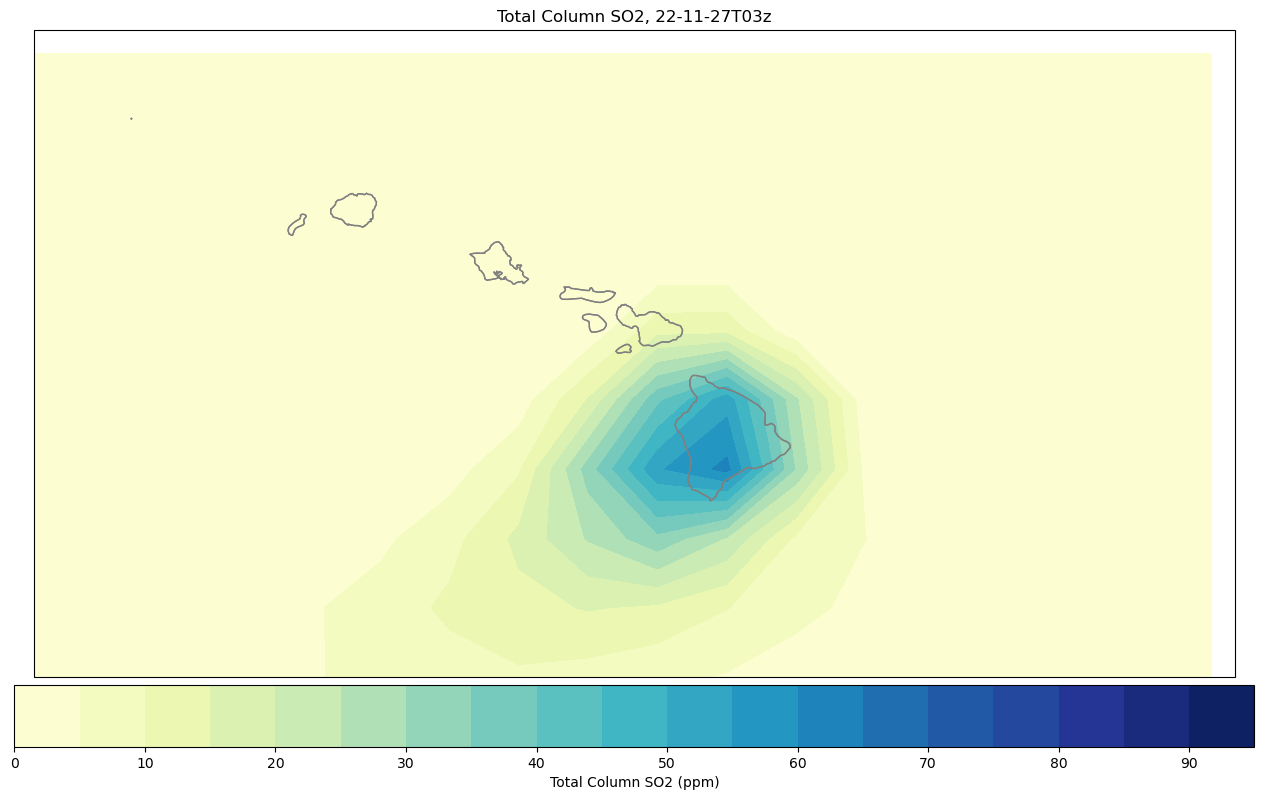

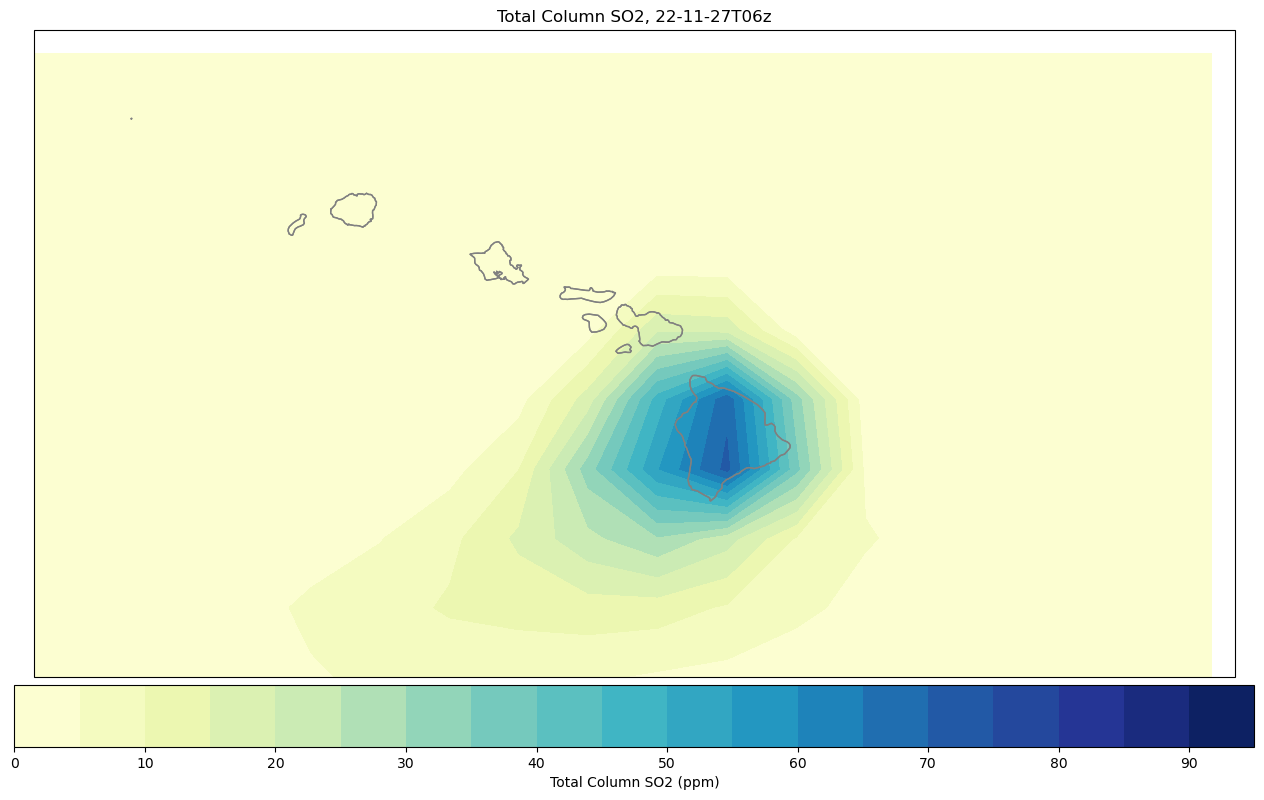

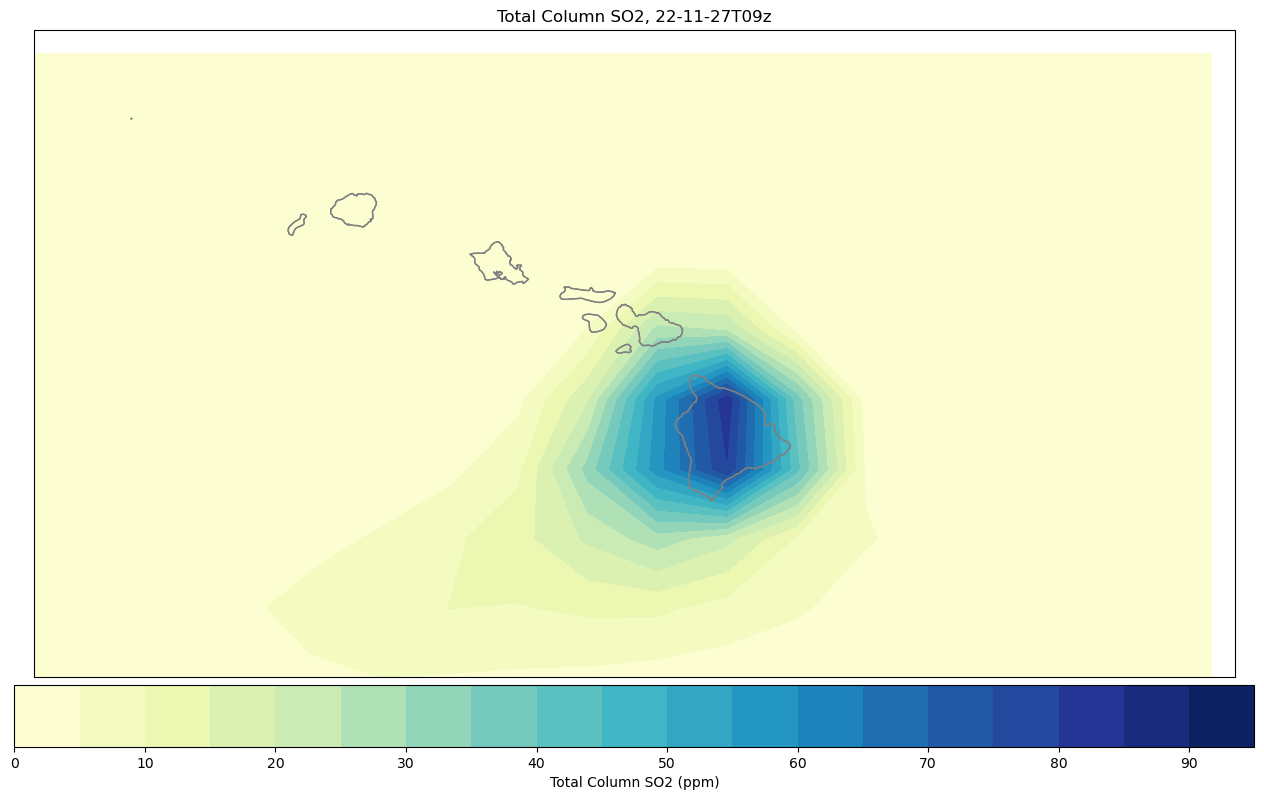

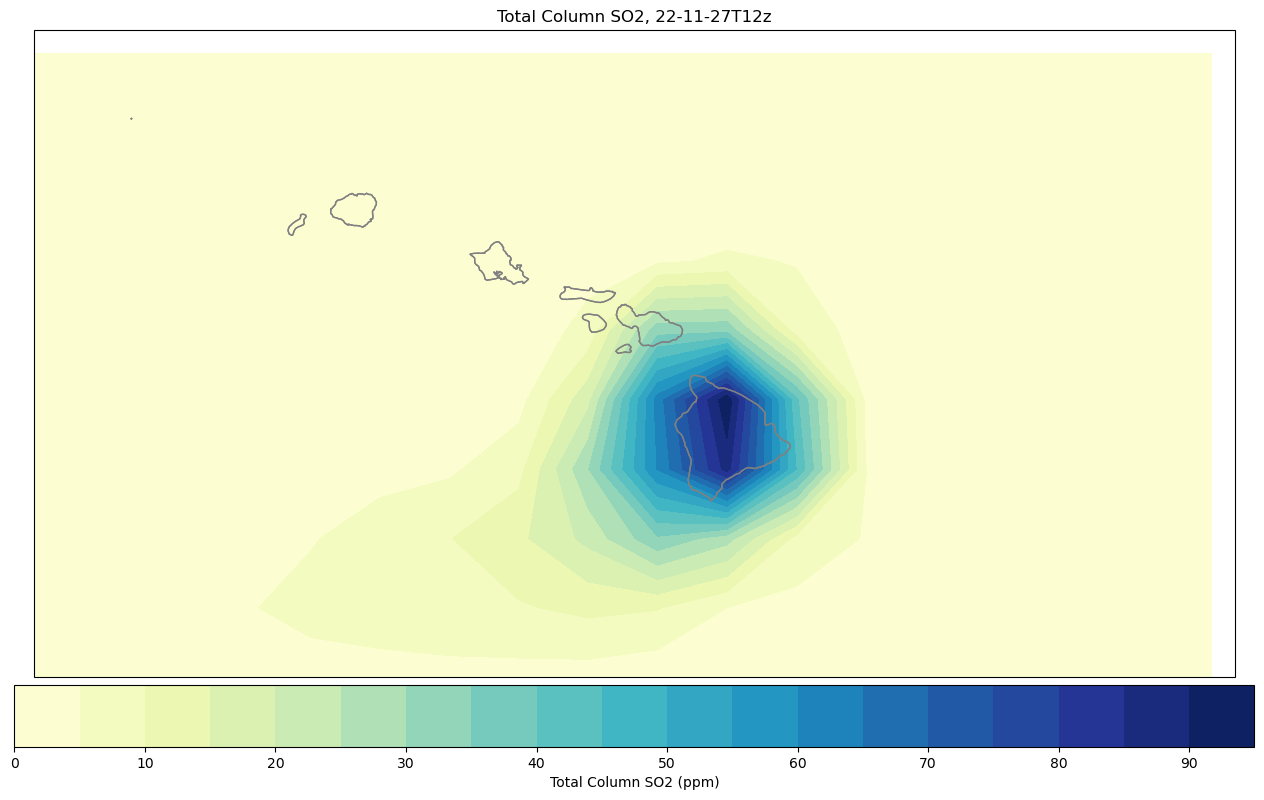

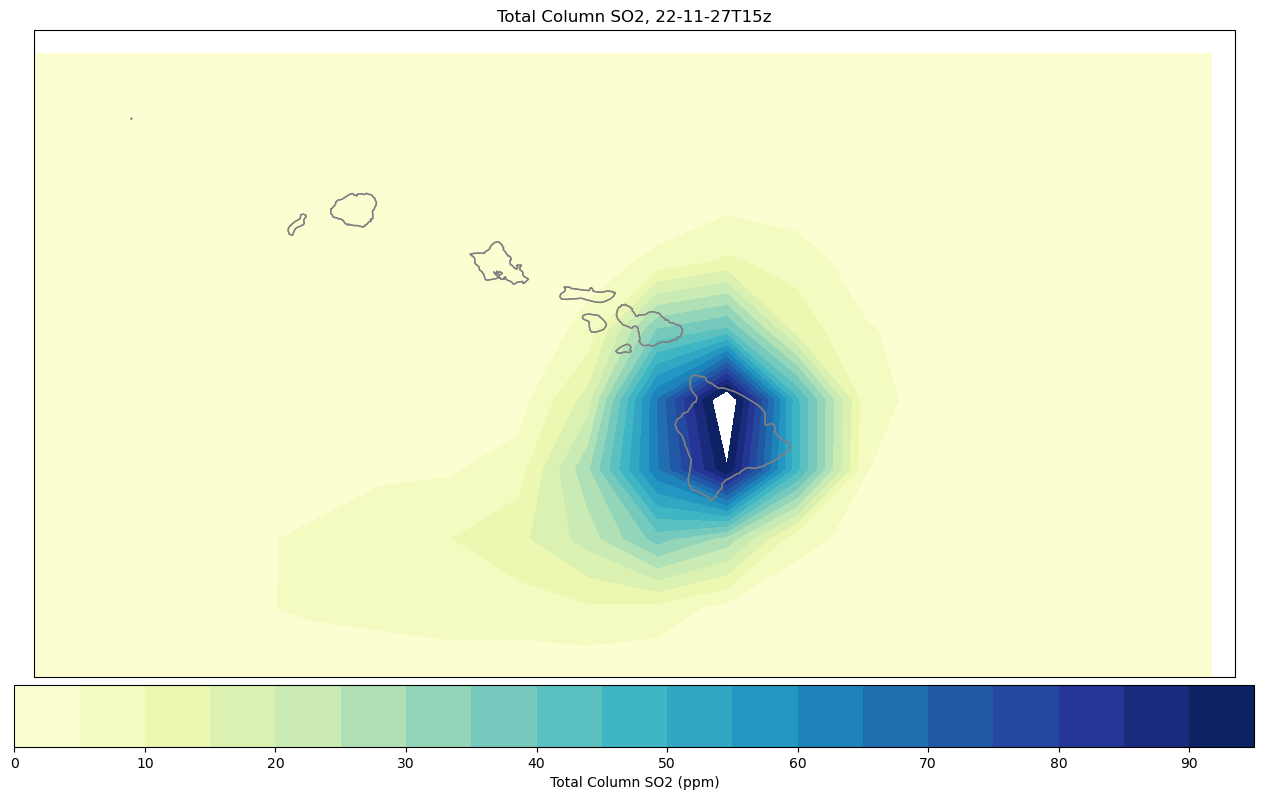

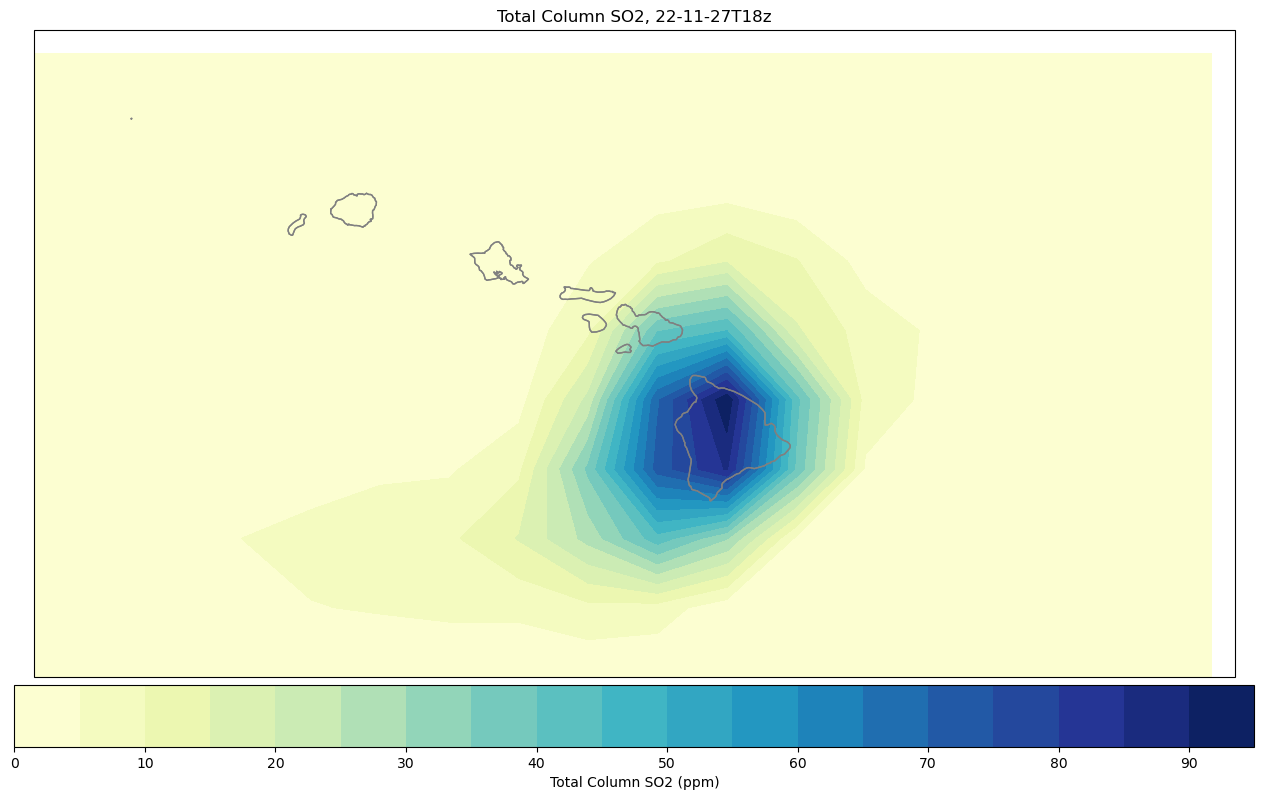

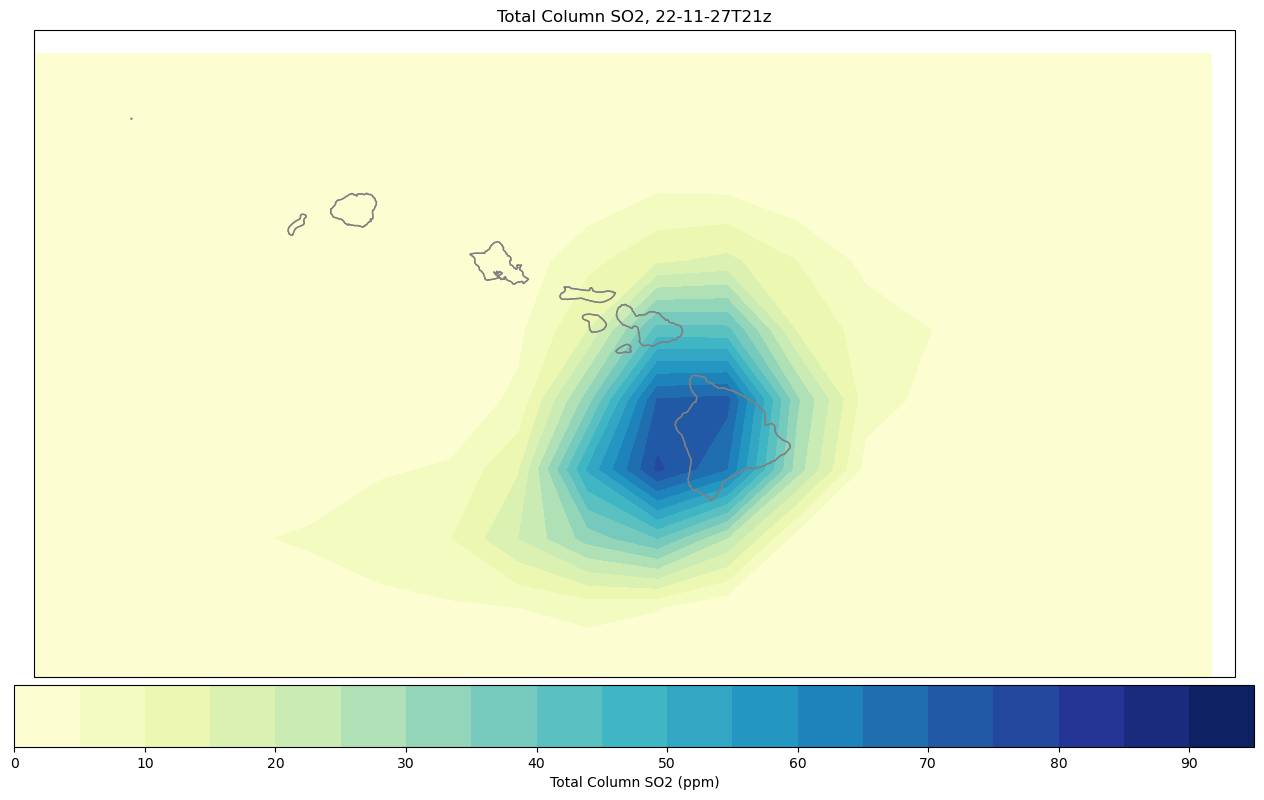

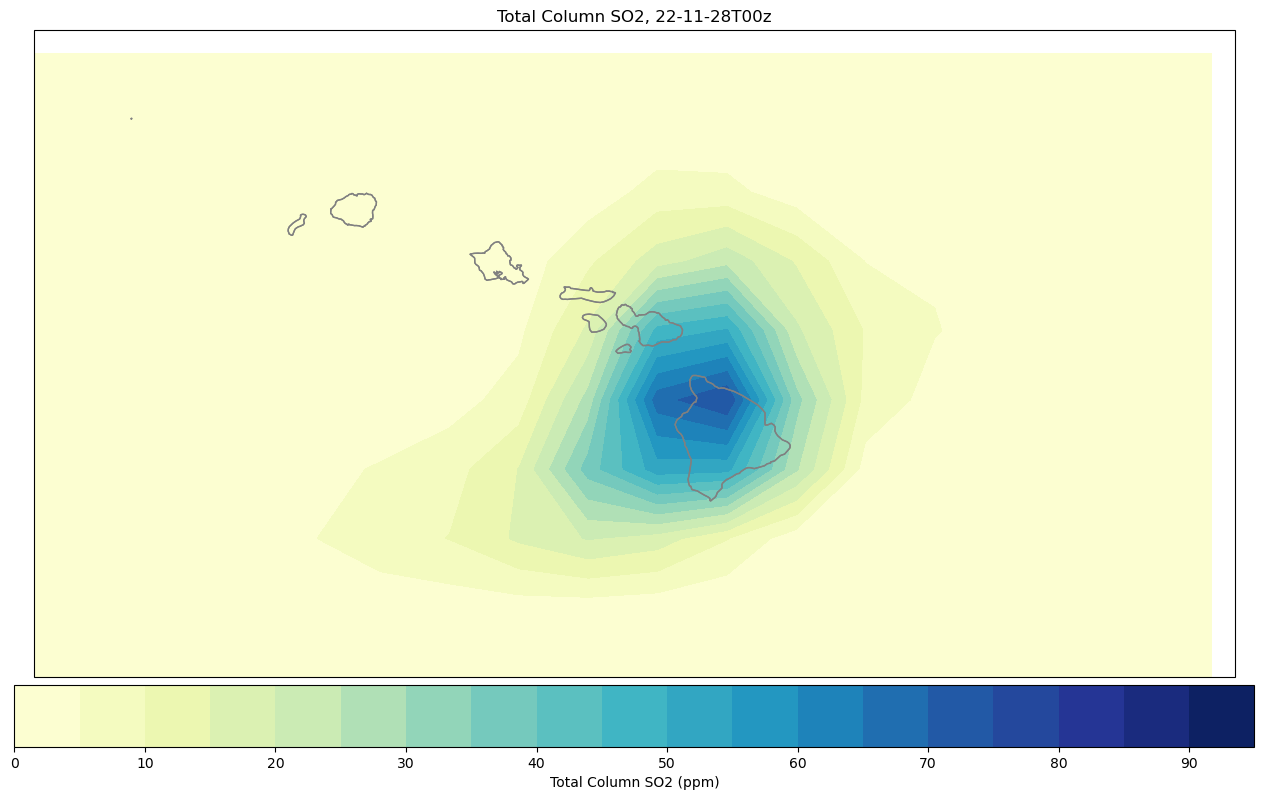

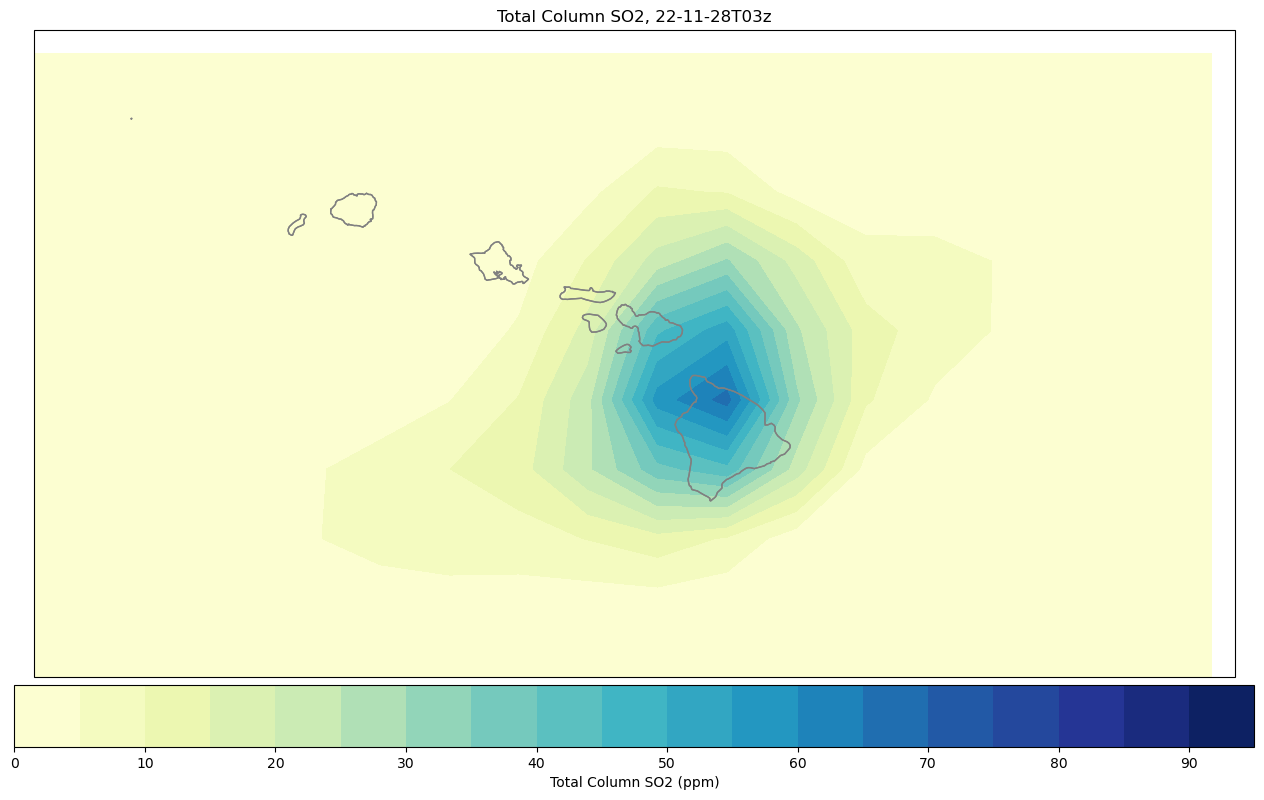

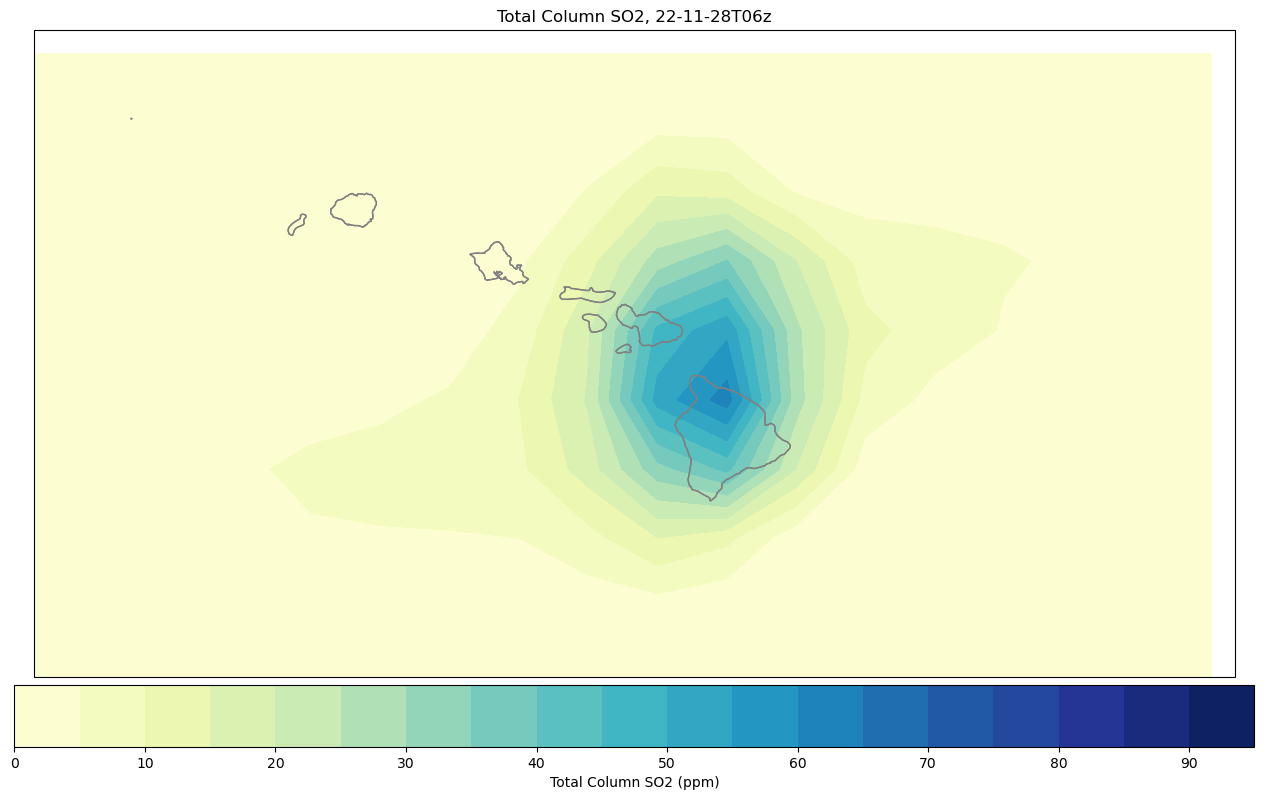

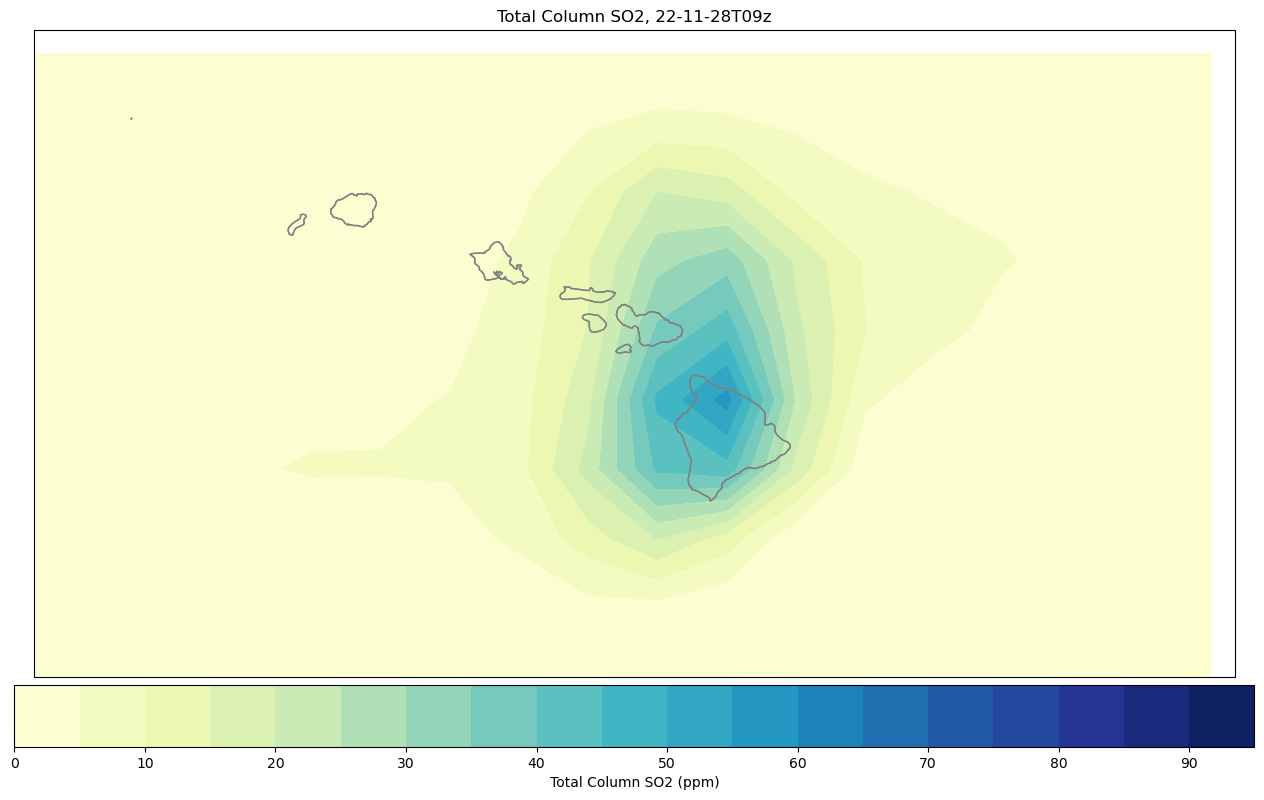

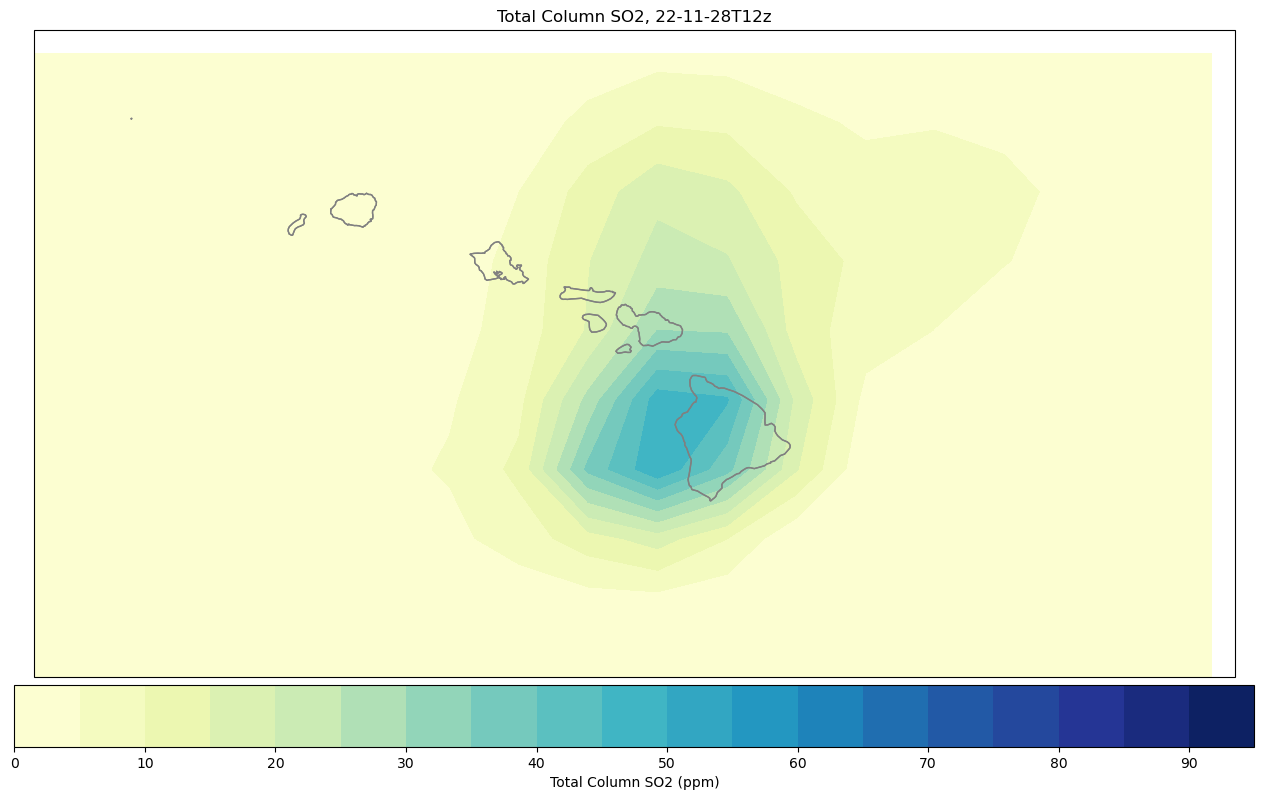

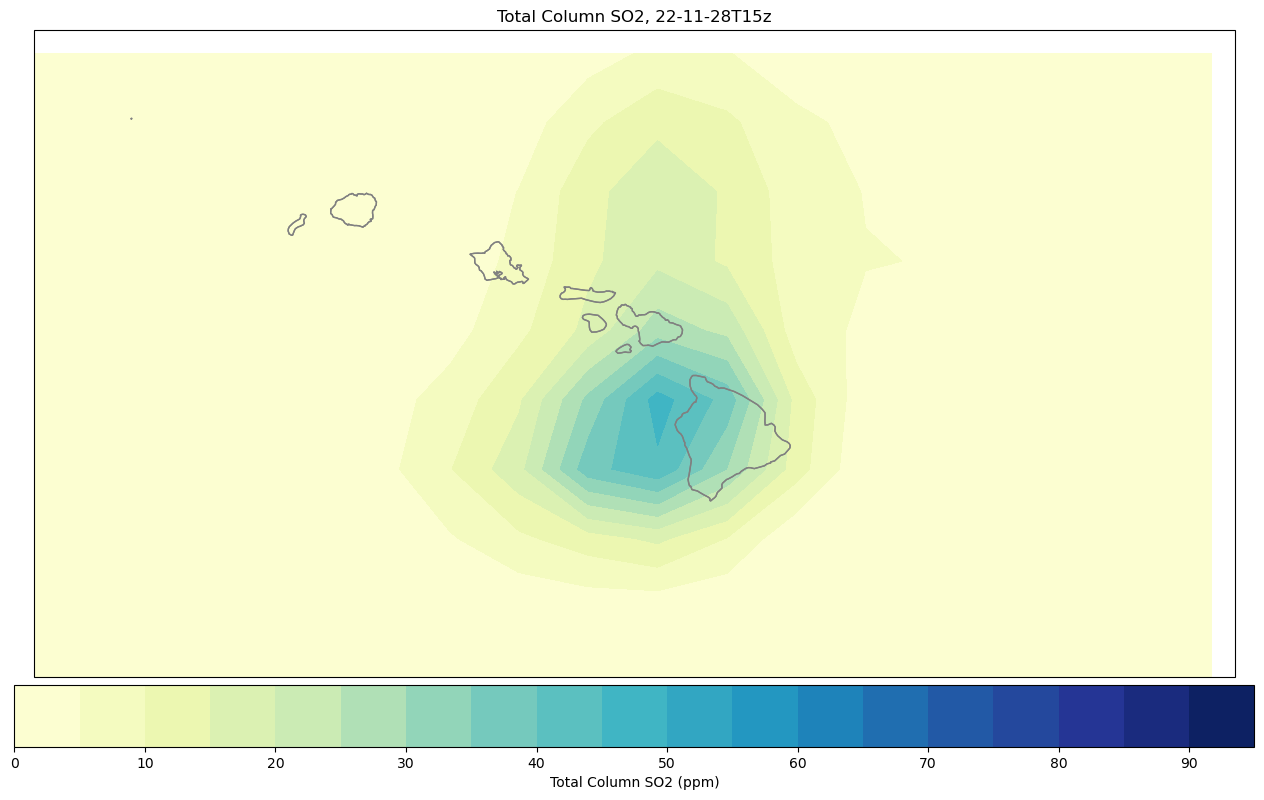

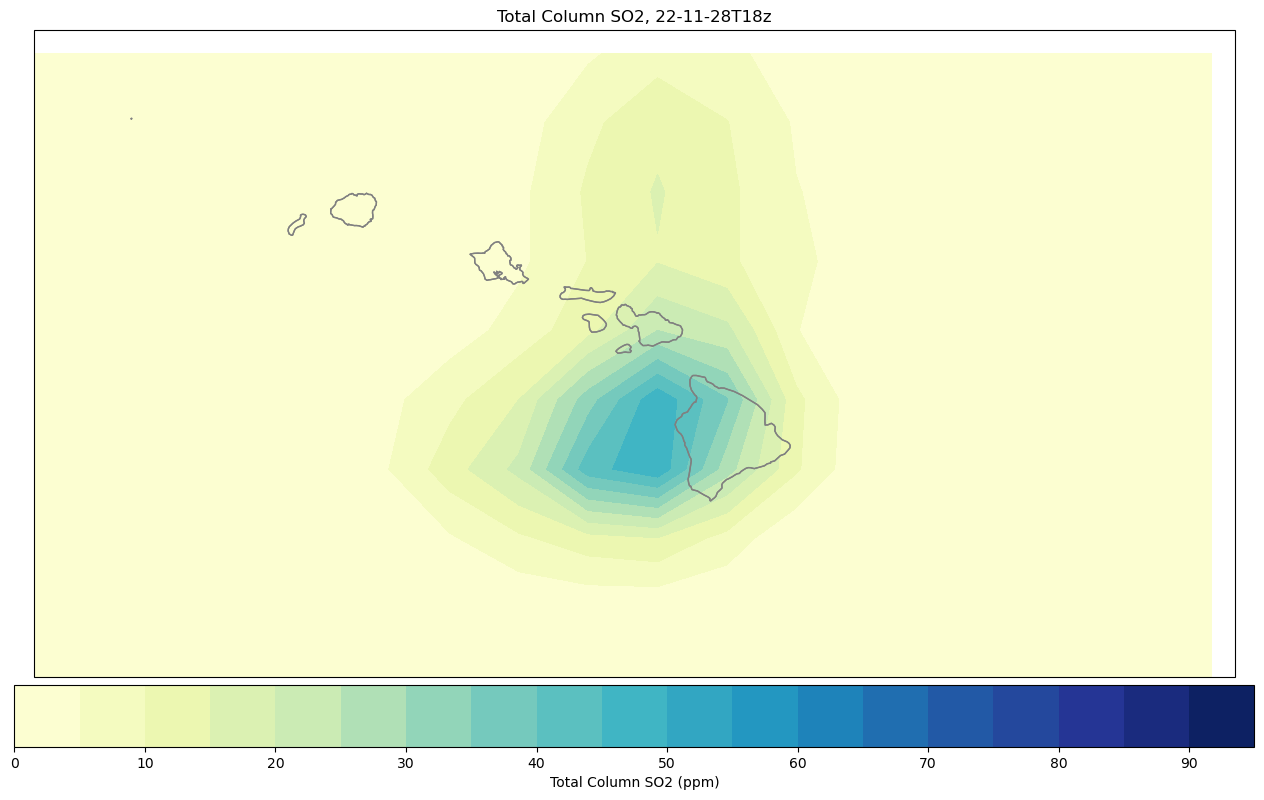

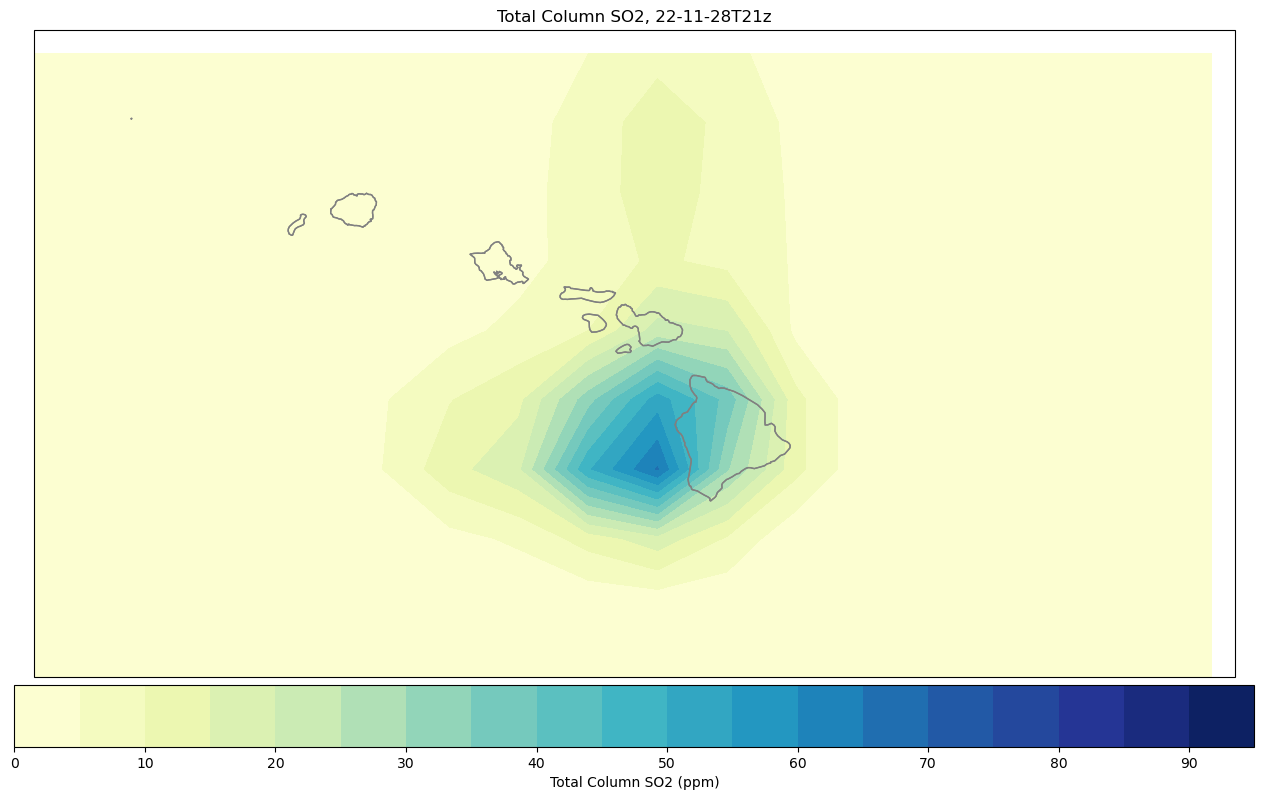

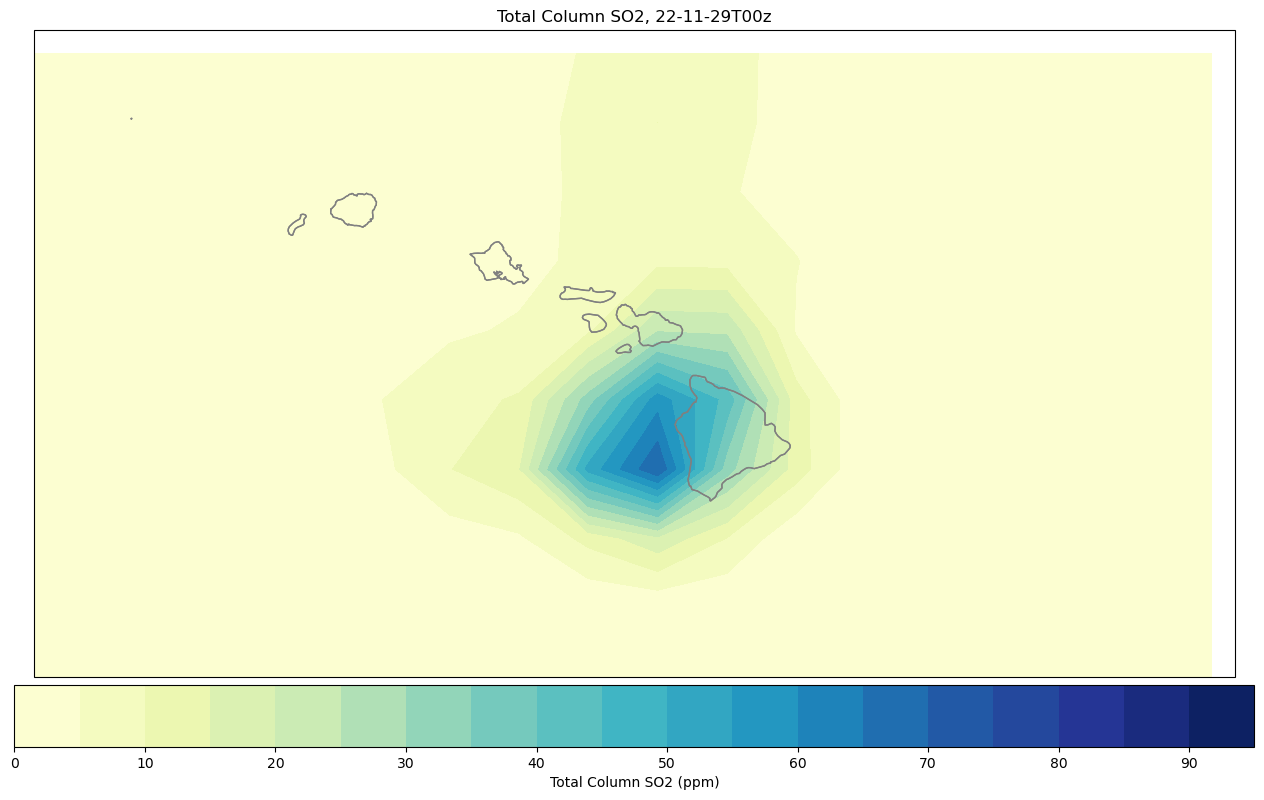

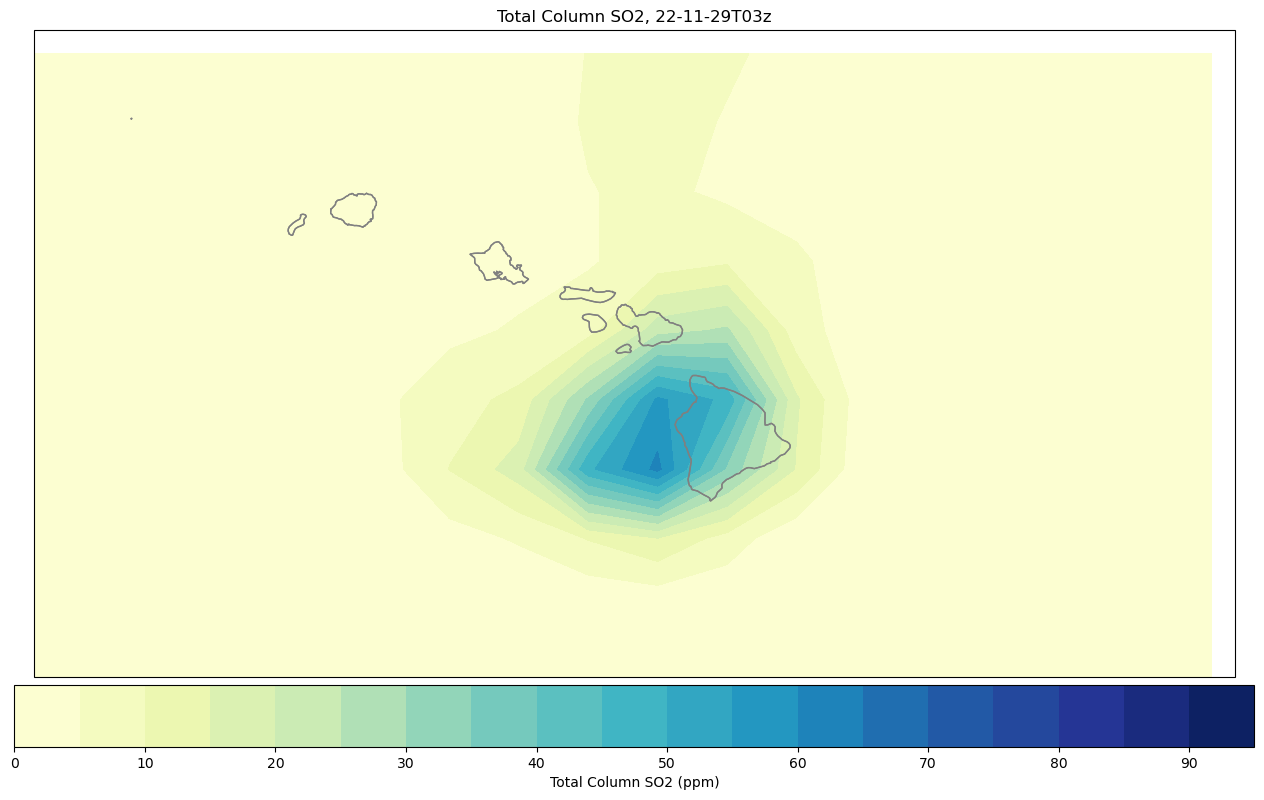

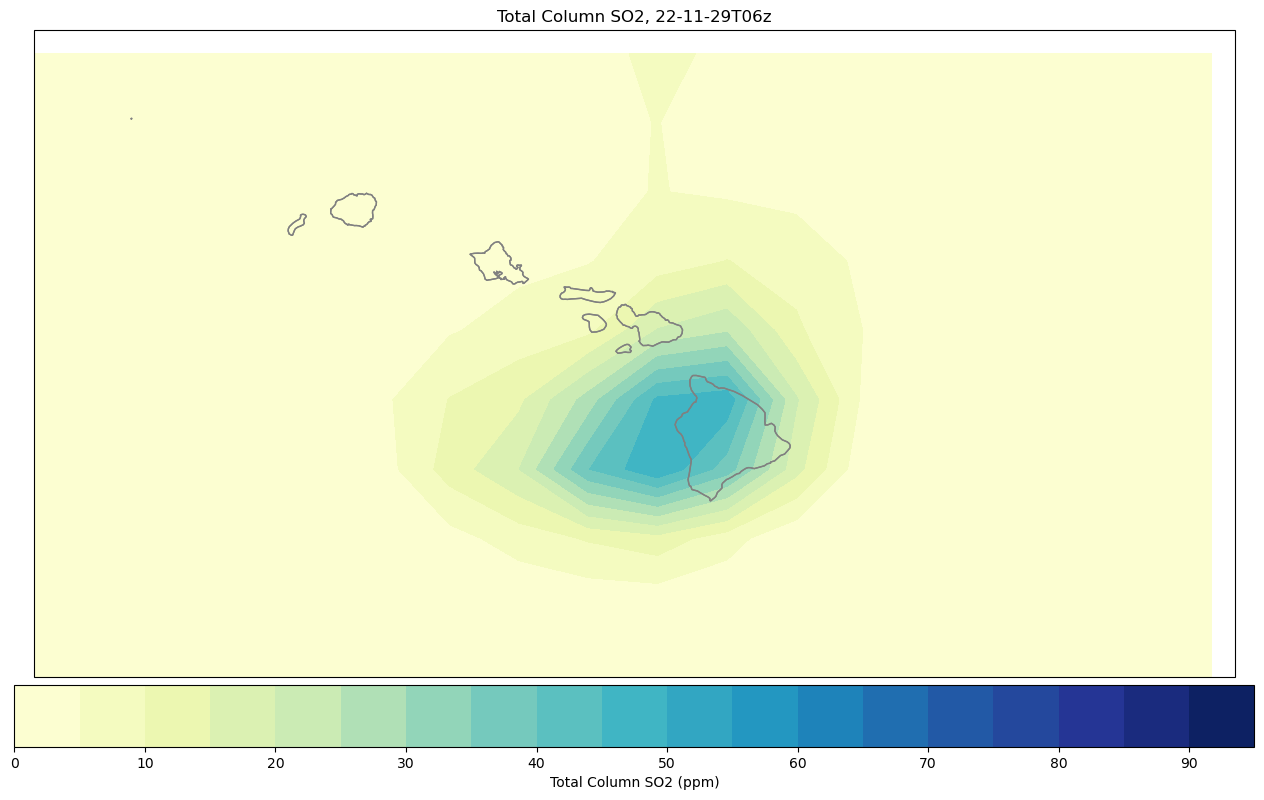

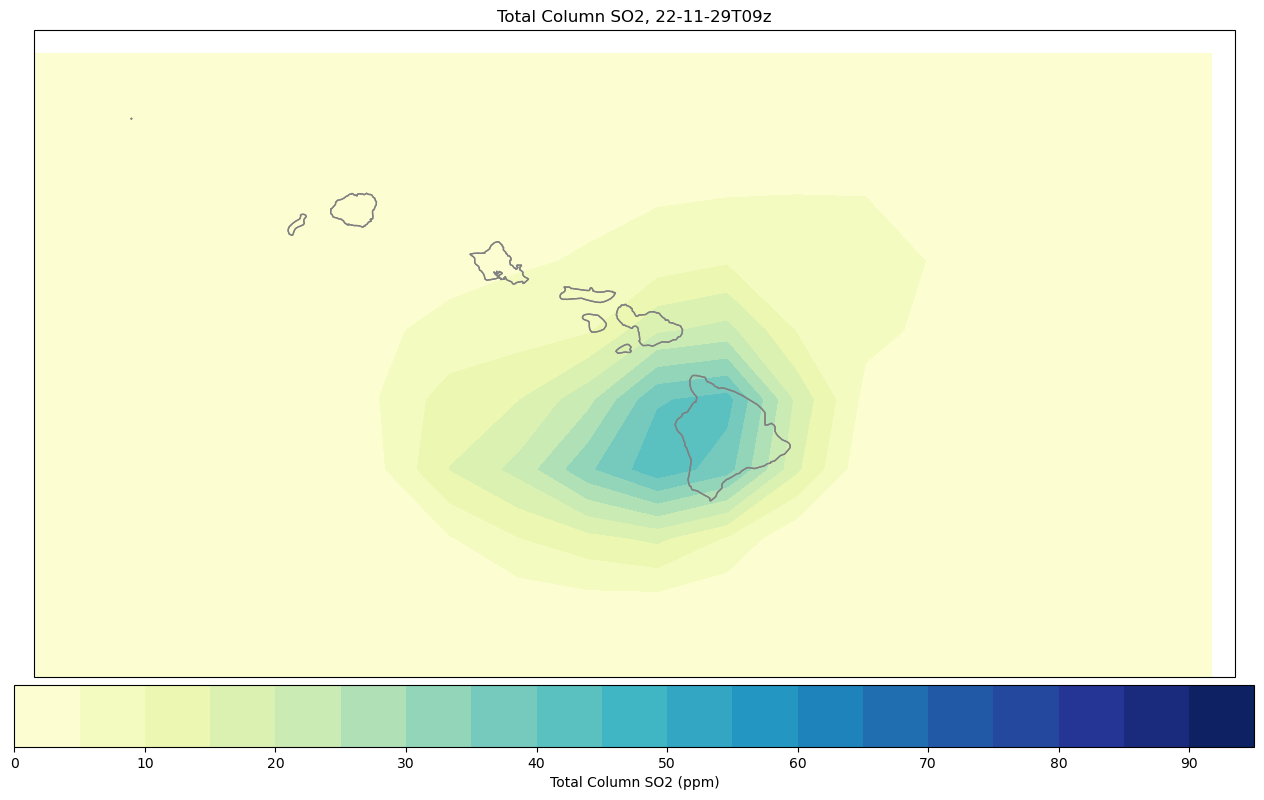

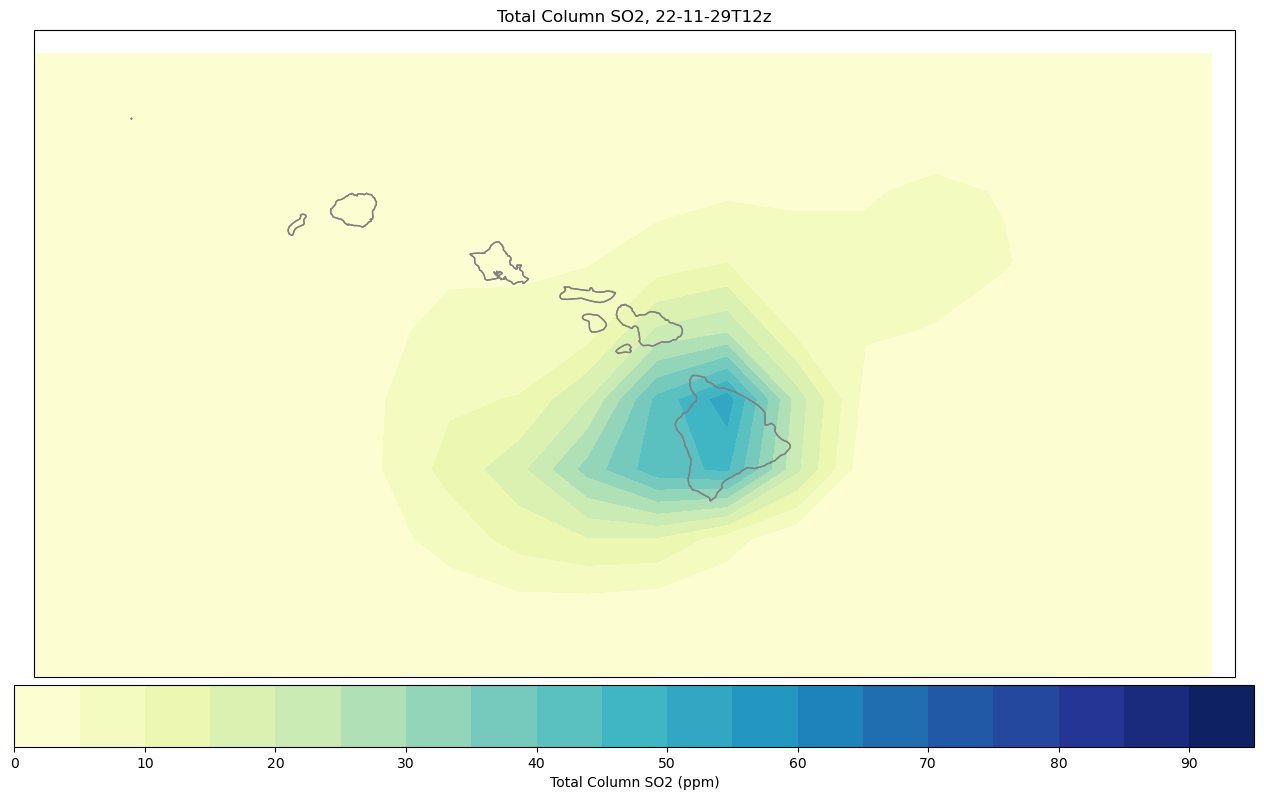

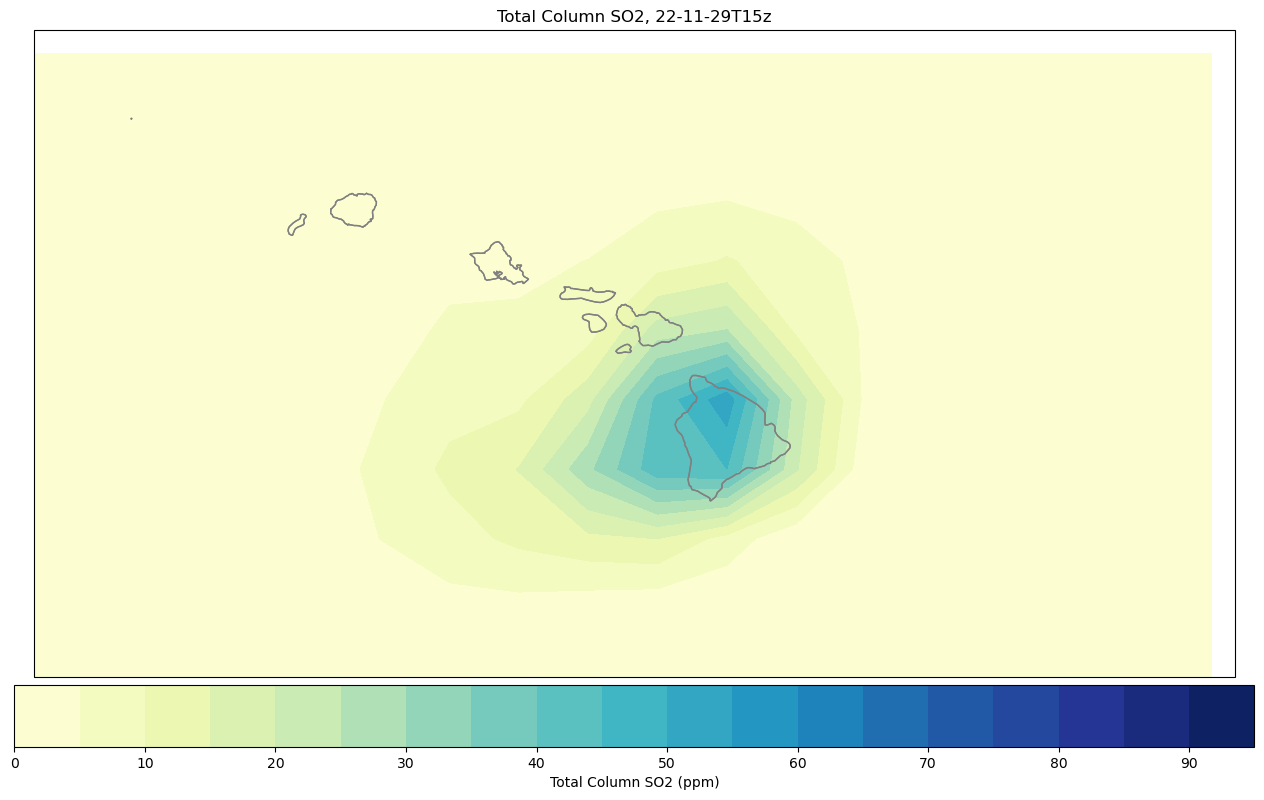

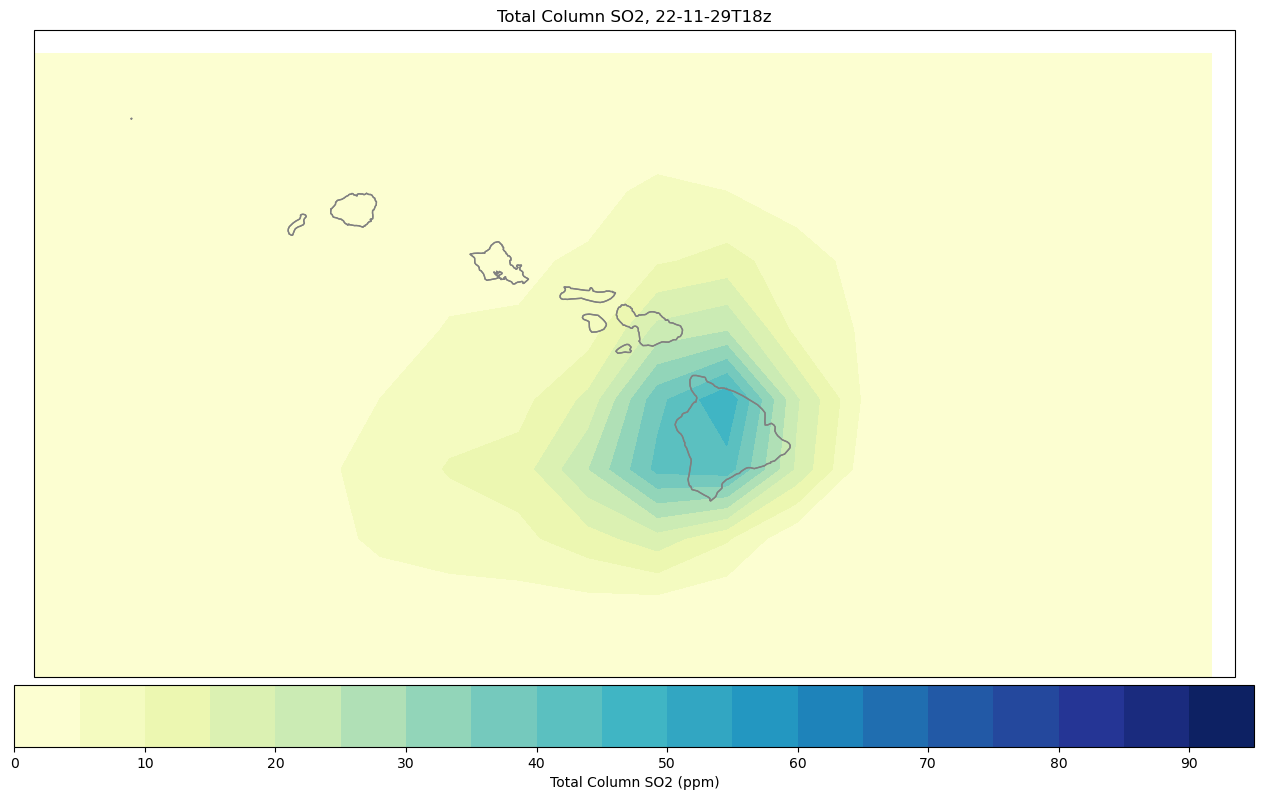

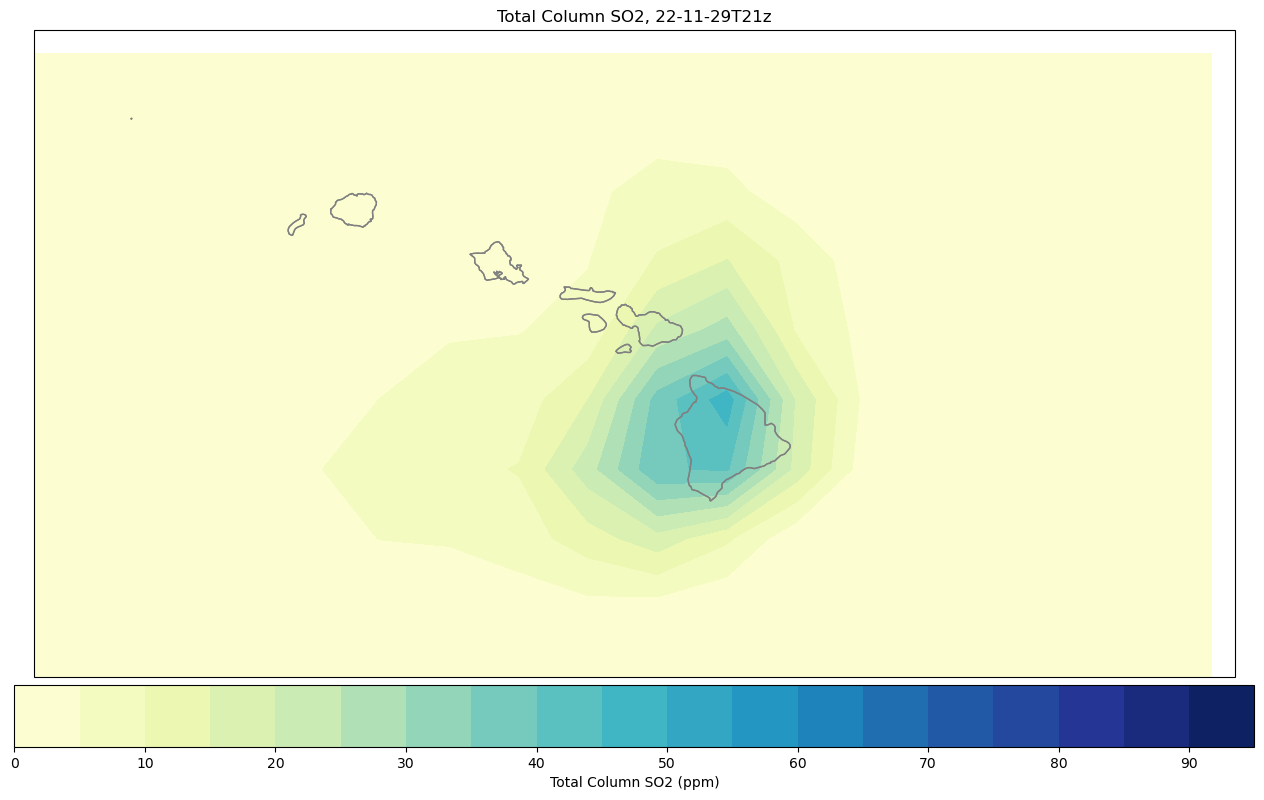

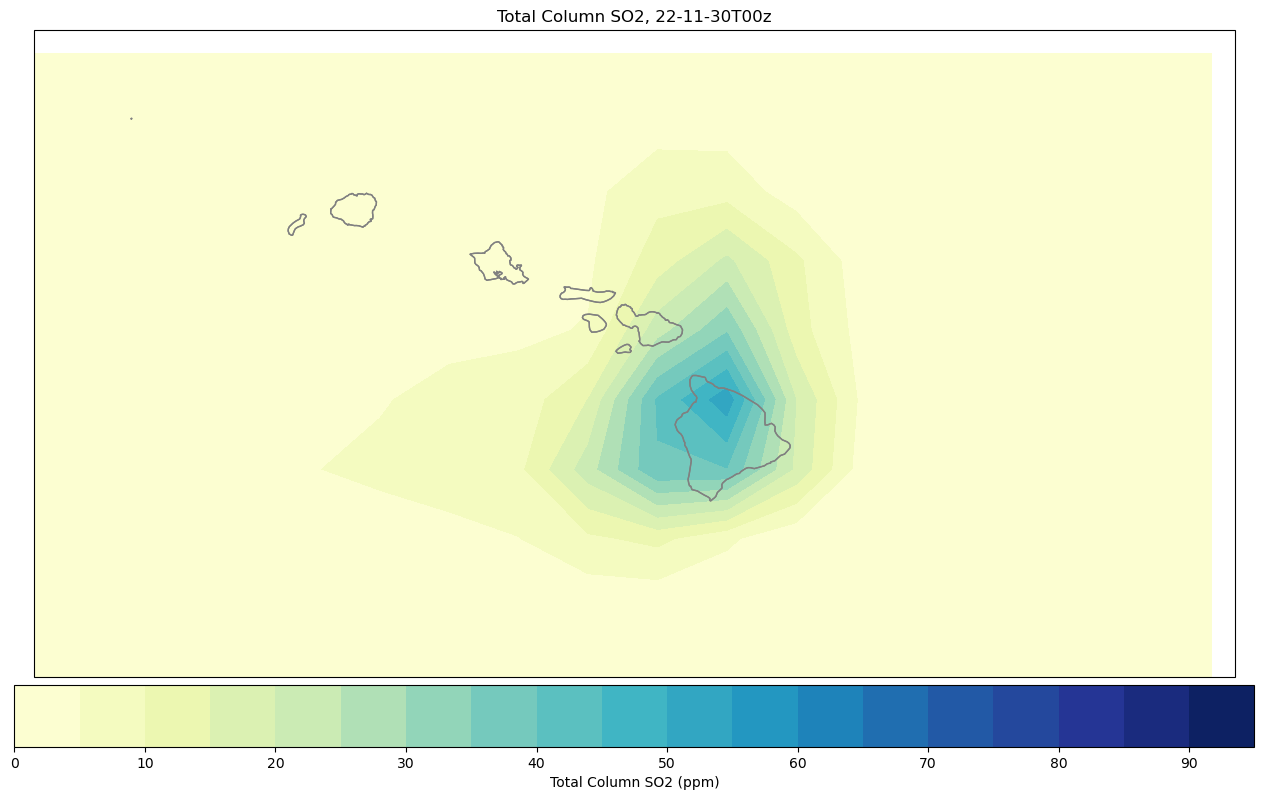

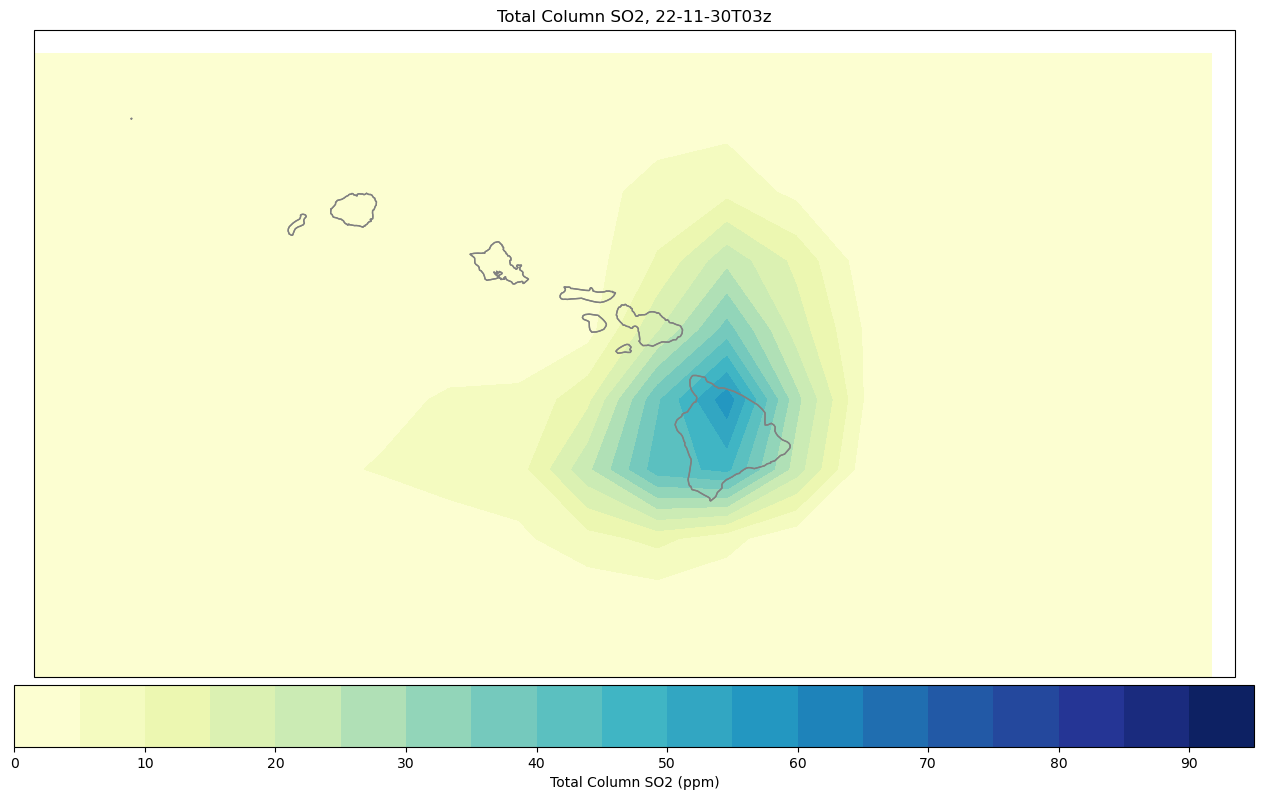

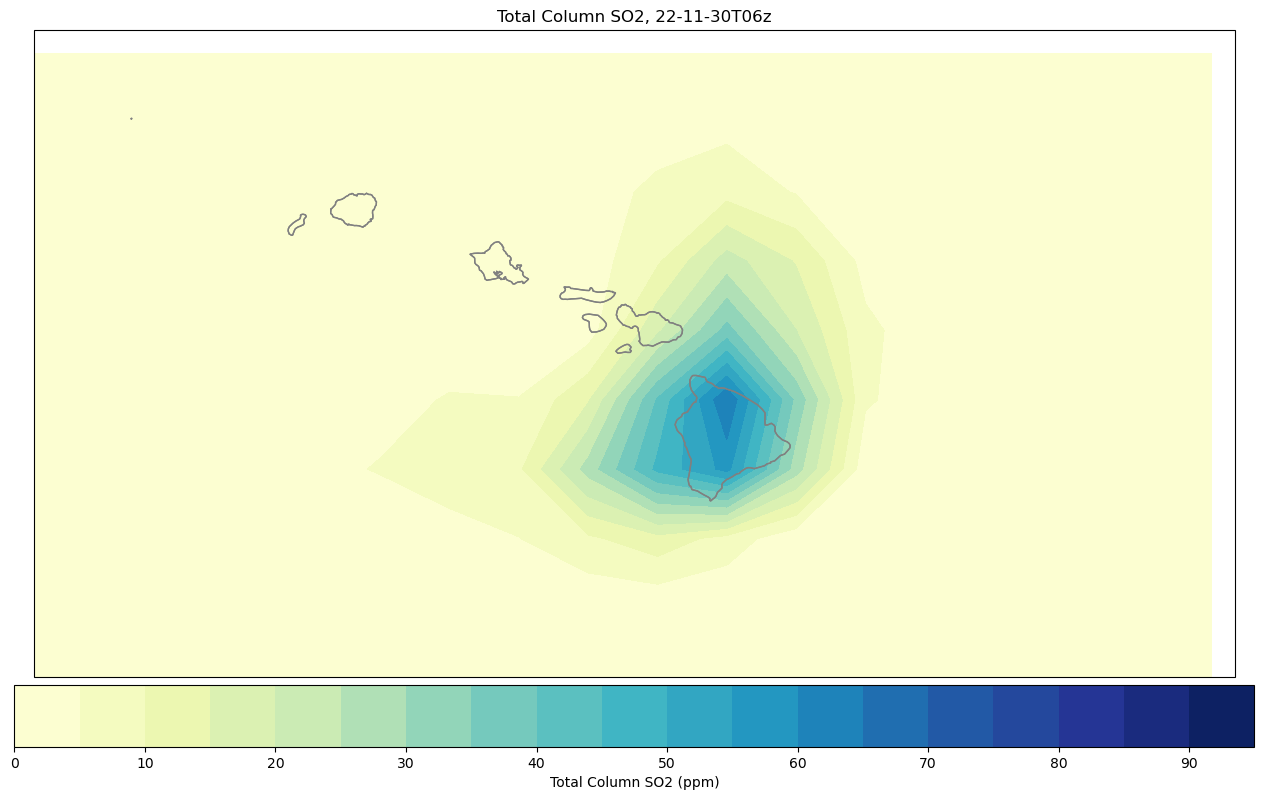

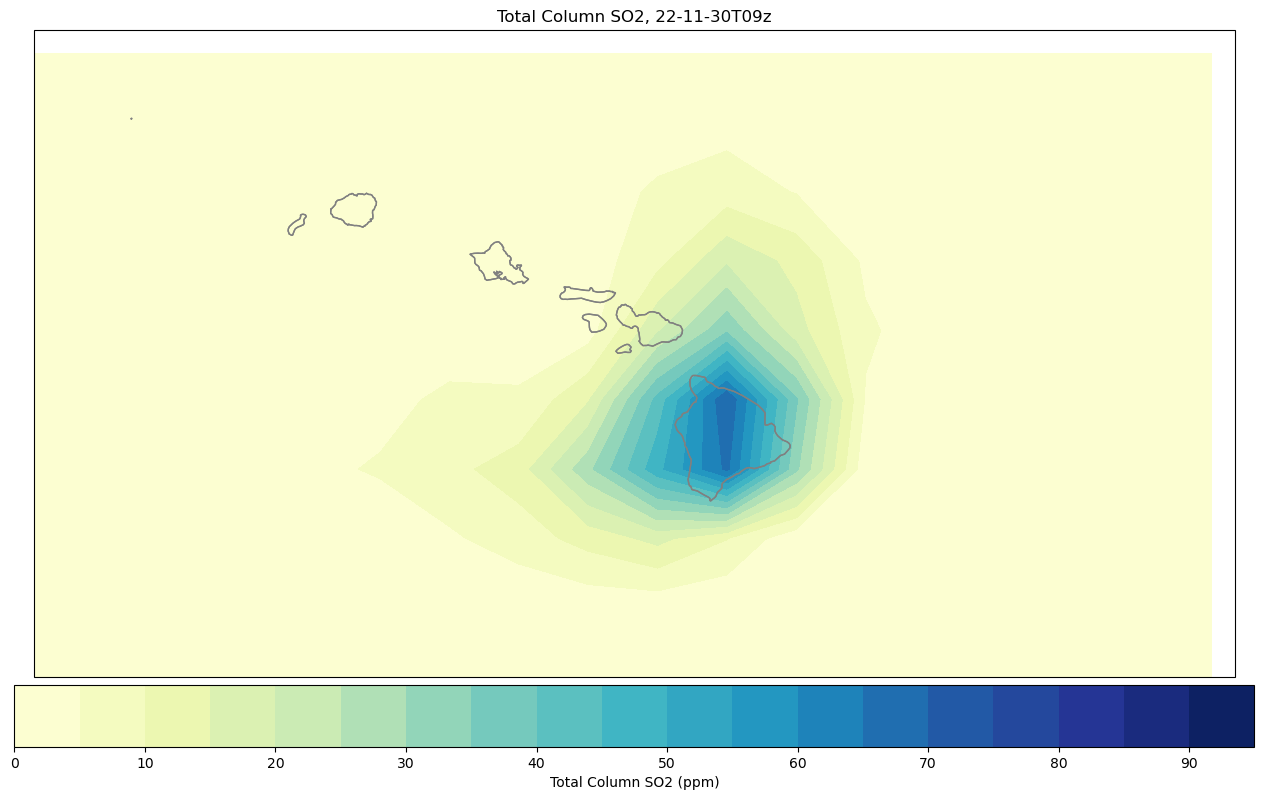

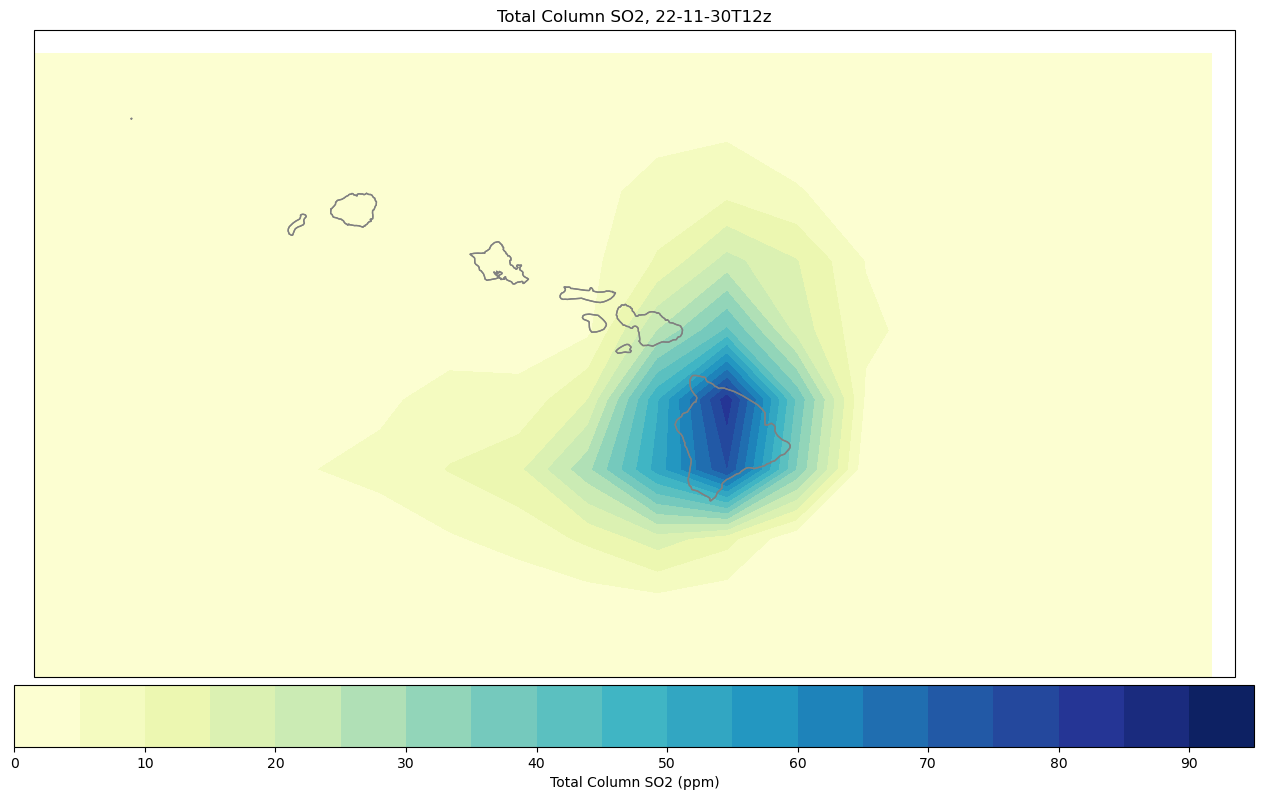

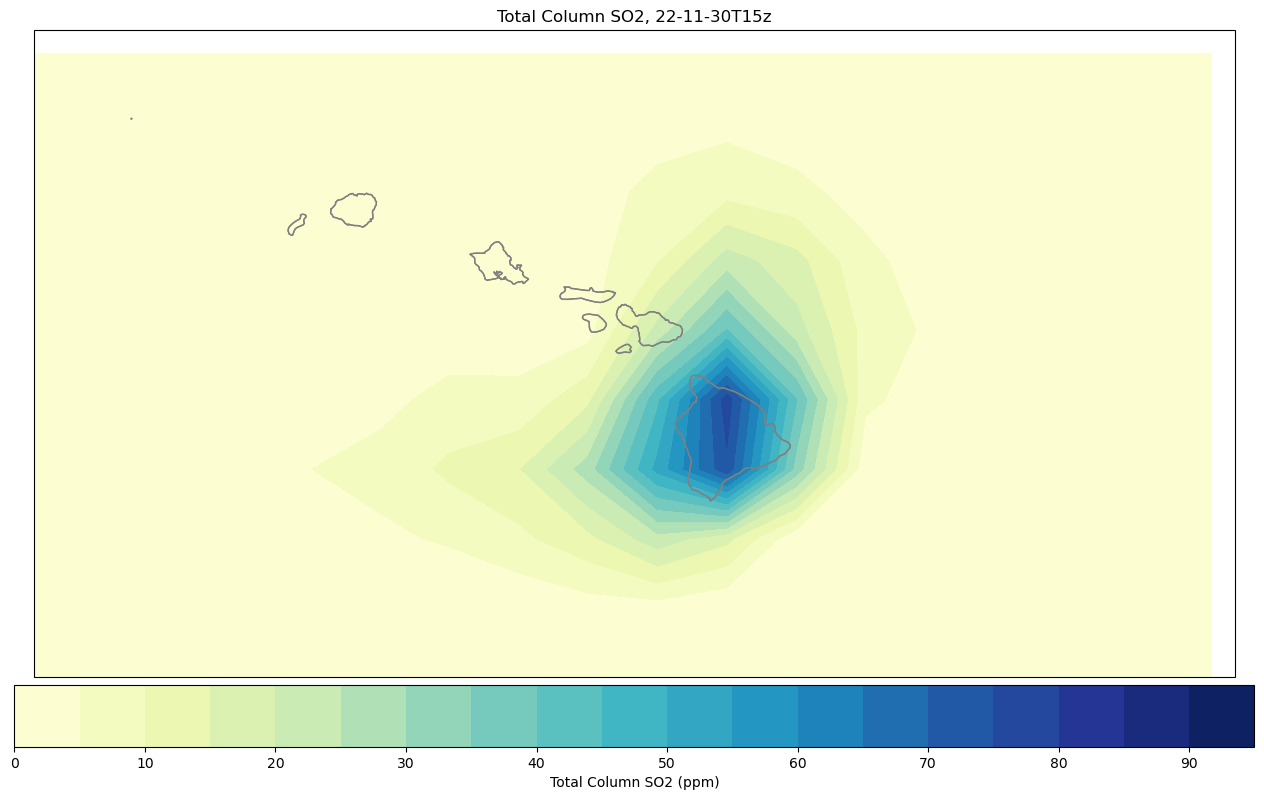

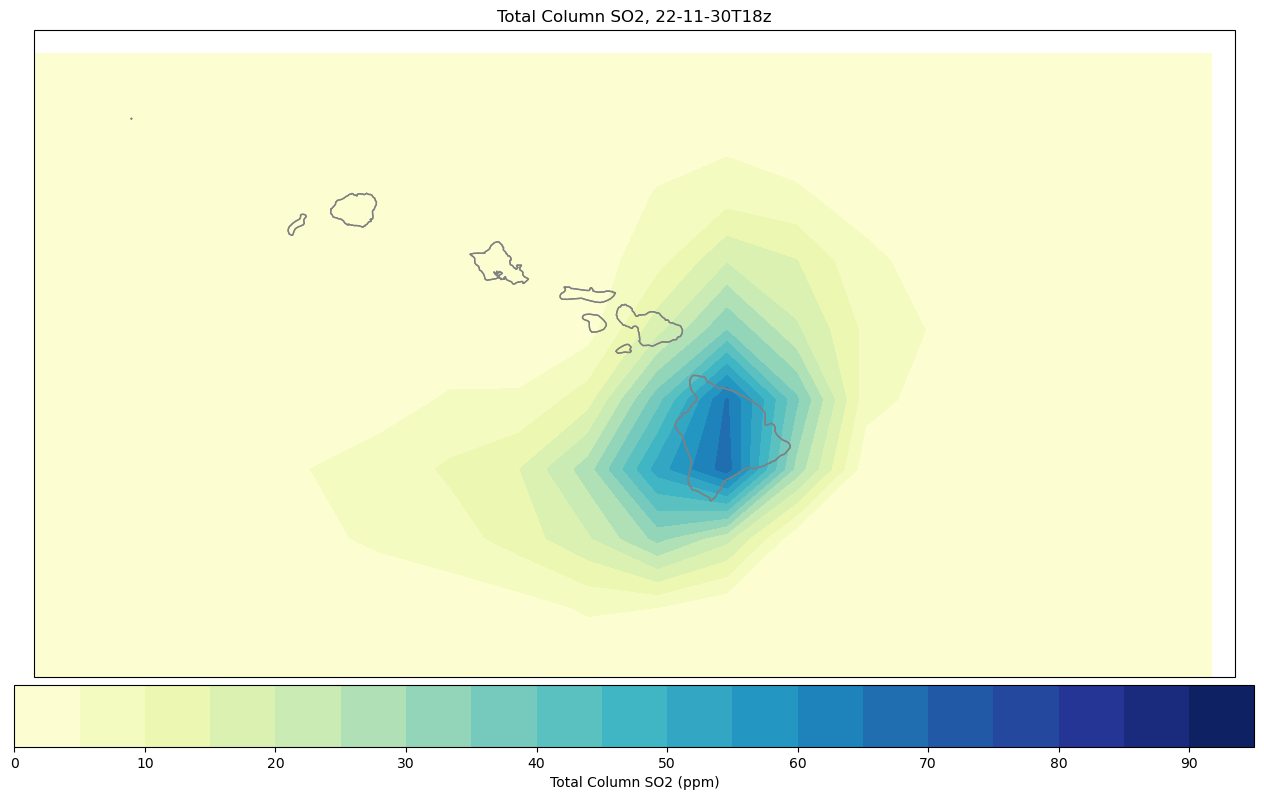

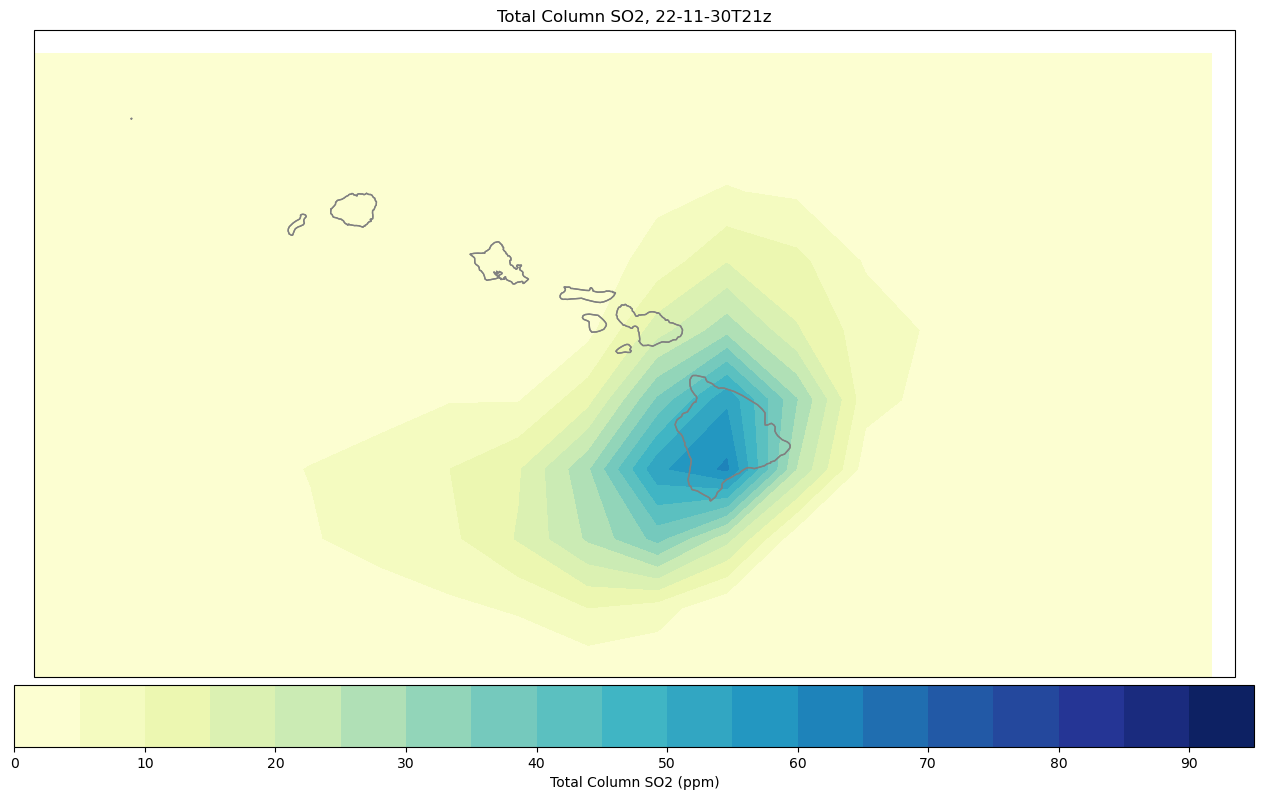

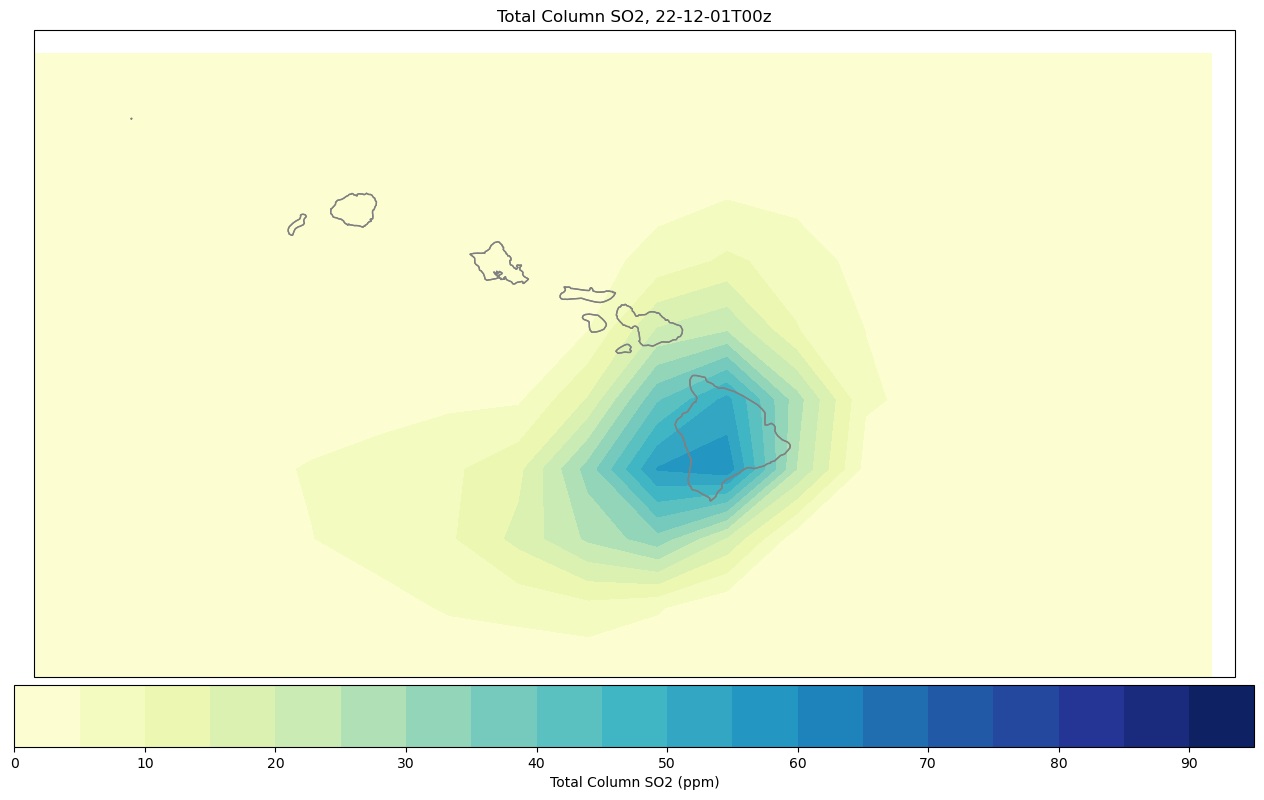

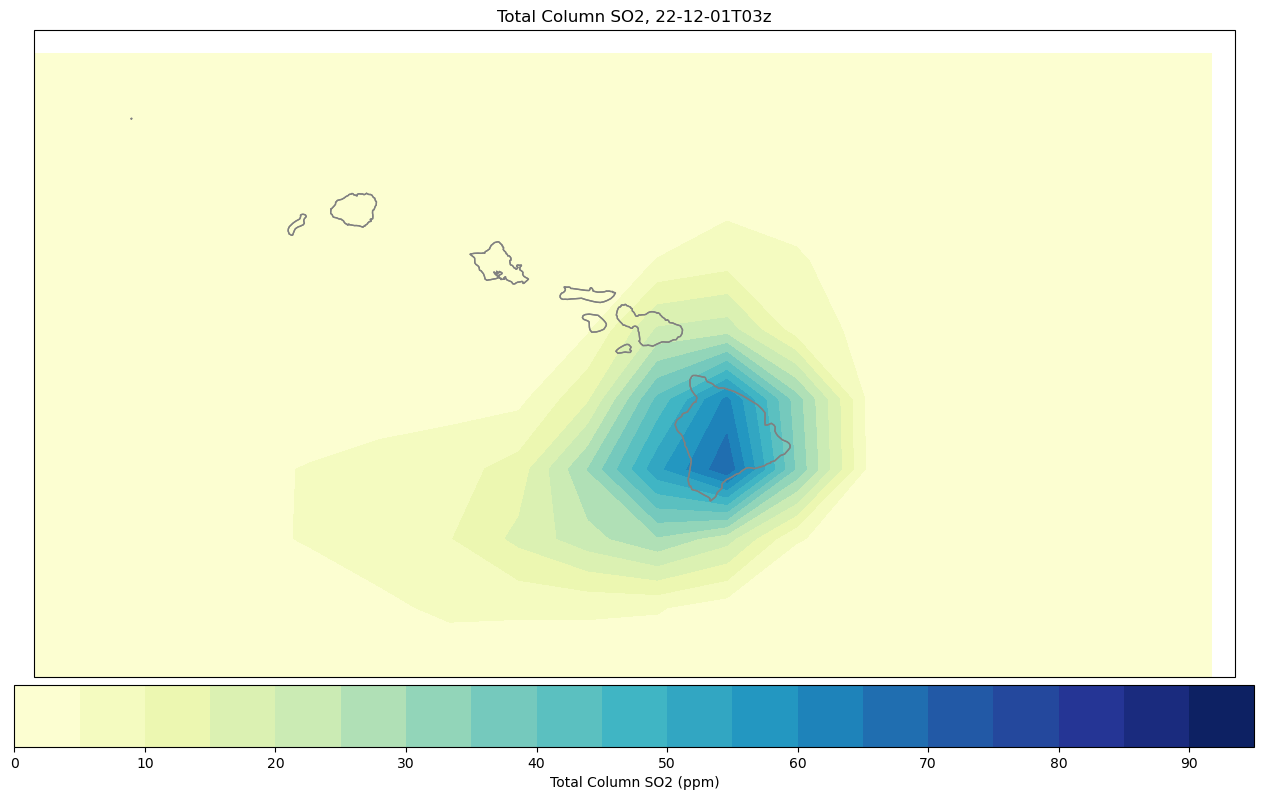

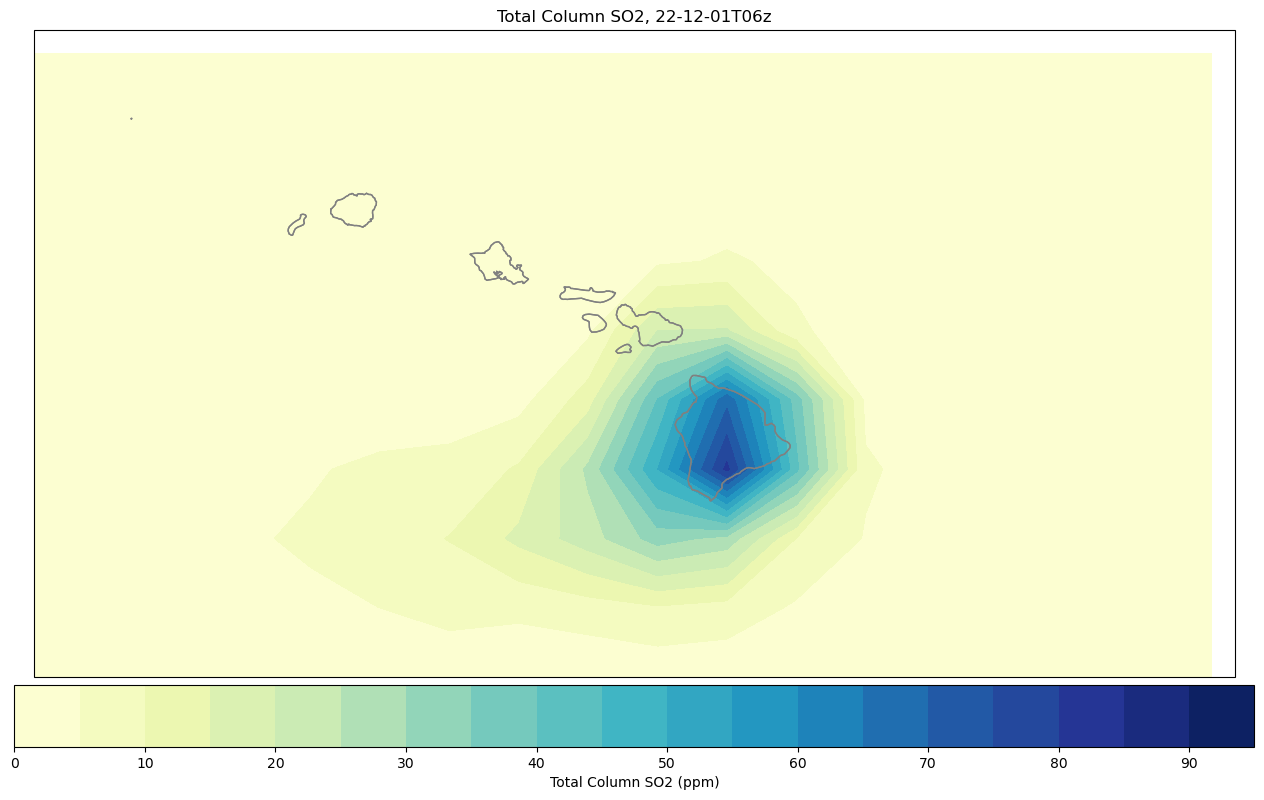

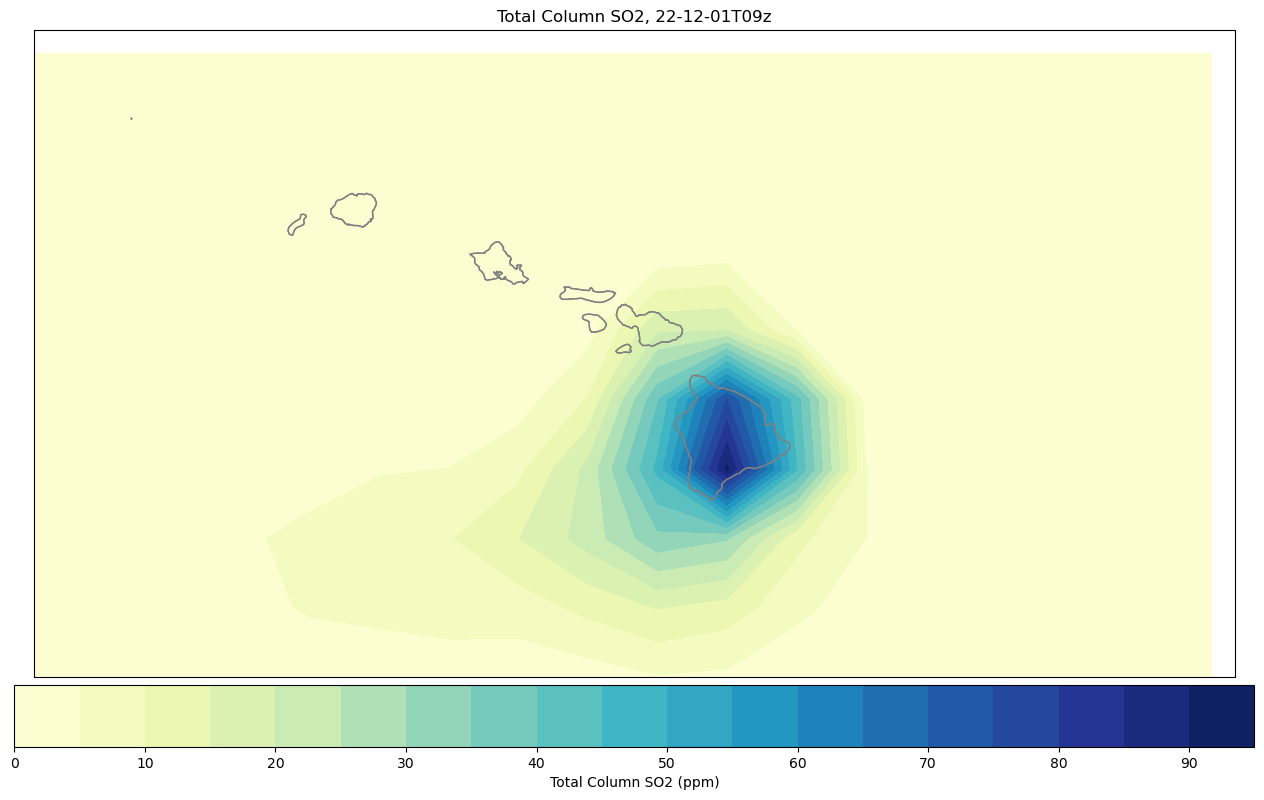

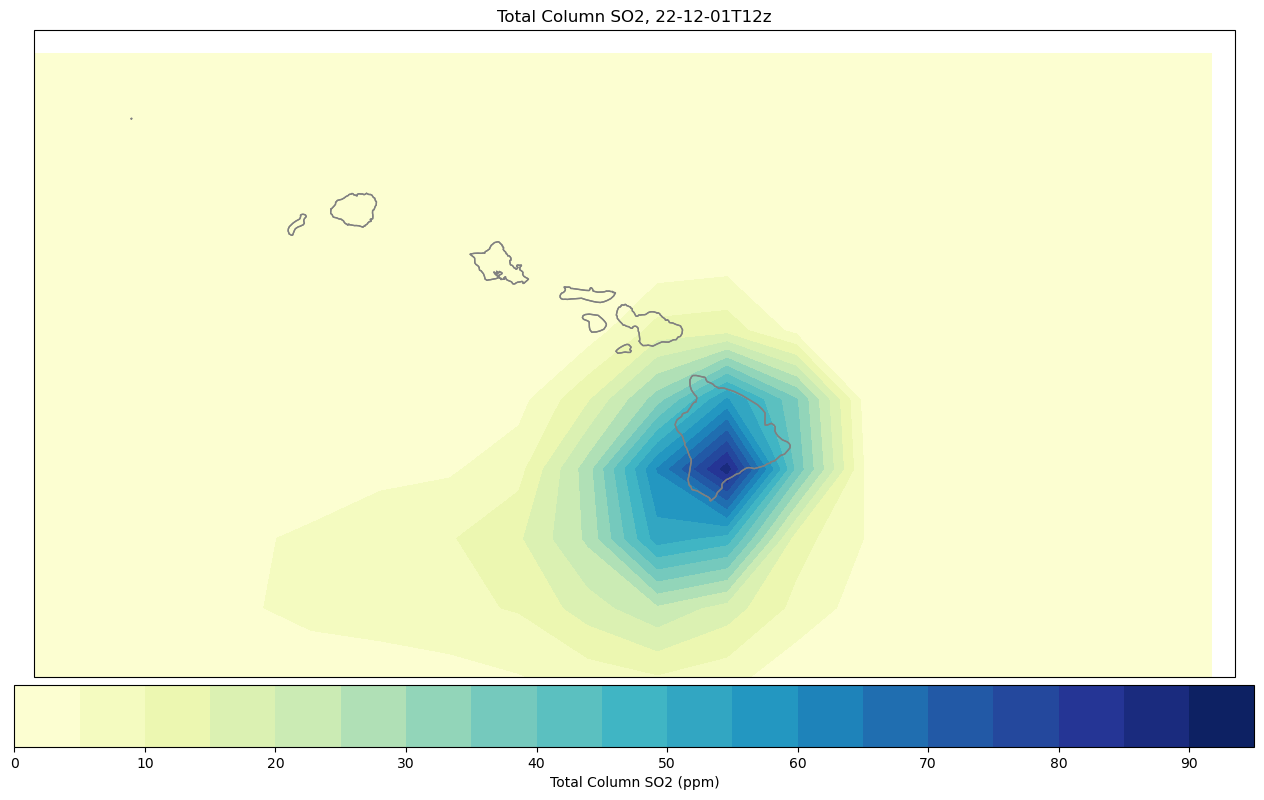

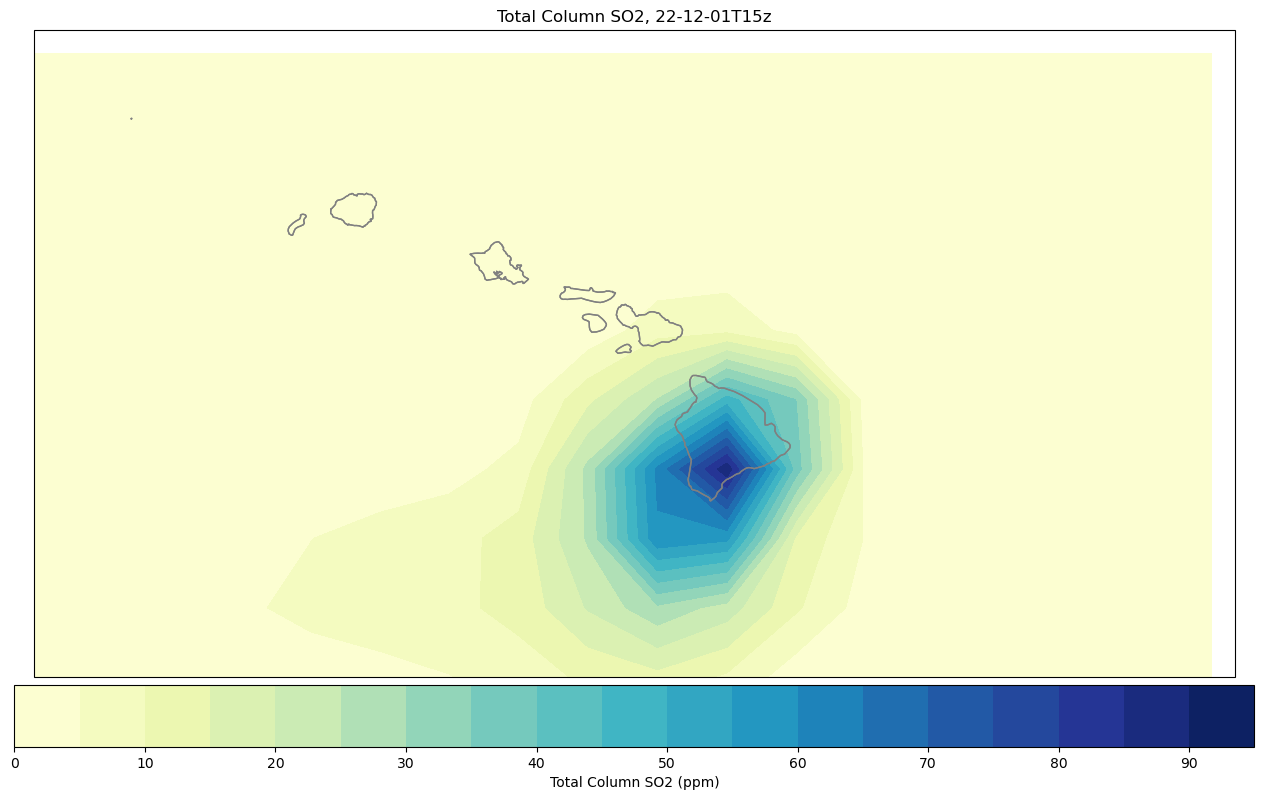

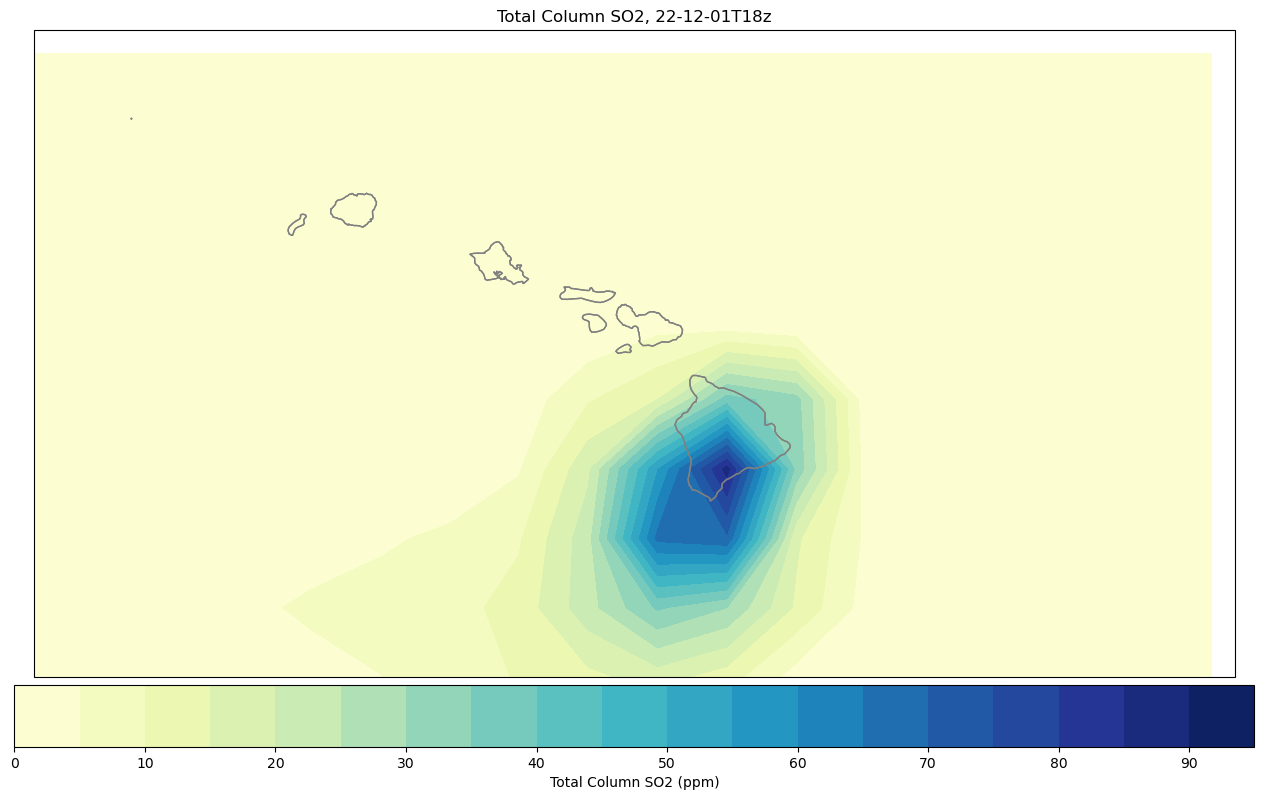

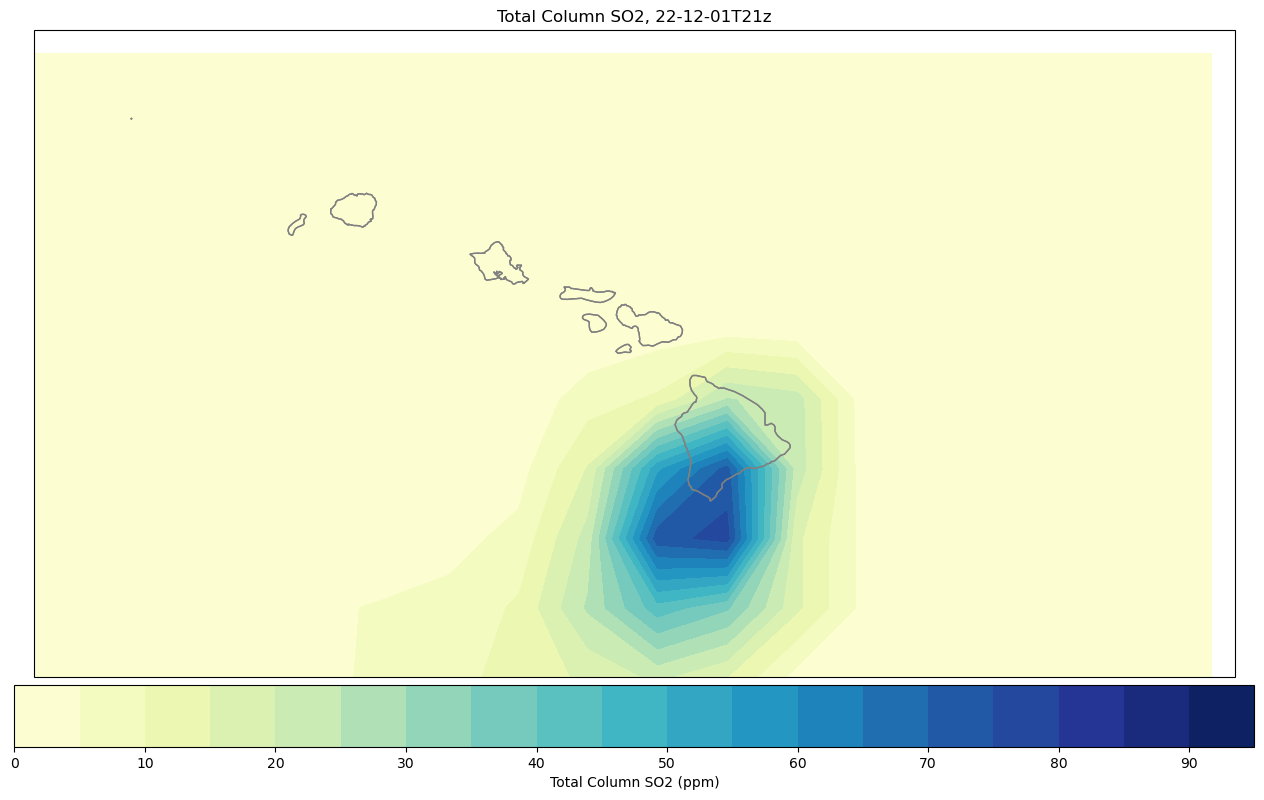

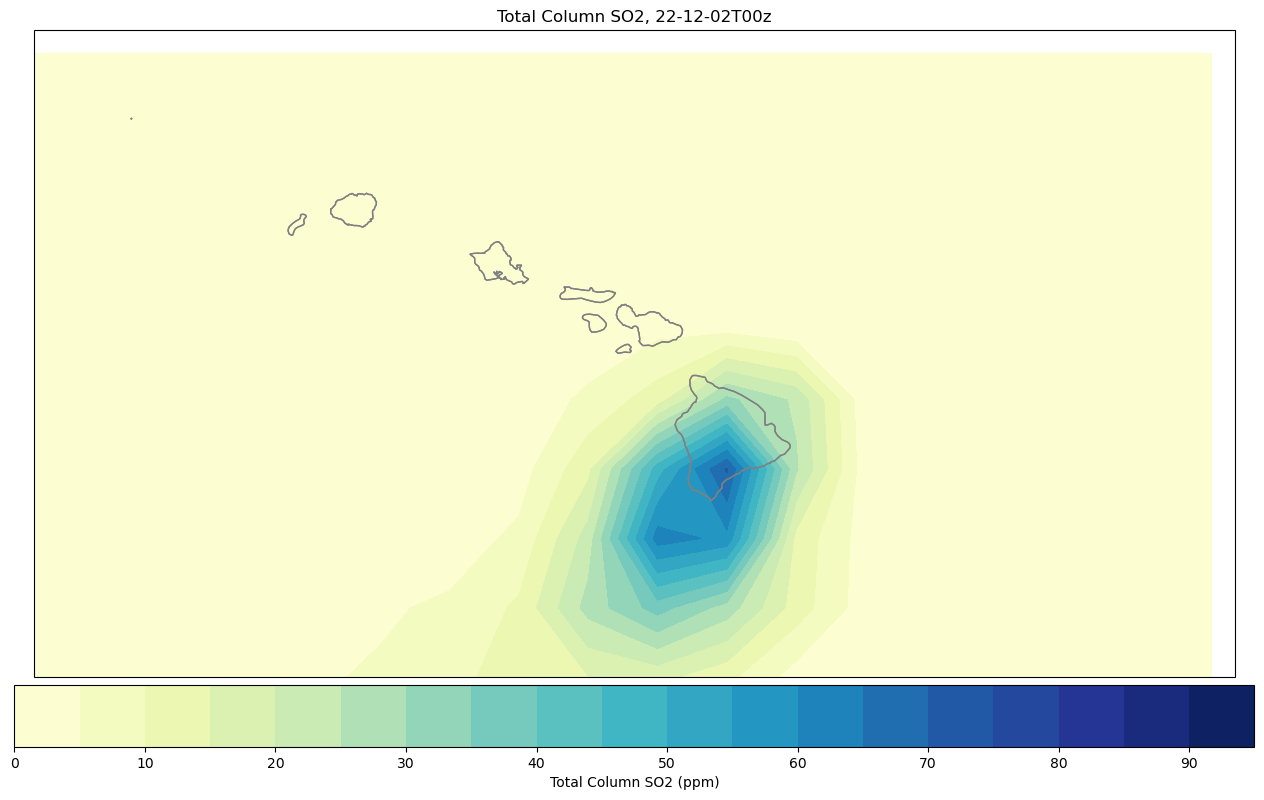

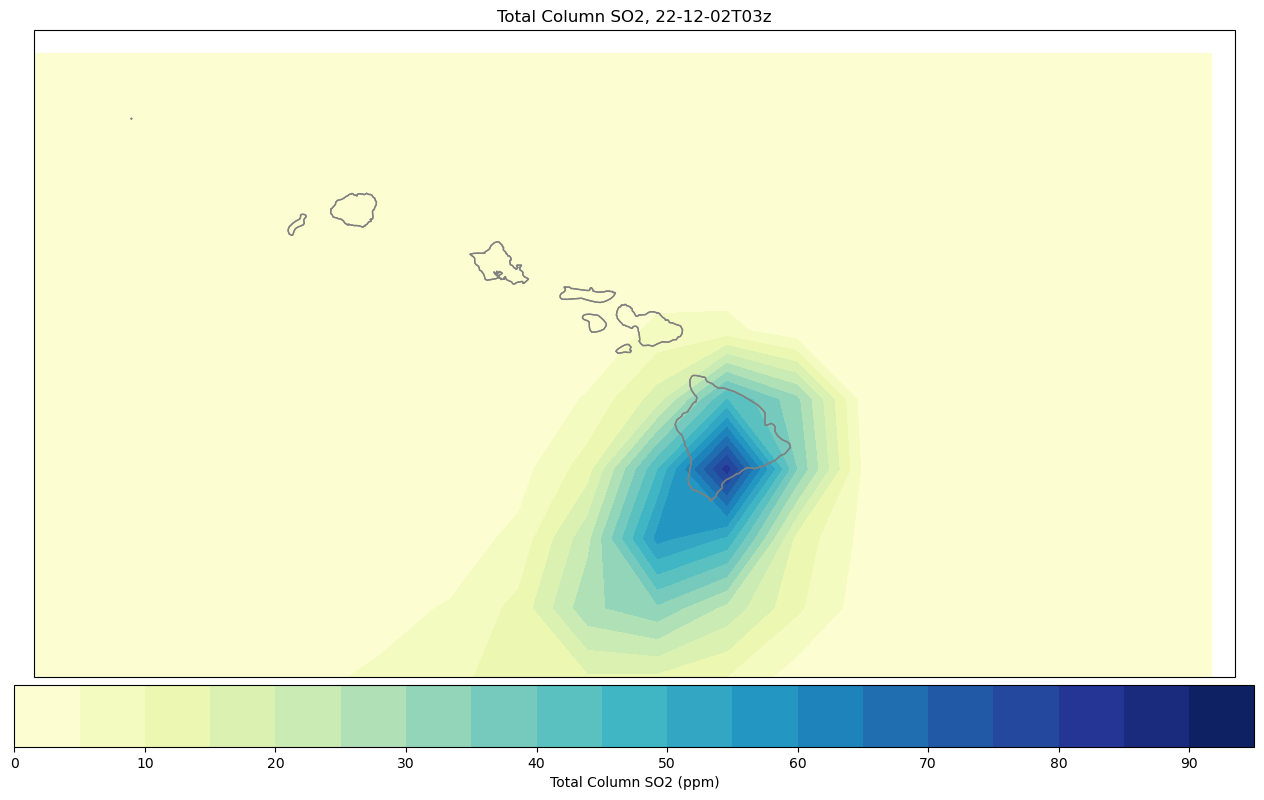

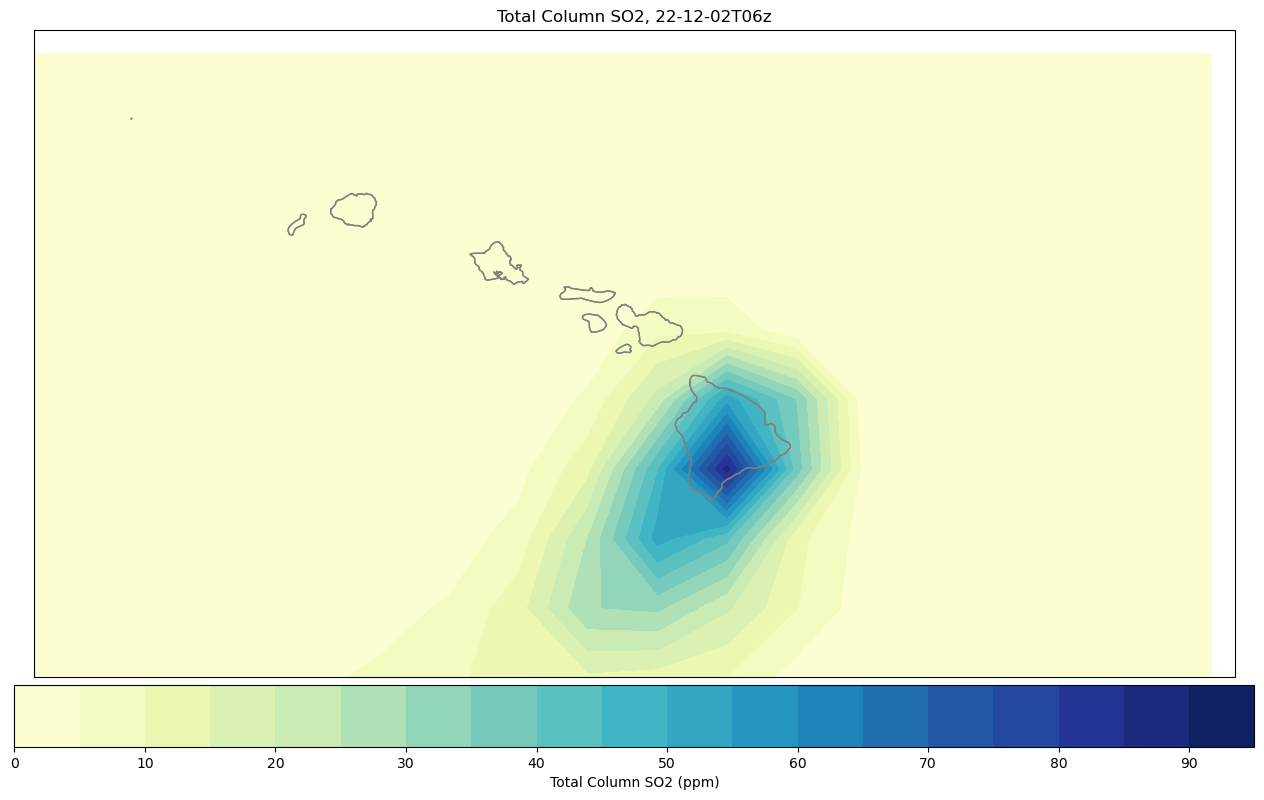

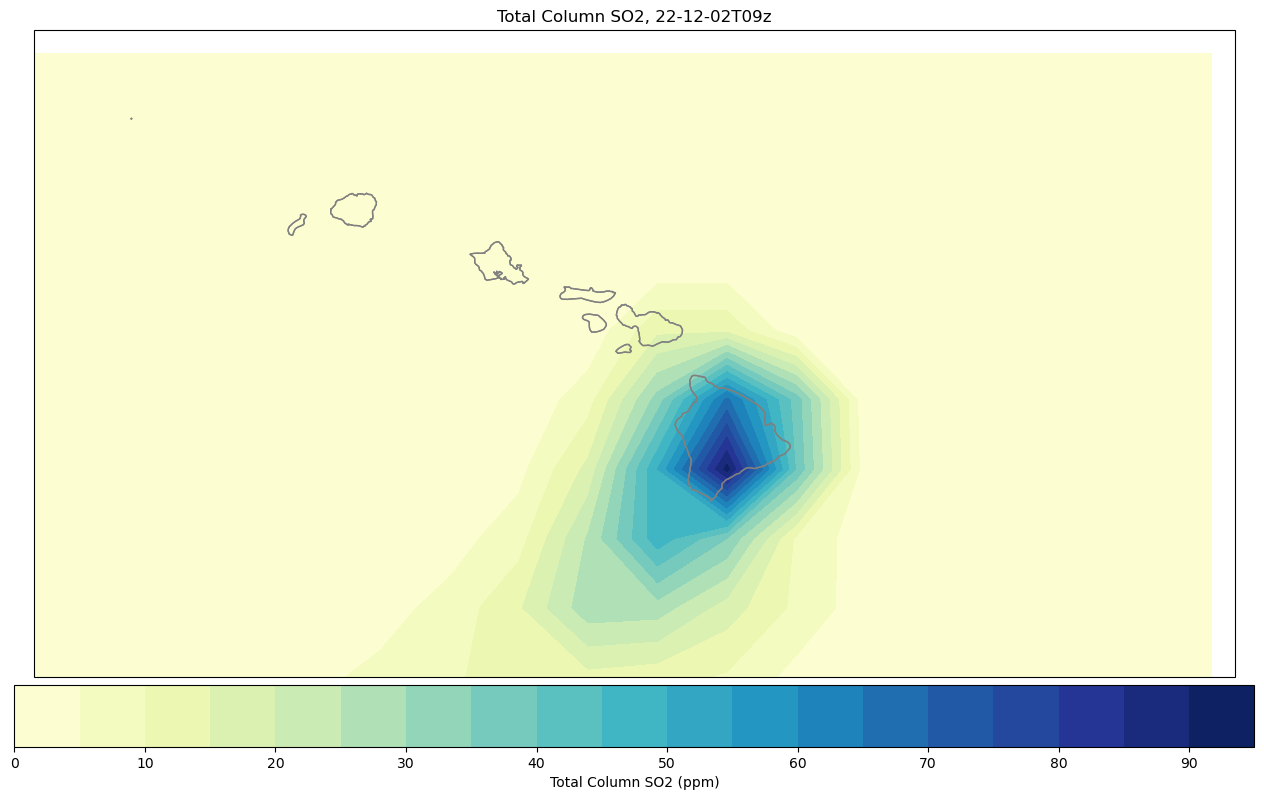

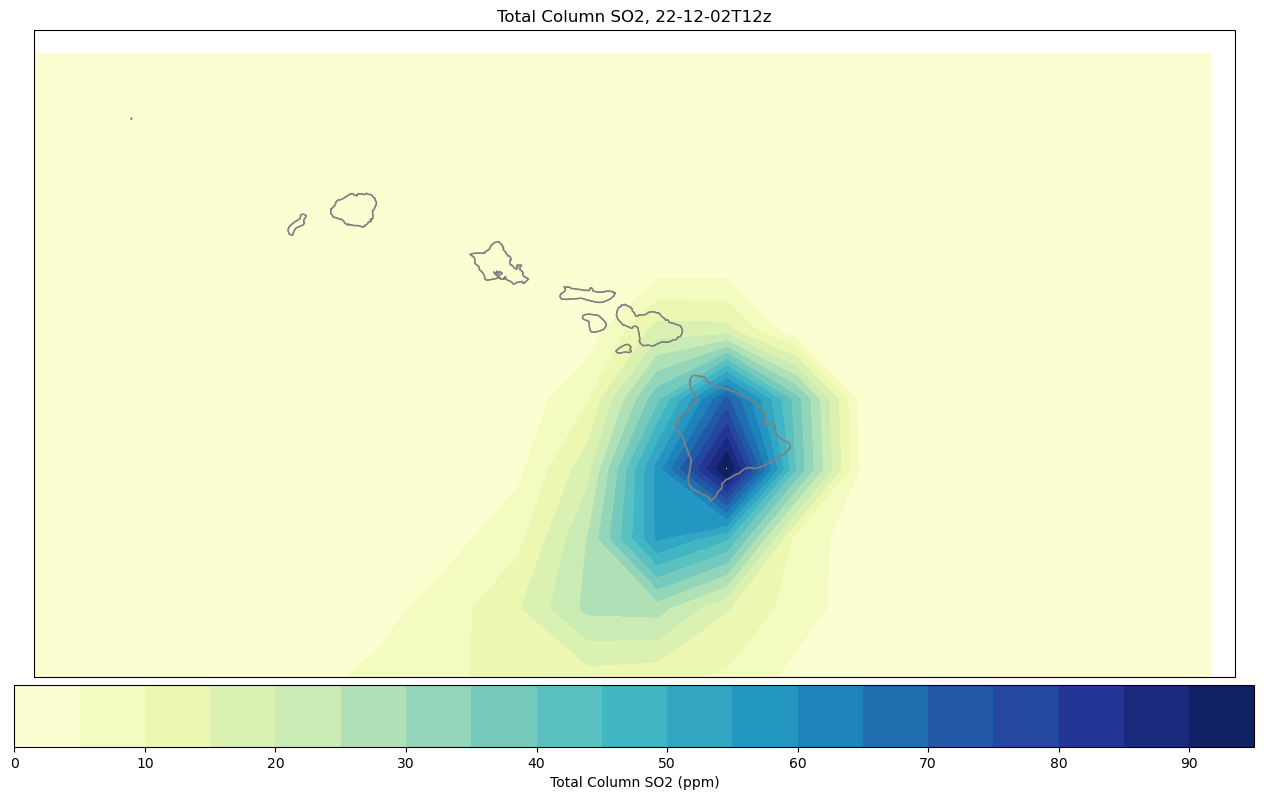

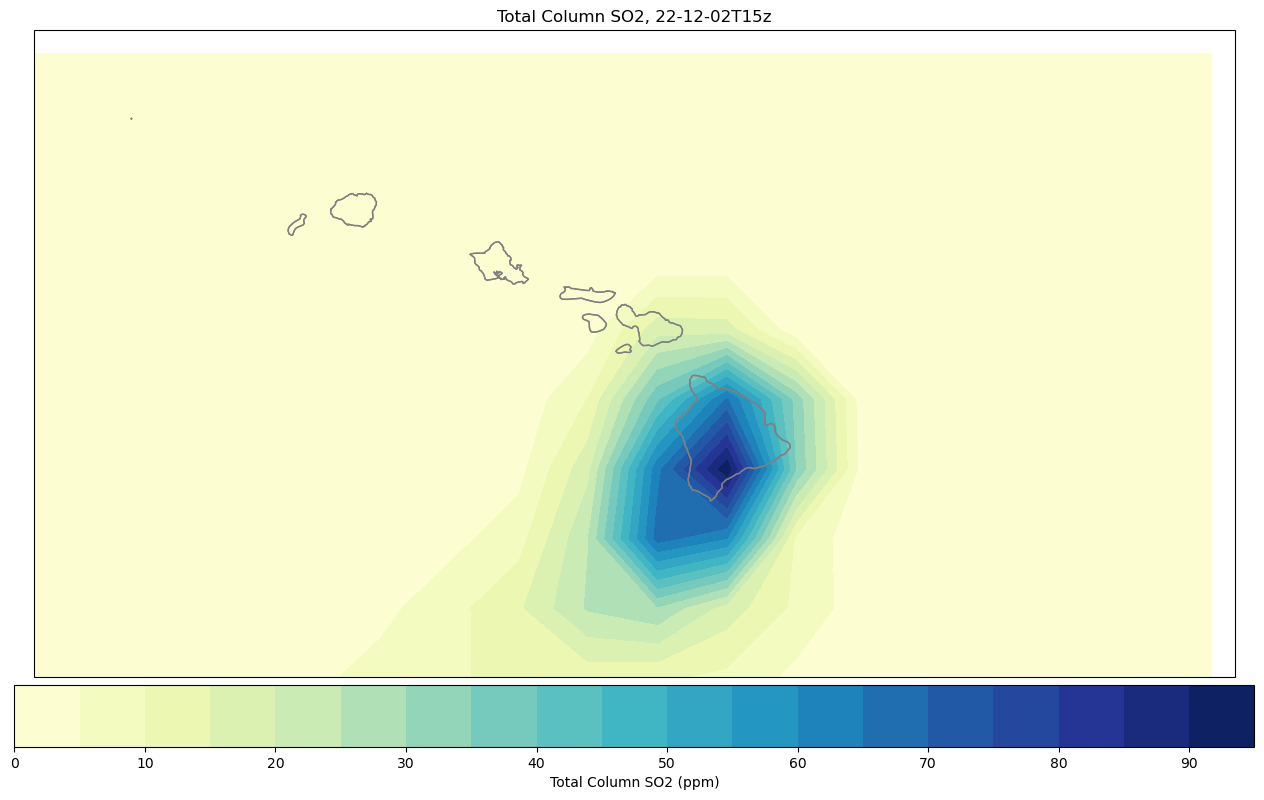

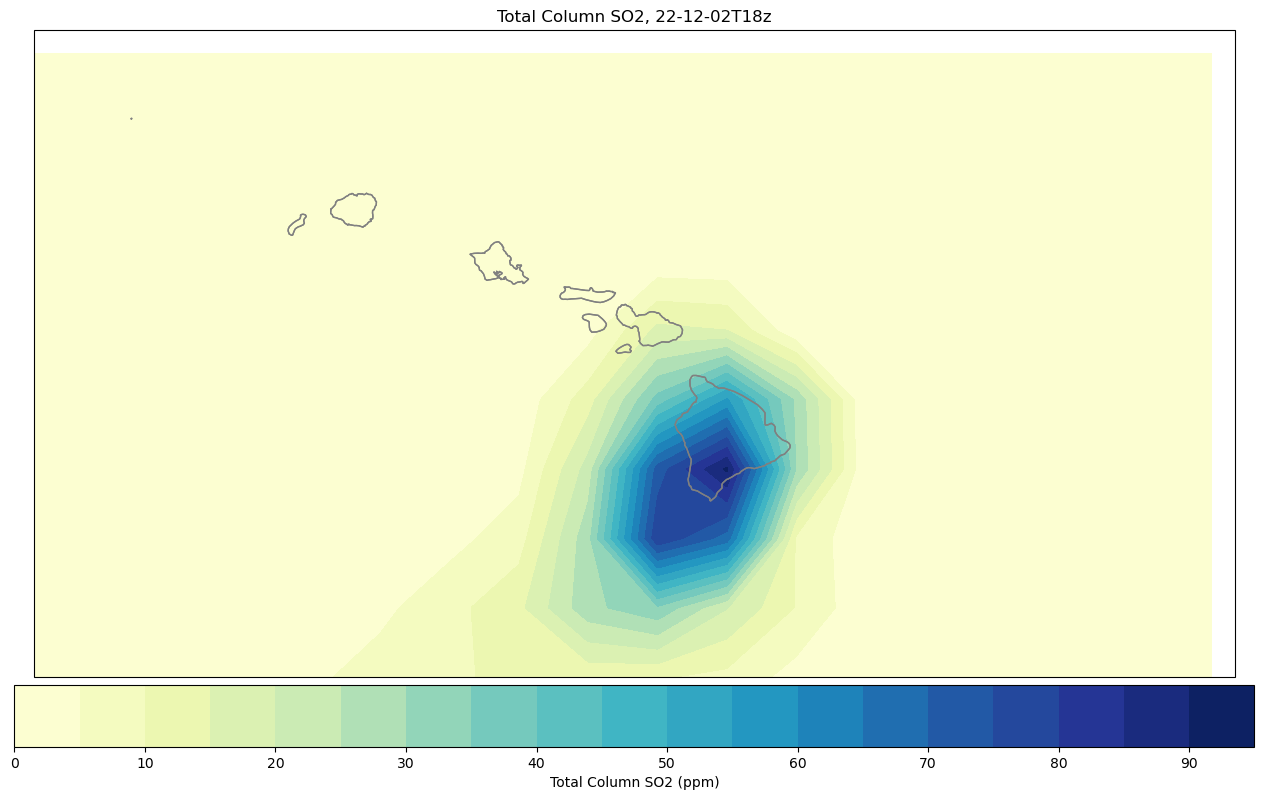

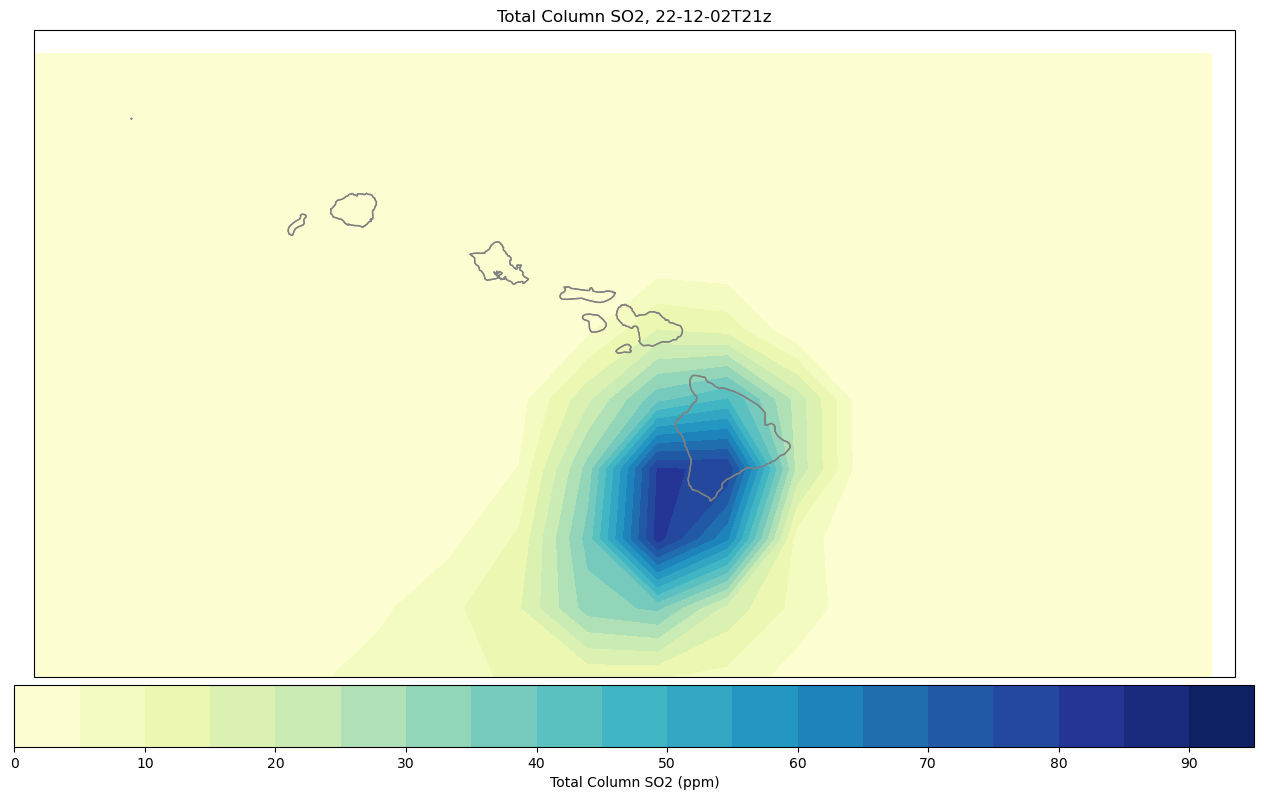

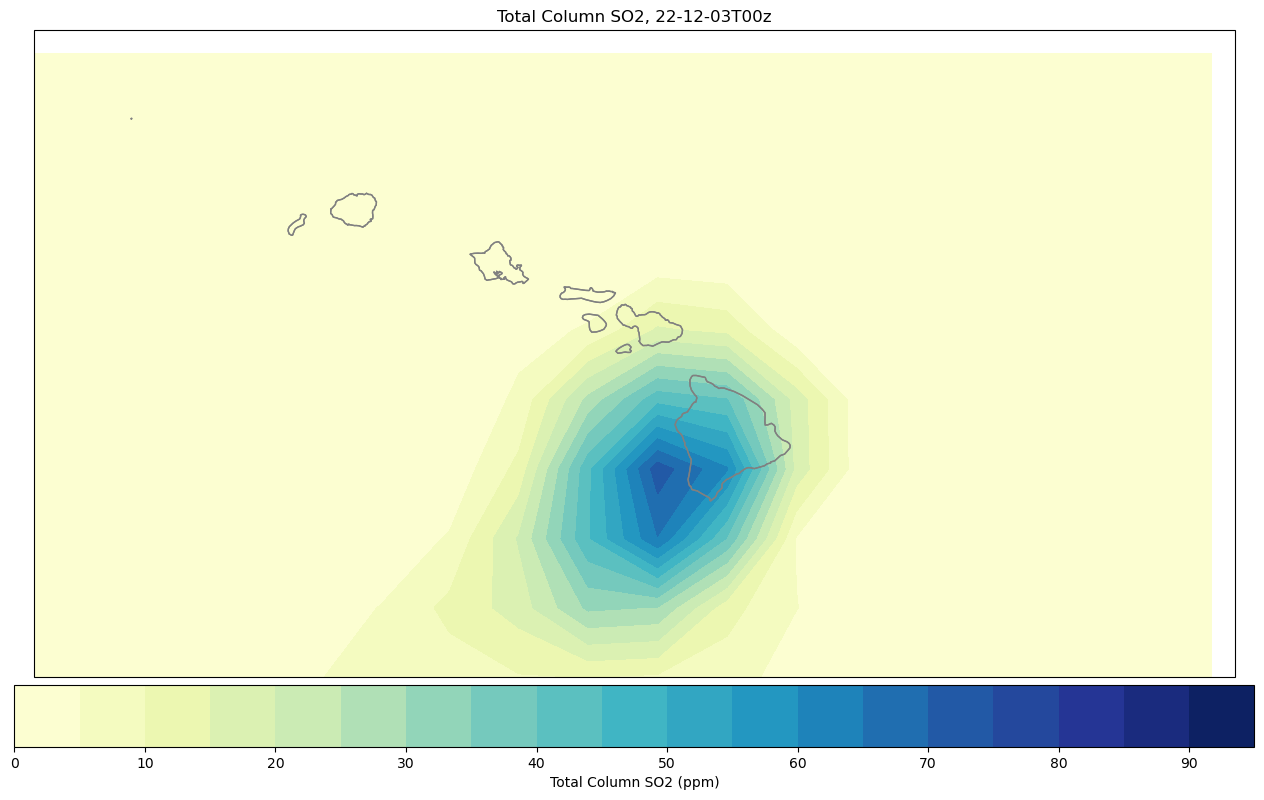

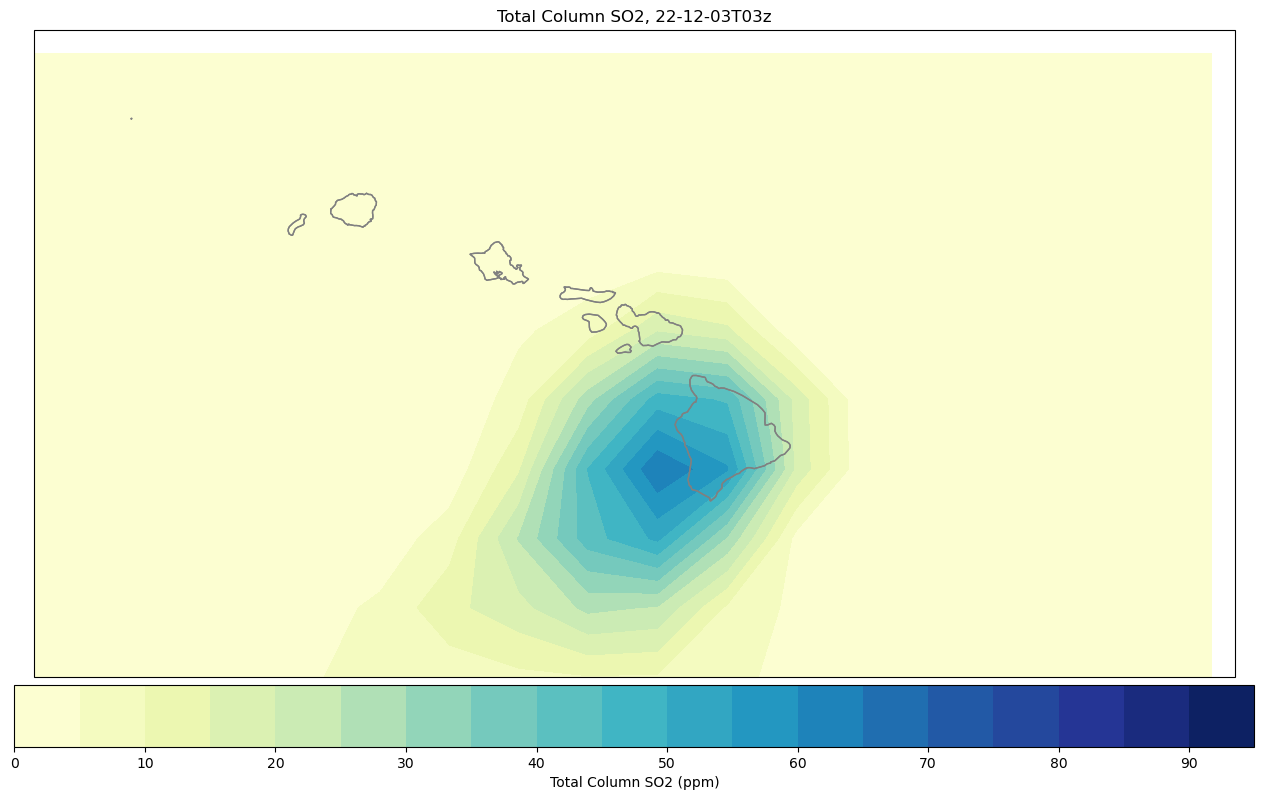

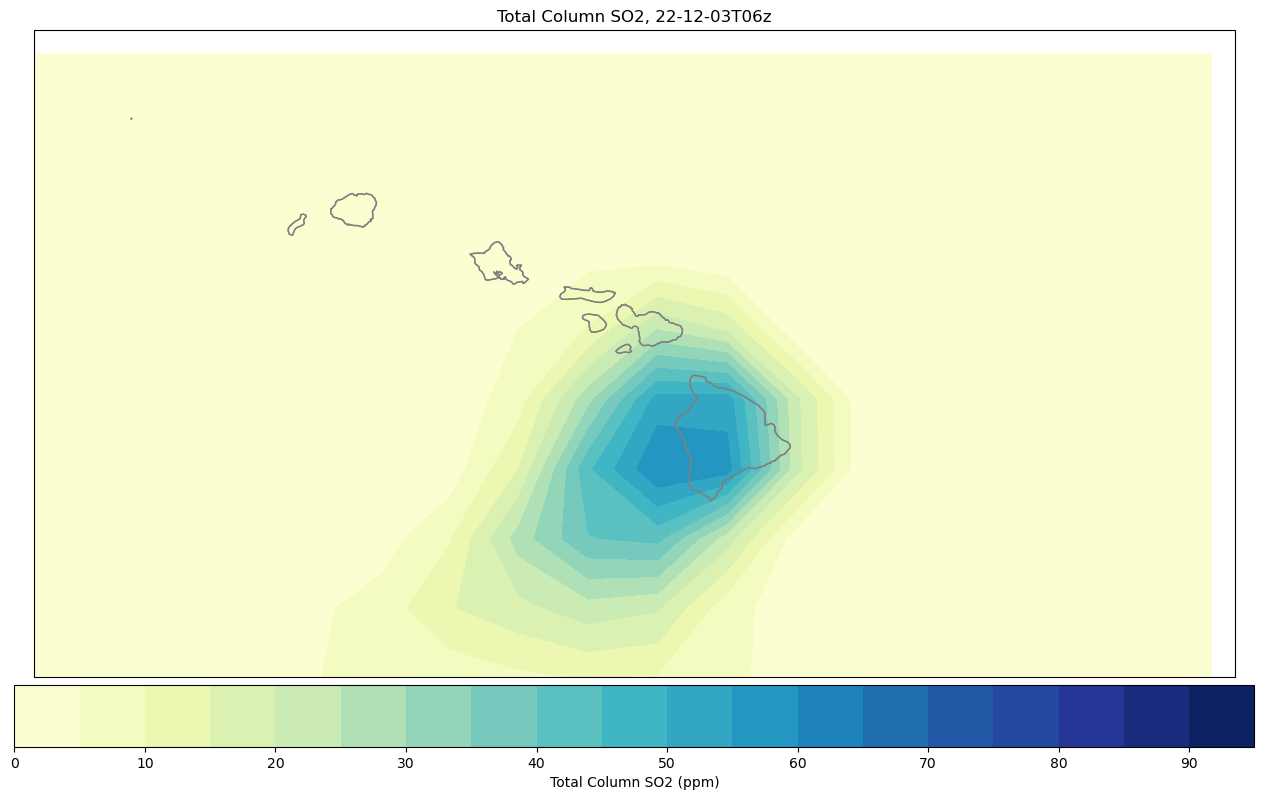

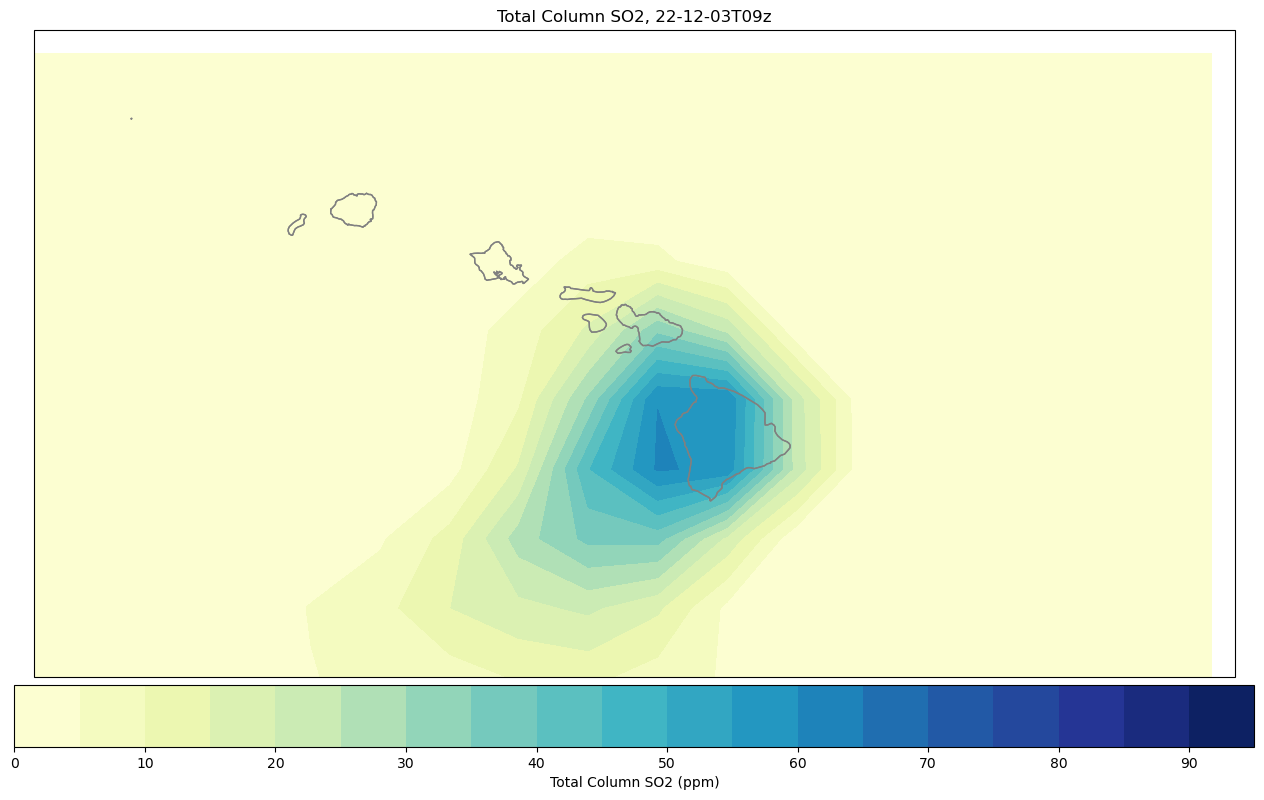

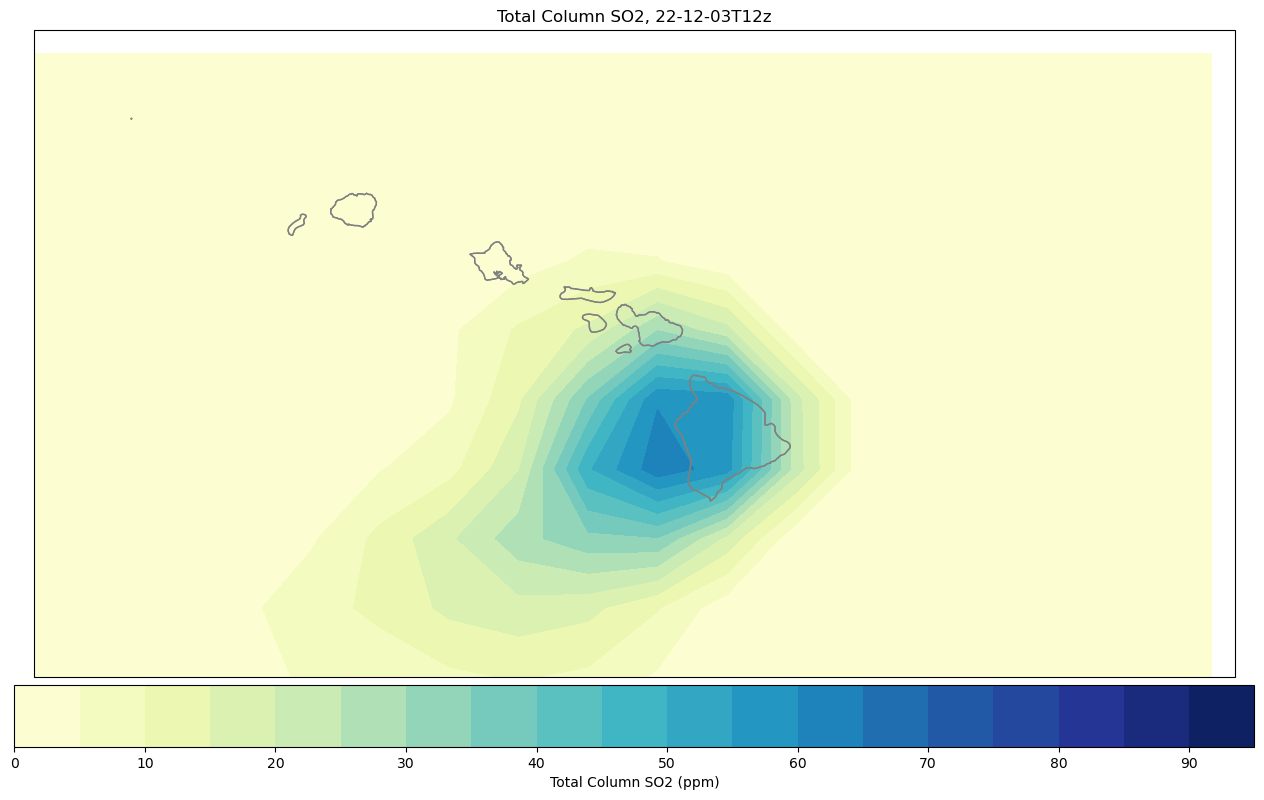

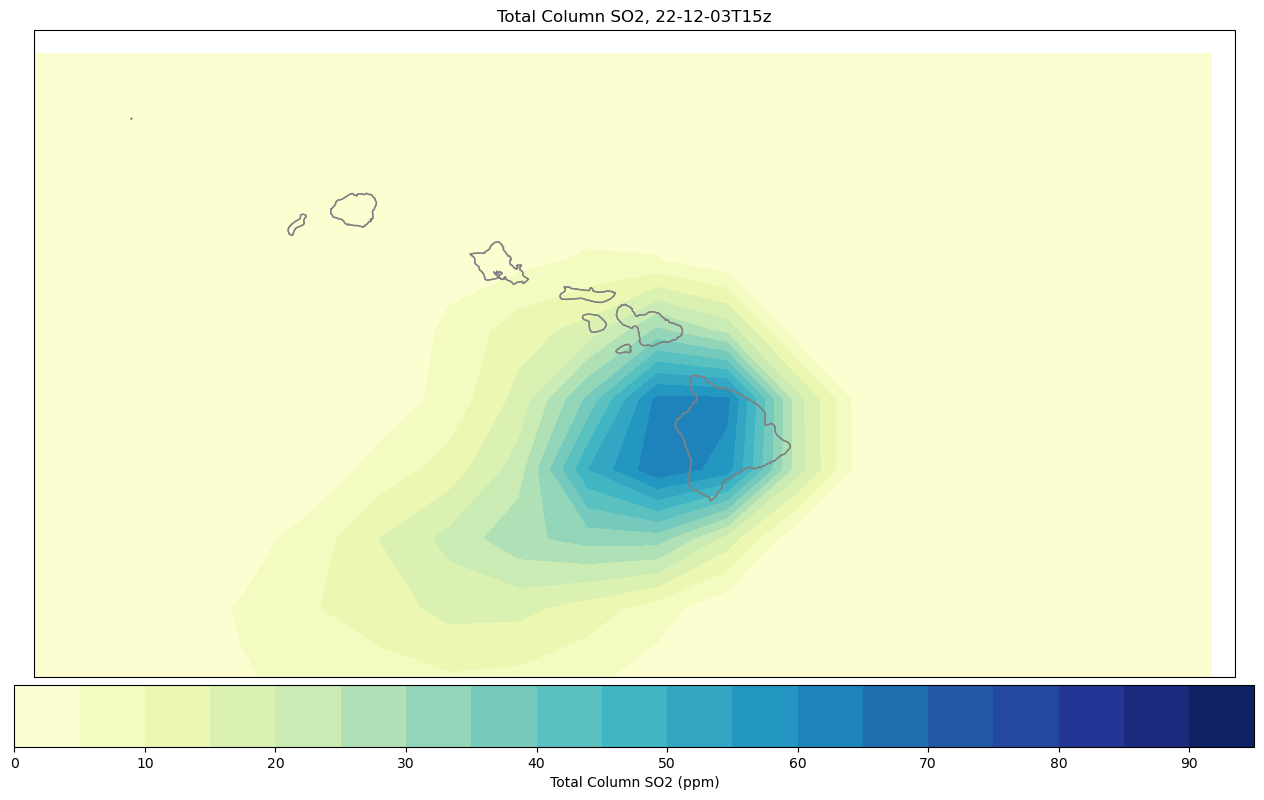

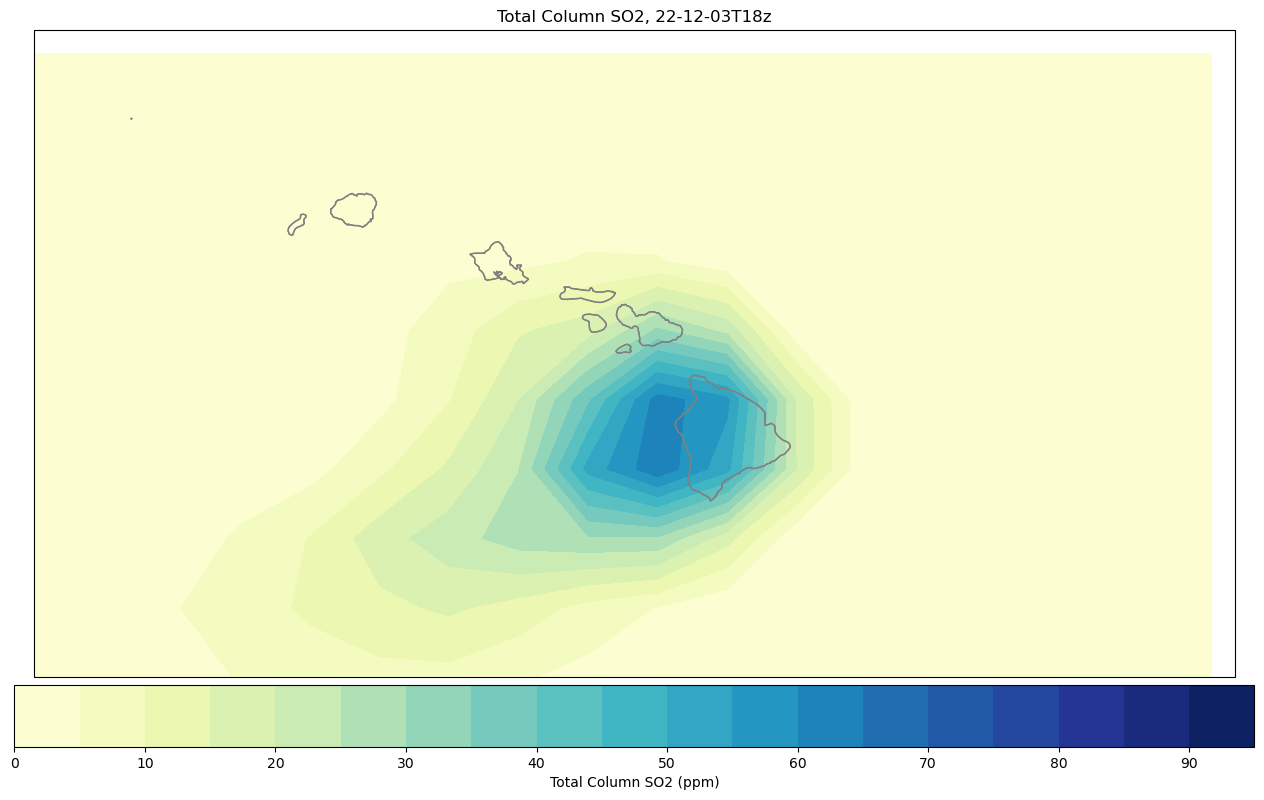

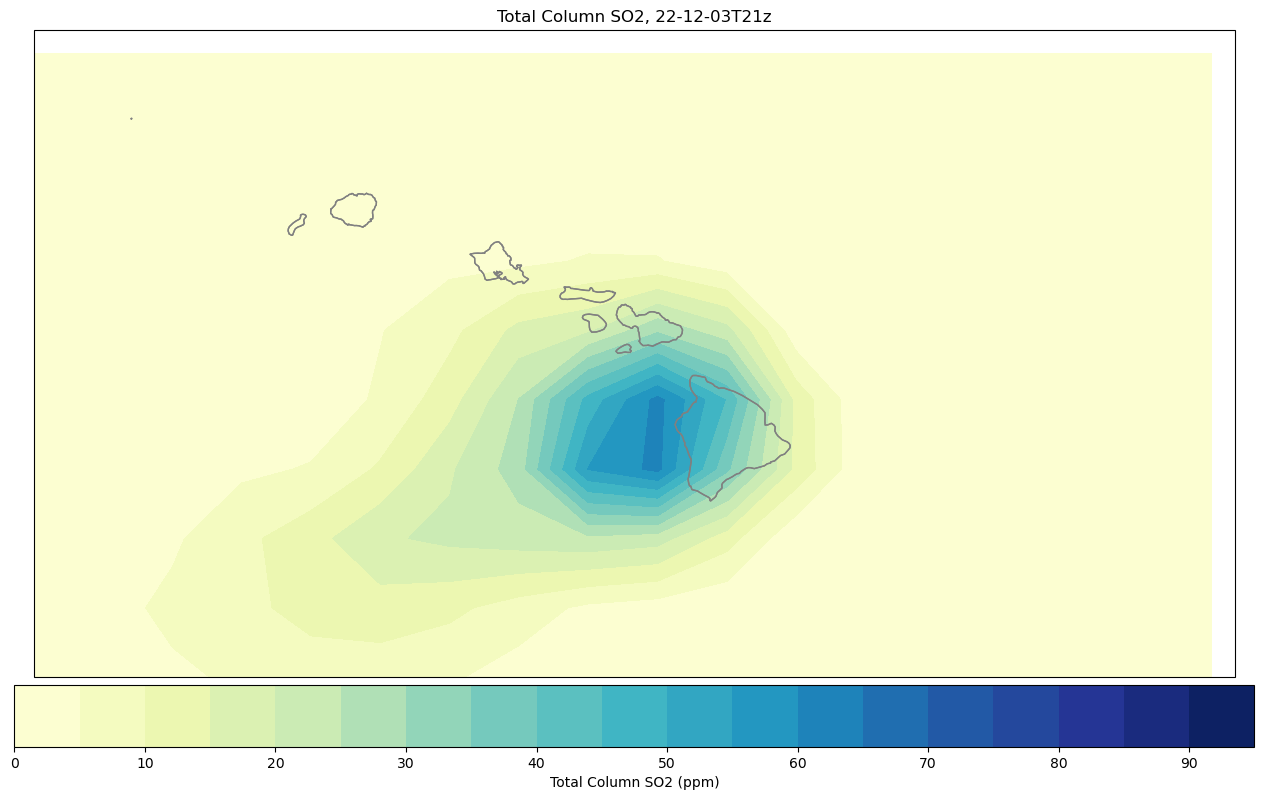

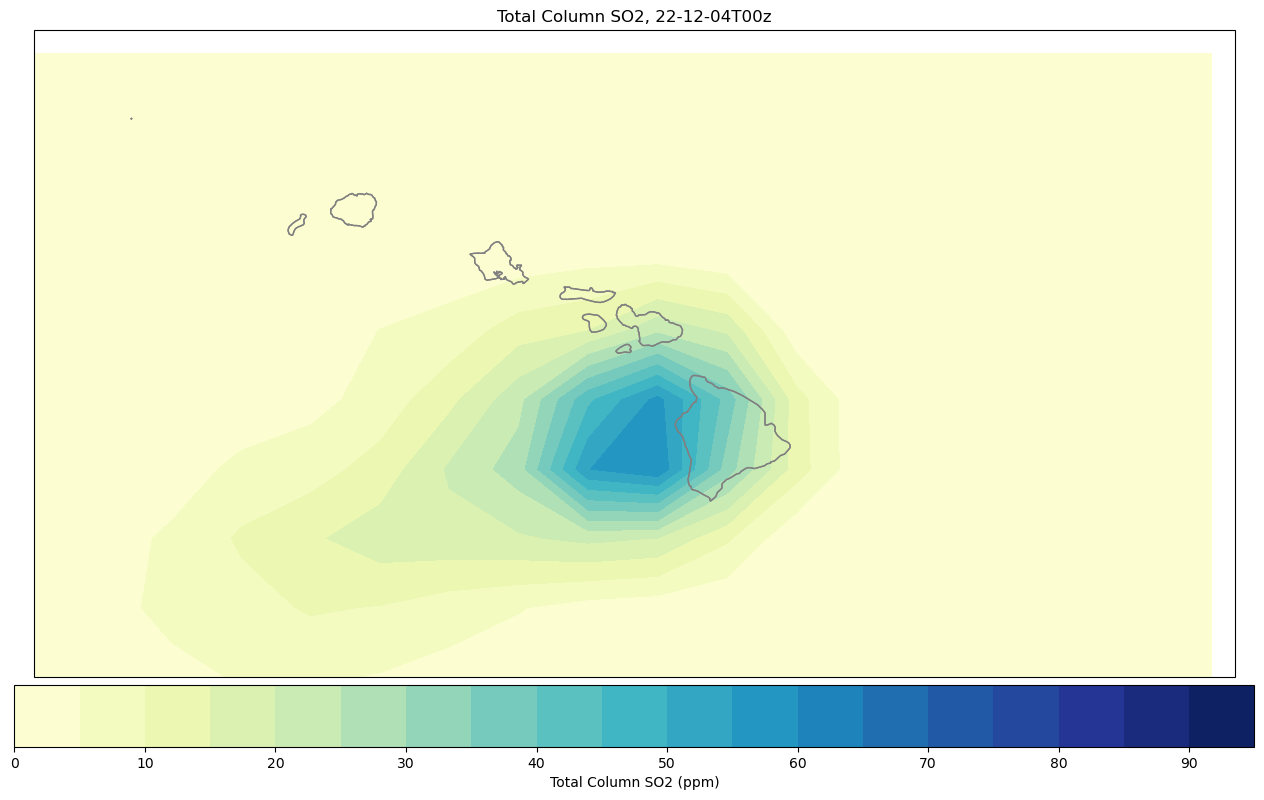

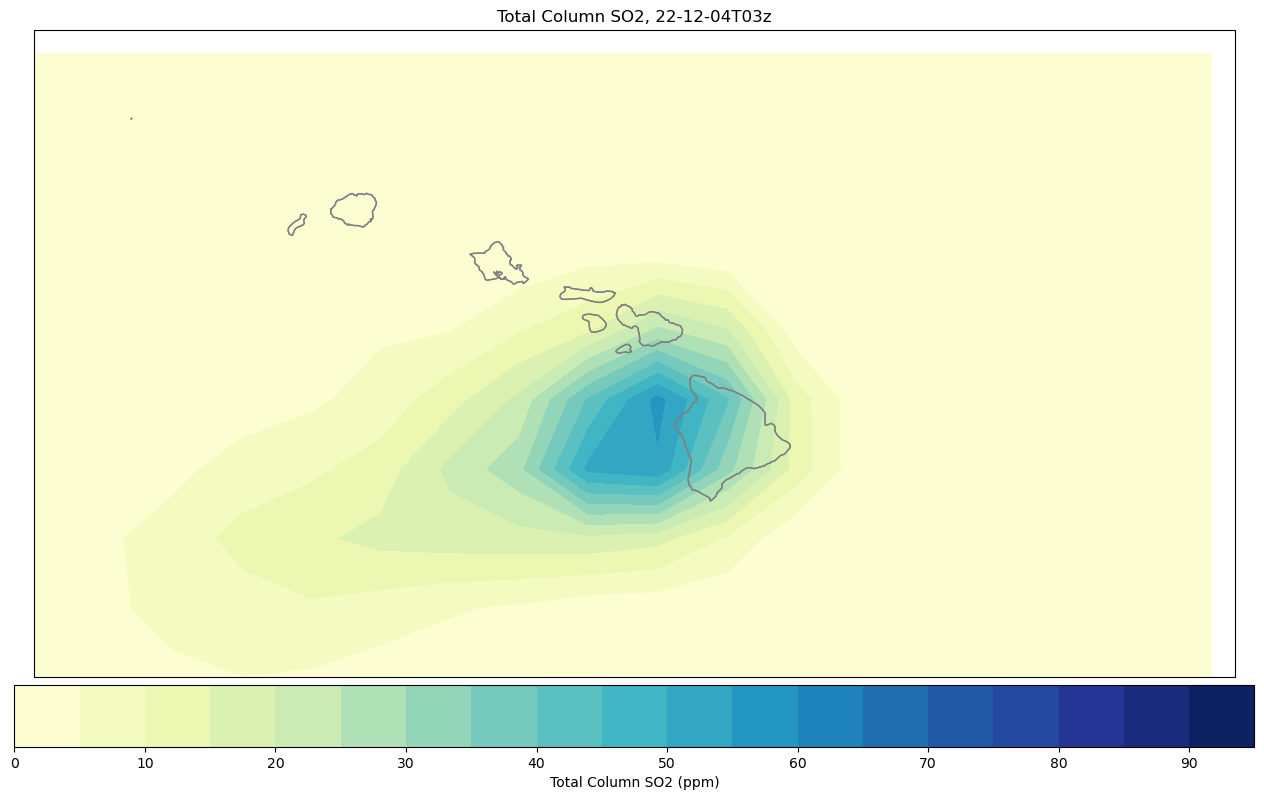

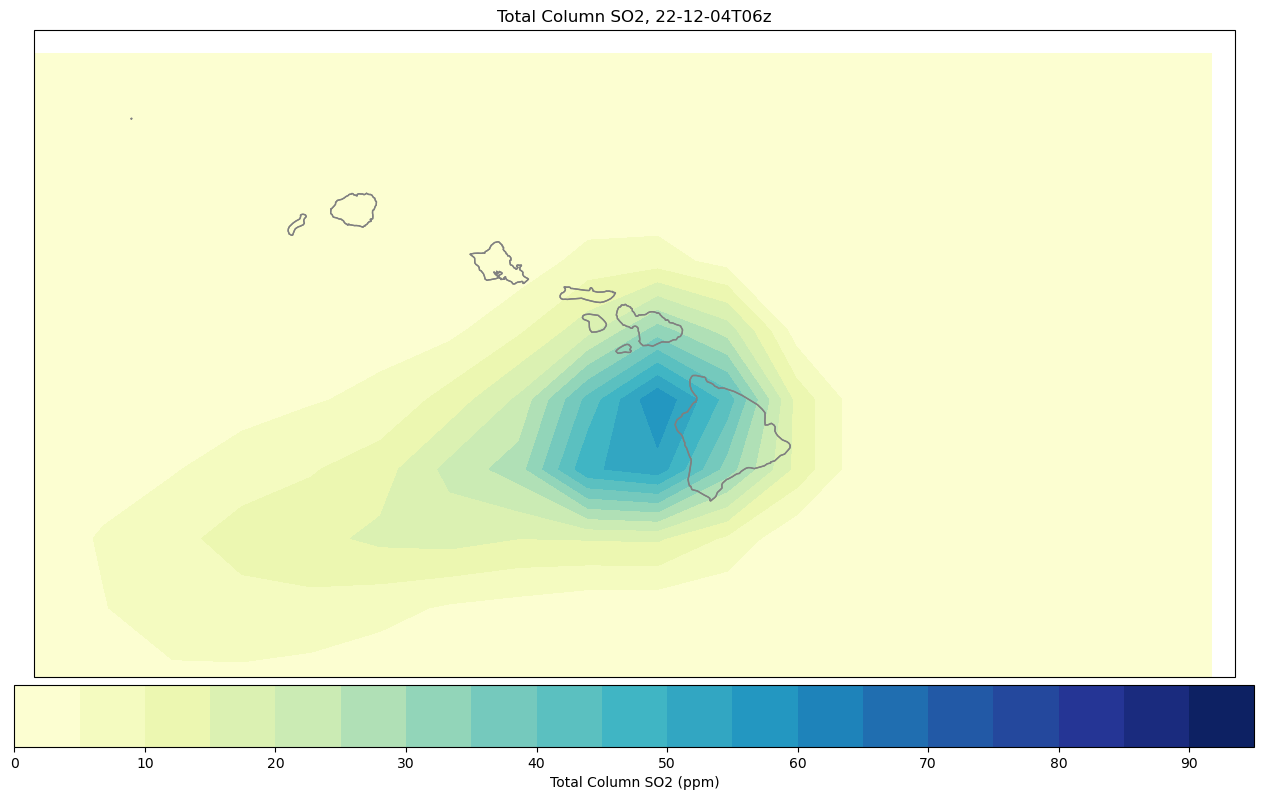

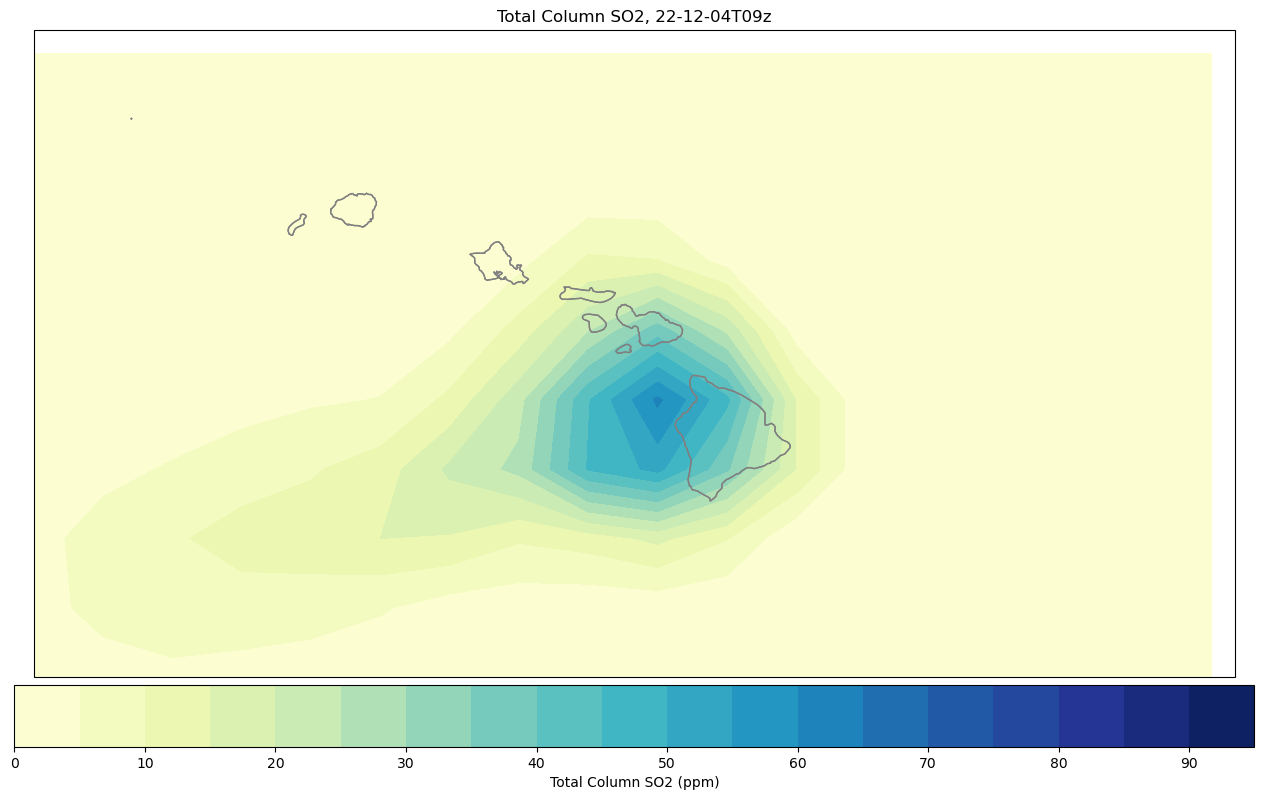

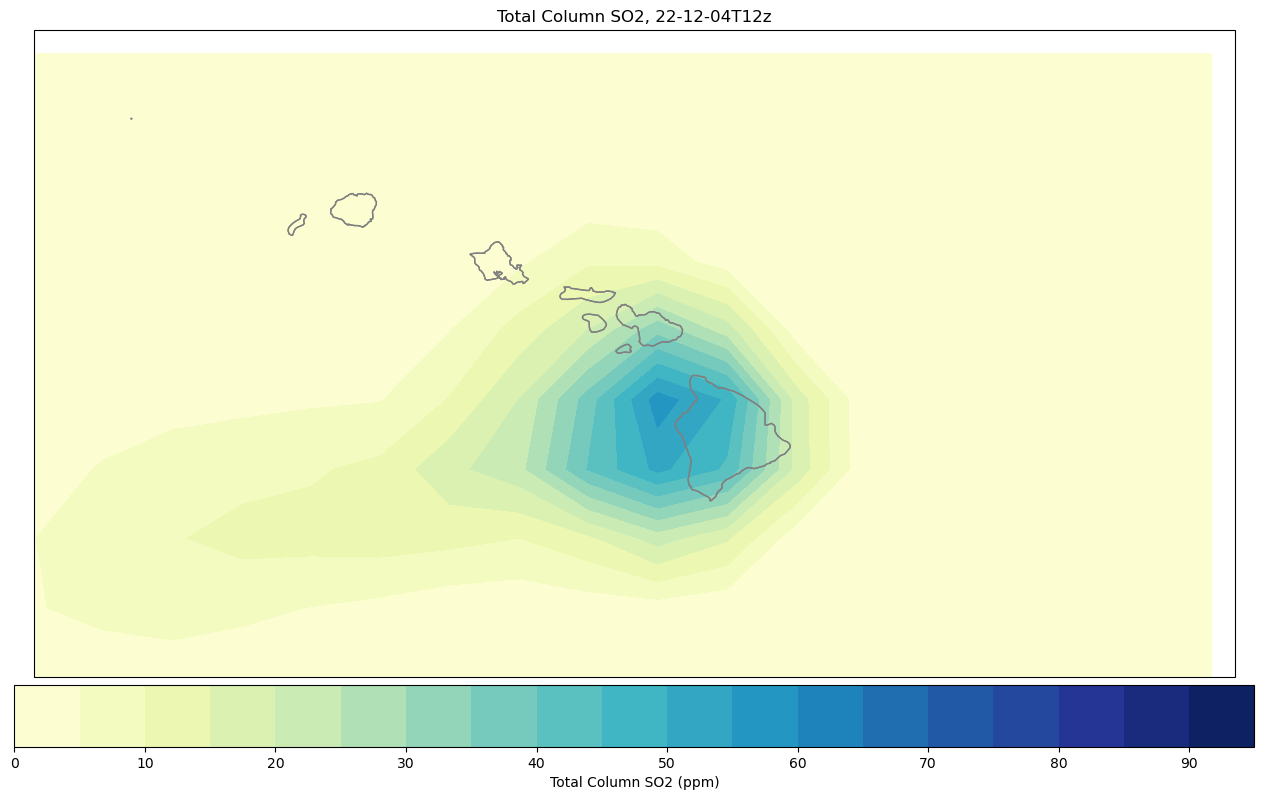

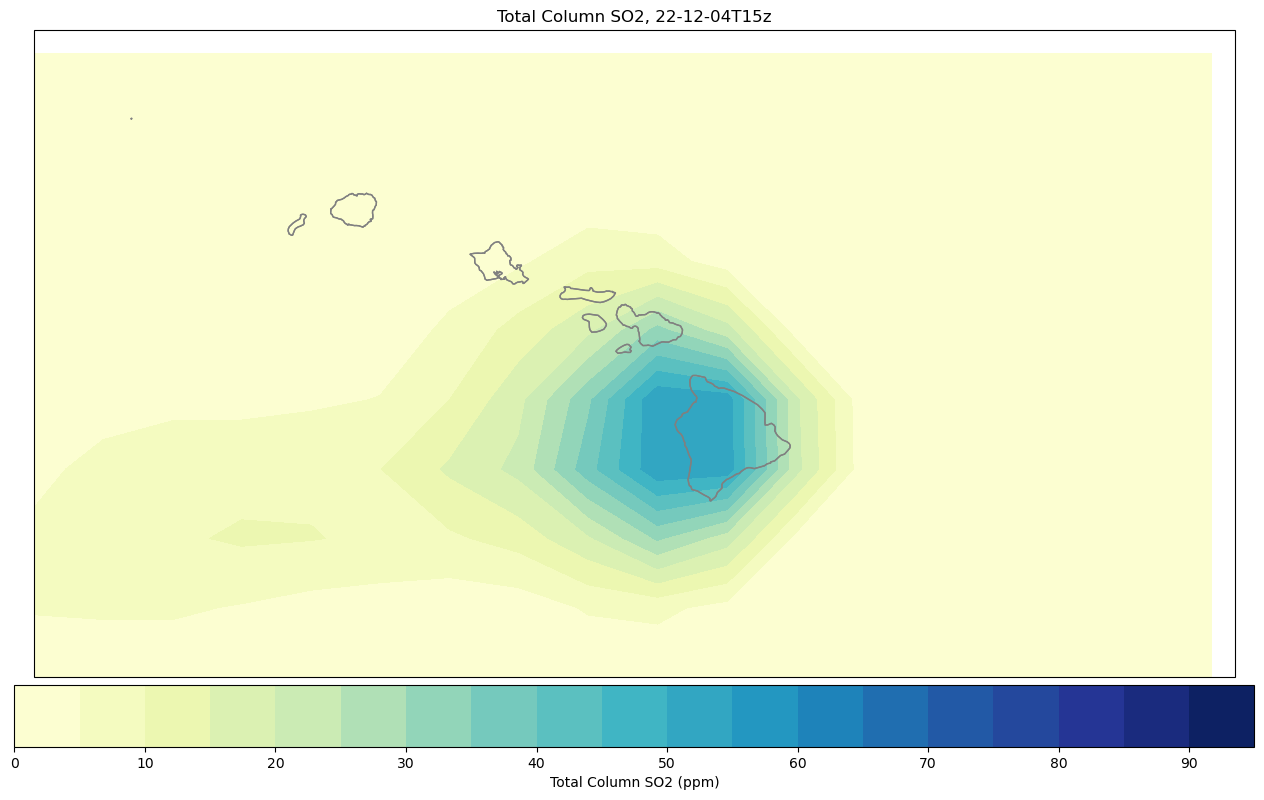

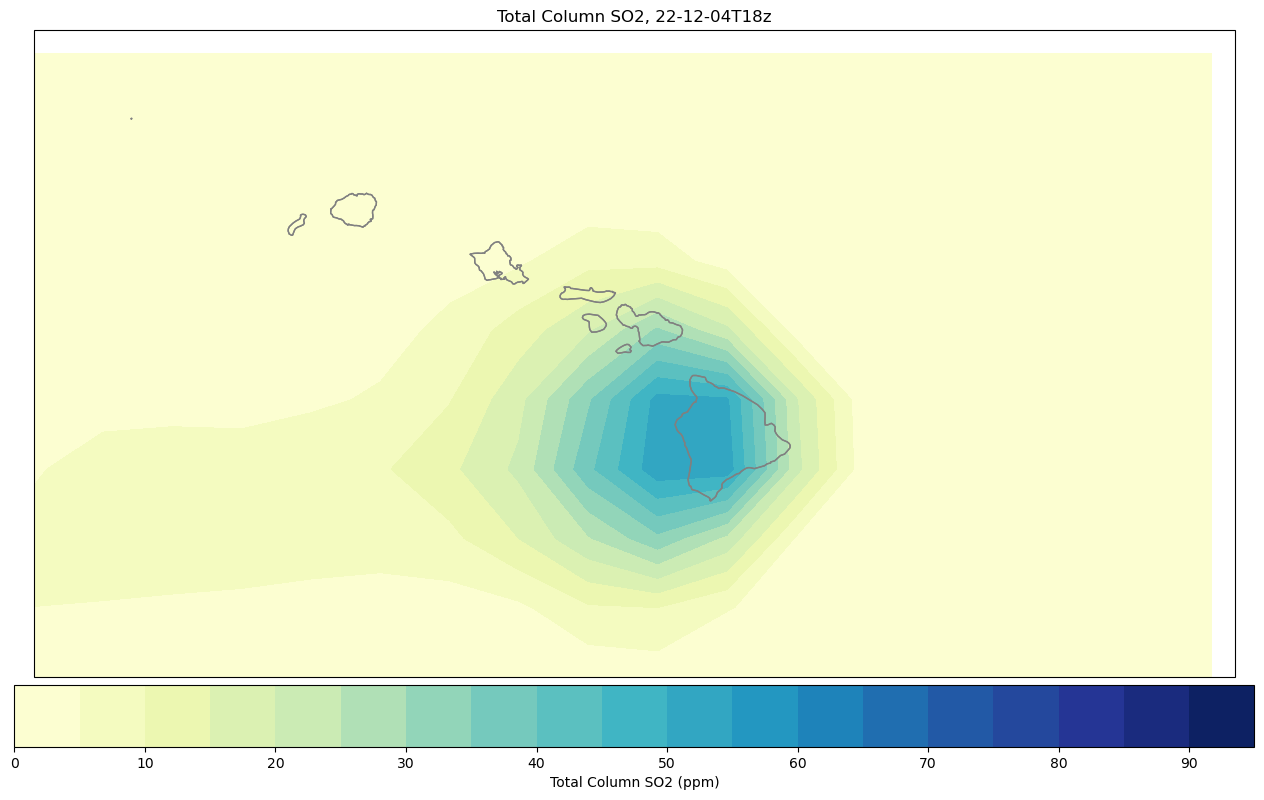

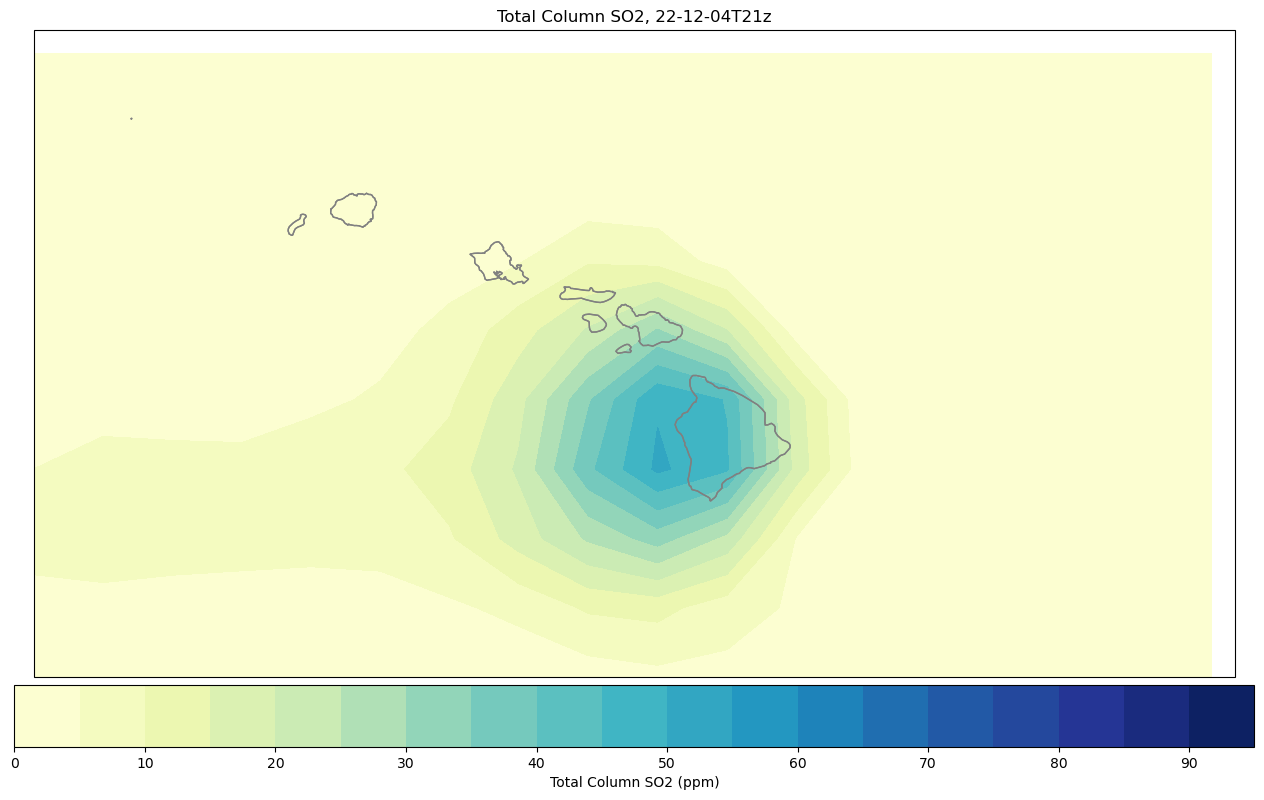

/tmp/ipykernel_529/3550010488.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [52]:
for time in times:
    plotimage(time)

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('./RS/SO2GIF.gif', images)